In [91]:
pwd

'/Users/admin/Desktop/Micky'

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
from sklearn.preprocessing import QuantileTransformer

In [93]:
ls

BETA MIXTURE MODELS AND THE APPLICATION TO IMAGE CLASSIFICATION.pdf
Classification_of_Imbalanced_Data_by_Combining_the.pdf
Declaration Form_pat.pdf
Declaration Form_patA.pdf
Declaration Form_patA_TAN.pdf
Declaration Form_patE.pdf
DeclarationForm_patA_TANs.pdf
Indices_all.csv
Indices_all_edited.csv
Results_in_Excell_Edited.xlsx
Springer_Nature_Bankruptcy_2023.pdf
Untitled.ipynb
Untitled1.ipynb
__pycache__/
do_script_teleconnection.ipynb
model_fitting.py
trace_01.ipynb
unbaised.pdf
unbaised.png
vis__distplot.png
visualizing_missing_data_with_barplot_Seaborn_distplot.png
~$Results_in_Excell_Edited.xlsx


In [94]:
df = pd.read_csv('Indices_all_edited.csv')

In [95]:
df.isnull().sum()

Unnamed: 0    0
nino34        0
amm           0
amo           0
nao           0
nino_1_2      0
nino_3        0
nino_4        0
nino3_4       0
pna           0
soi           0
tna           0
tsa           0
iod           0
pdo           0
veaprcp       0
veatmax       0
veatmin       0
waprcp        0
watmax        0
watmin        0
yenprcp       0
yentmax       0
yentmin       0
zuaprcp       0
zuatmax       0
zuatmin       0
tamprcp       0
tamtmax       0
tamtmin       0
bolgaprcp     0
bolgatmax     0
bolgatmin     0
boleprcp      0
boletmax      0
boletmin      0
babprcp       0
babtmax       0
babtmin       0
navprcp       0
navtmax       0
navtmin       0
damprcp       0
damtmax       0
damtmin       0
dtype: int64

In [96]:
# dct = df.isnull().sum().to_dict()

In [97]:
# list(dct.keys())

In [98]:
# df_ = df.copy()

In [99]:
# df_.interpolate??

In [100]:
# for k in list(dct.keys()):
#     if dct[k] !=0:
#         df_[k] = df_[k].interpolate()
# #         print(k)

In [101]:
# df_.isnull().sum()

In [102]:
# df_.head()

In [103]:
df.describe().T

count         mean          std    min     25%     50%     75%  \
Unnamed: 0   57.0    28.000000    16.598193    0.0    14.0    28.0    42.0   
nino34       57.0     0.077193     0.666552   -1.1    -0.4     0.1     0.5   
amm          57.0     0.012281     1.968690   -4.1    -1.2     0.3     1.2   
amo          57.0    -0.040351     0.185991   -0.4    -0.2     0.0     0.1   
nao          57.0    -0.064912     0.390737   -1.3    -0.3    -0.1     0.2   
nino_1_2     57.0    -0.215789     0.886363   -1.5    -0.9    -0.5     0.4   
nino_3       57.0    -0.175439     0.671693   -1.3    -0.7    -0.2     0.3   
nino_4       57.0    -0.233333     0.548483   -1.5    -0.7    -0.2     0.2   
nino3_4      57.0    -0.149123     0.638951   -1.3    -0.6    -0.1     0.3   
pna          57.0    -0.089474     0.361388   -0.8    -0.3    -0.1     0.2   
soi          57.0     0.180702     0.996680   -1.5    -0.4     0.2     0.8   
tna          57.0     0.094737     0.320948   -0.6    -0.2     0.1     0.3   
tsa          57.0     0.124561     0.282388   -0.5    -0.1     0.2     0.3   
iod          57.0    -0.114035     0.228691   -0.6    -0.2    -0.1     0.1   
pdo          57.0     0.022807     0.834955   -1.3    -0.6    -0.1     0.6   
veaprcp      57.0  1107.829825  1211.323329  594.5   831.1   925.8  1069.7   
veatmax      57.0    34.975439     0.734915   33.3    34.4    35.1    35.4   
veatmin      57.0    22.024561     1.188679   18.0    21.4    22.2    22.8   
waprcp       57.0  1039.000000   188.460492  523.0   958.0  1008.0  1130.0   
watmax       57.0    33.580702     0.616568   32.2    33.1    33.6    33.9   
watmin       57.0    22.363158     0.614884   21.3    21.8    22.4    22.8   
yenprcp      57.0  1240.540351   207.774618  832.7  1069.2  1251.7  1391.3   
yentmax      57.0    33.728070     0.564027   32.5    33.3    33.8    34.1   
yentmin      57.0   722.321053  2571.153555   21.1    21.8    22.1    22.7   
zuaprcp      57.0  1001.508772   188.947945  605.0   858.0   965.0  1104.0   
zuatmax      57.0    34.998246     0.743421   33.3    34.5    35.1    35.5   
zuatmin      57.0    22.492982     0.692010   19.0    22.3    22.6    22.8   
tamprcp      57.0  1089.210526   192.366078  654.7   996.1  1069.8  1159.8   
tamtmax      57.0    34.182456     0.569813   33.1    33.6    34.2    34.7   
tamtmin      57.0    22.619298     0.499799   21.5    22.2    22.6    23.0   
bolgaprcp    57.0   947.221053   138.670682  634.0   839.2   937.9  1038.0   
bolgatmax    57.0    34.510526     0.883921   32.6    33.9    34.4    34.9   
bolgatmin    57.0    22.821053     0.680267   19.8    22.6    22.8    23.2   
boleprcp     57.0  1104.292982   271.332740  192.0   991.8  1090.0  1193.9   
boletmax     57.0    33.061404     0.808825   31.9    32.5    33.0    33.3   
boletmin     57.0    20.963158     0.887137   18.9    20.4    20.8    21.2   
babprcp      57.0   907.789474   334.476740    0.0   872.4  1005.0  1085.7   
babtmax      57.0    34.491228     1.139123   28.3    34.1    34.6    35.0   
babtmin      57.0    21.543860     0.837517   18.8    21.1    21.7    22.1   
navprcp      57.0   961.194737   186.153879  338.4   863.0   969.2  1079.4   
navtmax      57.0    34.933333     0.681734   31.4    34.6    35.0    35.4   
navtmin      57.0    22.717544     0.453212   21.9    22.4    22.8    23.0   
damprcp      57.0  1212.982456  1204.584331  243.0   931.0  1087.0  1218.0   
damtmax      57.0    33.991228     0.849008   31.5    33.6    33.9    34.3   
damtmin      57.0    21.064912     0.592359   18.9    20.9    21.2    21.4   

               max  
Unnamed: 0    56.0  
nino34         1.7  
amm            5.0  
amo            0.3  
nao            0.7  
nino_1_2       2.4  
nino_3         1.5  
nino_4         1.0  
nino3_4        1.5  
pna            0.7  
soi            2.3  
tna            1.0  
tsa            0.7  
iod            0.4  
pdo            1.8  
veaprcp     9999.0  
veatmax       37.6  
veatmin       23.9  
waprcp      1543.0  
wat

In [62]:
# df.isnull().sum()

In [84]:



class NormalityChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title):        

        sns.distplot(data,
                     fit=norm,
                     hist_kws=dict(edgecolor="black",
                                   linewidth=2,
                                   color='blue'),
                     kde_kws={'linestyle': '--',
                              'linewidth': 2,
                              "color": "darkgreen",
                              "label": "KDE"},
                     ax=ax)
        ax.grid(True, linestyle='--')

        (mu, sigma) = norm.fit(data)
        ax.legend(['Normal dist. ($\mu=$ {:.2f}; $\sigma=$ {:.2f})'.format(mu, sigma)],
                  loc='best')
        ax.set_title(title)

    def _qq_plot(self, ax, data):        

        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def check_normality(self, cname):
        fig, ((ax1, ax2)) = plt.subplots(1, 2,
                                        figsize=(12, 6),
                                        dpi=80)

        self._plot_distribution(ax1, self.df[cname], '{} distribution'.format(cname))
        self._qq_plot(ax2, self.df[cname])        

        fig.tight_layout()


class LogTransformChecker:
    def __init__(self, df):
        self.df = df

    def _plot_distribution(self, ax, data, title, log_transform=False):
        if log_transform:
            data = np.log1p(data)

        sns.distplot(data,
                     fit=norm,
                     hist_kws=dict(edgecolor="black",
                                   linewidth=2,
                                   color='blue'),
                     kde_kws={'linestyle': '--',
                              'linewidth': 2,
                              "color": "darkgreen",
                              "label": "KDE"},
                     ax=ax)
        ax.grid(True, linestyle='--')

        (mu, sigma) = norm.fit(data)
        ax.legend(['Normal dist. ($\mu=$ {:.2f}; $\sigma=$ {:.2f})'.format(mu, sigma)],
                  loc='best')
        ax.set_title(title)

    def _qq_plot(self, ax, data, log_transform=False):
        if log_transform:
            data = np.log1p(data)

        probplot(data, plot=ax, rvalue=True)
        ax.grid(True, linestyle='--')

    def check_normality(self, cname, return_log_transform=True):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,
                                                    figsize=(12, 12),
                                                    dpi=80)

        self._plot_distribution(ax1, self.df[cname], '{} distribution'.format(cname))
        self._qq_plot(ax2, self.df[cname])

        if return_log_transform:
            self.df[cname] = np.log1p(self.df[cname])
            self._plot_distribution(ax3, self.df[cname], '{} distribution in log scale'.format(cname), log_transform=True)
            self._qq_plot(ax4, self.df[cname], log_transform=True)

        fig.tight_layout()

        if return_log_transform:
            return self.df[cname]

# Example usage:
# normality_checker = LogTransformChecker(your_dataframe)
# transformed_column = normality_checker.check_normality('your_column_name')


/Users/admin/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/admin/env/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/admin/env/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/admin/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an 

RuntimeError: The data contains non-finite values.

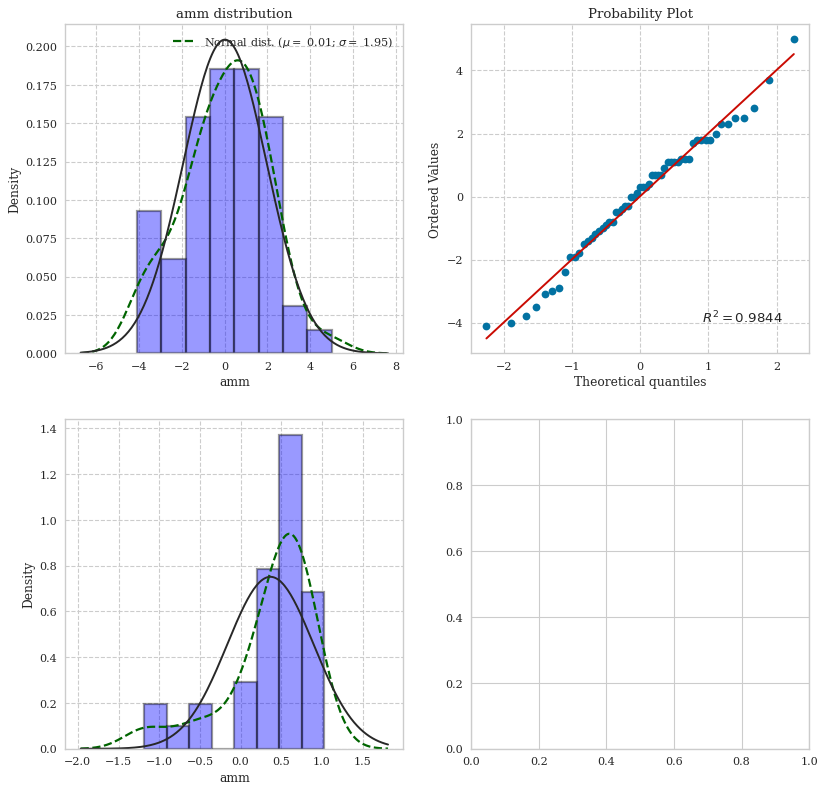

In [85]:
normality_checker = LogTransformChecker(df)
transformed_column = normality_checker.check_normality('amm')

In [ ]:
# transformed_column = normality_checker.check_normality('tsa')

In [ ]:
# transformed_column = normality_checker.check_normality('nino34')

In [ ]:
# df.head()

In [ ]:
# df.columns

In [88]:
# df.head()

In [104]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [105]:
df.columns

Index(['nino34', 'amm', 'amo', 'nao', 'nino_1_2', 'nino_3', 'nino_4',
       'nino3_4', 'pna', 'soi', 'tna', 'tsa', 'iod', 'pdo', 'veaprcp',
       'veatmax', 'veatmin', 'waprcp', 'watmax', 'watmin', 'yenprcp',
       'yentmax', 'yentmin', 'zuaprcp', 'zuatmax', 'zuatmin', 'tamprcp',
       'tamtmax', 'tamtmin', 'bolgaprcp', 'bolgatmax', 'bolgatmin', 'boleprcp',
       'boletmax', 'boletmin', 'babprcp', 'babtmax', 'babtmin', 'navprcp',
       'navtmax', 'navtmin', 'damprcp', 'damtmax', 'damtmin'],
      dtype='object')

In [106]:
corr_matrix = df[['amm', 'nino34', 'nino3_4', 'amo', 'nao', 'nino_1_2', 'nino_3', 'nino_4','pna','soi', 'tna','iod', 'pdo']].corr()

corr_matrix 

amm    nino34   nino3_4       amo       nao  nino_1_2  \
amm       1.000000 -0.068096 -0.076454  0.755343 -0.467404 -0.117777   
nino34   -0.068096  1.000000  0.998158  0.099034  0.142311  0.713898   
nino3_4  -0.076454  0.998158  1.000000  0.098725  0.145071  0.714667   
amo       0.755343  0.099034  0.098725  1.000000 -0.358574  0.097887   
nao      -0.467404  0.142311  0.145071 -0.358574  1.000000  0.182605   
nino_1_2 -0.117777  0.713898  0.714667  0.097887  0.182605  1.000000   
nino_3   -0.090574  0.934577  0.936538  0.120996  0.174919  0.891775   
nino_4    0.056779  0.915181  0.917519  0.222894  0.130539  0.505791   
pna       0.345934  0.201911  0.190974  0.481985 -0.302373  0.302123   
soi       0.179317 -0.911622 -0.907791  0.029440 -0.237126 -0.623336   
tna       0.889221  0.178060  0.178098  0.869889 -0.464131  0.154122   
iod      -0.082109  0.329387  0.350820  0.103999  0.109525  0.369768   
pdo      -0.052210  0.564060  0.560116  0.092274  0.146930  0.503100   

            nino_3    nino_4       pna       soi       tna       iod       pdo  
amm      -0.090574  0.056779  0.345934  0.179317  0.889221 -0.082109 -0.052210  
nino34    0.934577  0.915181  0.201911 -0.911622  0.178060  0.329387  0.564060  
nino3_4   0.936538  0.917519  0.190974 -0.907791  0.178098  0.350820  0.560116  
amo       0.120996  0.222894  0.481985  0.029440  0.869889  0.103999  0.092274  
nao       0.174919  0.130539 -0.302373 -0.237126 -0.464131  0.109525  0.146930  
nino_1_2  0.891775  0.505791  0.302123 -0.623336  0.154122  0.369768  0.503100  
nino_3    1.000000  0.783607  0.242414 -0.821367  0.196926  0.417296  0.549503  
nino_4    0.783607  1.000000  0.243242 -0.842015  0.289108  0.275237  0.570987  
pna       0.242414  0.243242  1.000000 -0.221036  0.451584 -0.106214  0.529443  
soi      -0.821367 -0.842015 -0.221036  1.000000 -0.001998 -0.204121 -0.606943  
tna       0.196926  0.289108  0.451584 -0.001998  1.000000  0.110890  0.108408  
iod       0.417296  0.275237 -0.106214 -0.204121  0.110890  1.000000 -0.133896  
pdo       0.549503  0.570987  0.529443 -0.606943  0.108408 -0.133896  1.000000

In [107]:
gk = df[['amm', 'nino34', 'nino3_4', 'amo', 'nao', 'nino_1_2', 'nino_3', 'nino_4','pna','soi', 'tna','iod', 'pdo']]


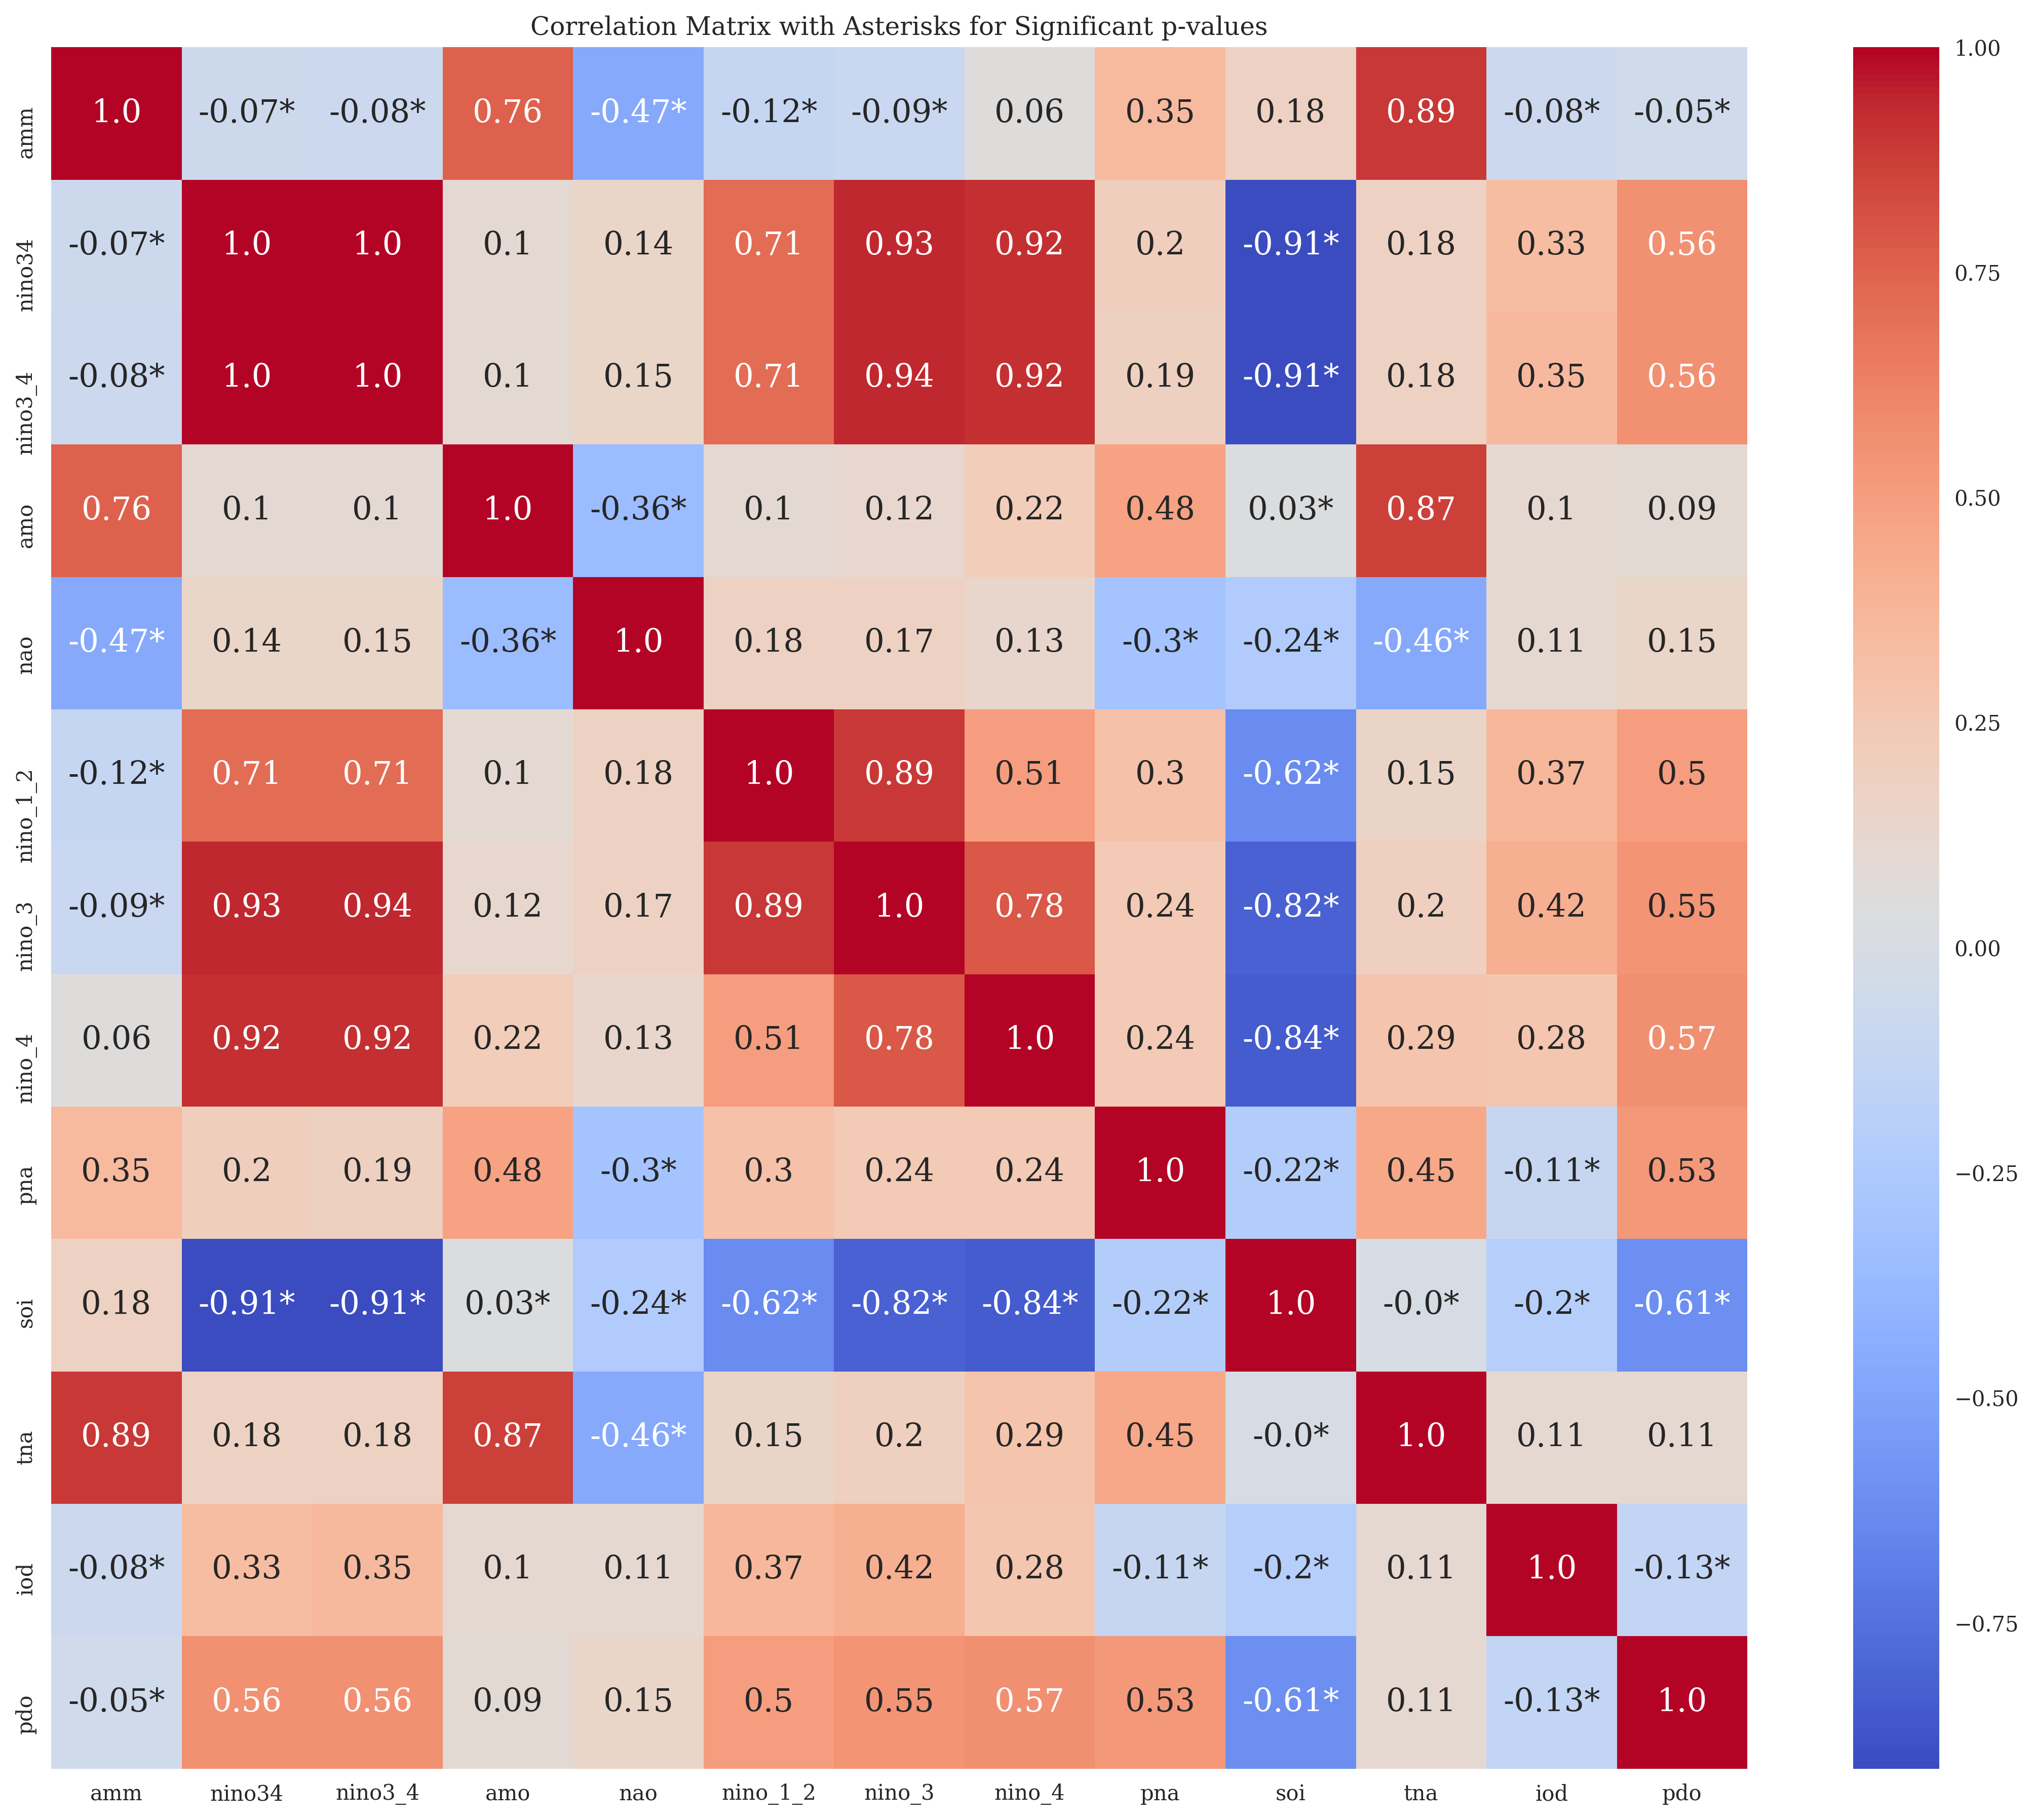

In [108]:
# Correlation matrix
corr_matrix = gk.corr()

# Calculate p-values for correlation
p_values = gk.apply(lambda x: gk.corrwith(x).apply(lambda y: '*' if y < 0.05 else ''))


# Plot heatmap with asterisks for significant p-values
plt.figure(figsize=(18, 15), dpi=300)
annot_values = corr_matrix.round(2).astype(str) + p_values
sns.heatmap(corr_matrix, annot=annot_values, cmap='coolwarm', fmt="", annot_kws={"size": 15})
plt.title('Correlation Matrix with Asterisks for Significant p-values')
plt.show()


* There are a few correlations with a higher absolute value than 0.70, which is often a rule-of-thumb for concern about multicollinearity. These are:
    * nino34 with nino3_4 (0.93)
    * nino34 with nino_4 (0.94)
    * nino3_4 with nino_4 (0.92)
    * amo with nino34 (0.91)
    * amo with nino3_4 (0.93)
    * amo with nino_4 (0.92)

* However, these high correlations seem to be between variations of the Nino3.4 index (nino34, nino3_4, nino_4) and the amo index. It's reasonable to expect these climate indices to be highly correlated.

Given the context of the data (climate indices), these high correlations might be less worrisome than they would be in other contexts. 

In conclusion, while the correlation matrix shows some high correlations, they seem to be between thematically related climate indices. 
However, to be more certain, it would be helpful to calculate VIFs to get a clearer picture. 

* **Variance Inflation Factor (VIF):**

In [109]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Function to calculate VIF
def calculate_vif(data):
    # Add a constant column to the data
    data_with_const = add_constant(data)
    # Calculate VIF for each variable
    vif_data = pd.Series([variance_inflation_factor(data_with_const.values, i) 
                          for i in range(data_with_const.shape[1])], 
                         index=data_with_const.columns)
    return vif_data

# Calculate VIF for the dataframe
vif_results = calculate_vif(gk)

# Display the VIF results
print("Variance Inflation Factor (VIF):")
print(vif_results)


Variance Inflation Factor (VIF):
const        56.514652
amm           9.970837
nino34      369.691868
nino3_4     414.803742
amo           4.842784
nao           2.040751
nino_1_2     13.414040
nino_3       57.136898
nino_4       16.205359
pna           2.616734
soi           9.333439
tna          19.490794
iod           1.930874
pdo           3.009041
dtype: float64


This statistic measures how much the variance of an estimated coefficient is inflated due to collinearity. A VIF value greater than 10 suggests potential collinearity issues.

In [ ]:
# FeatureImportances??

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


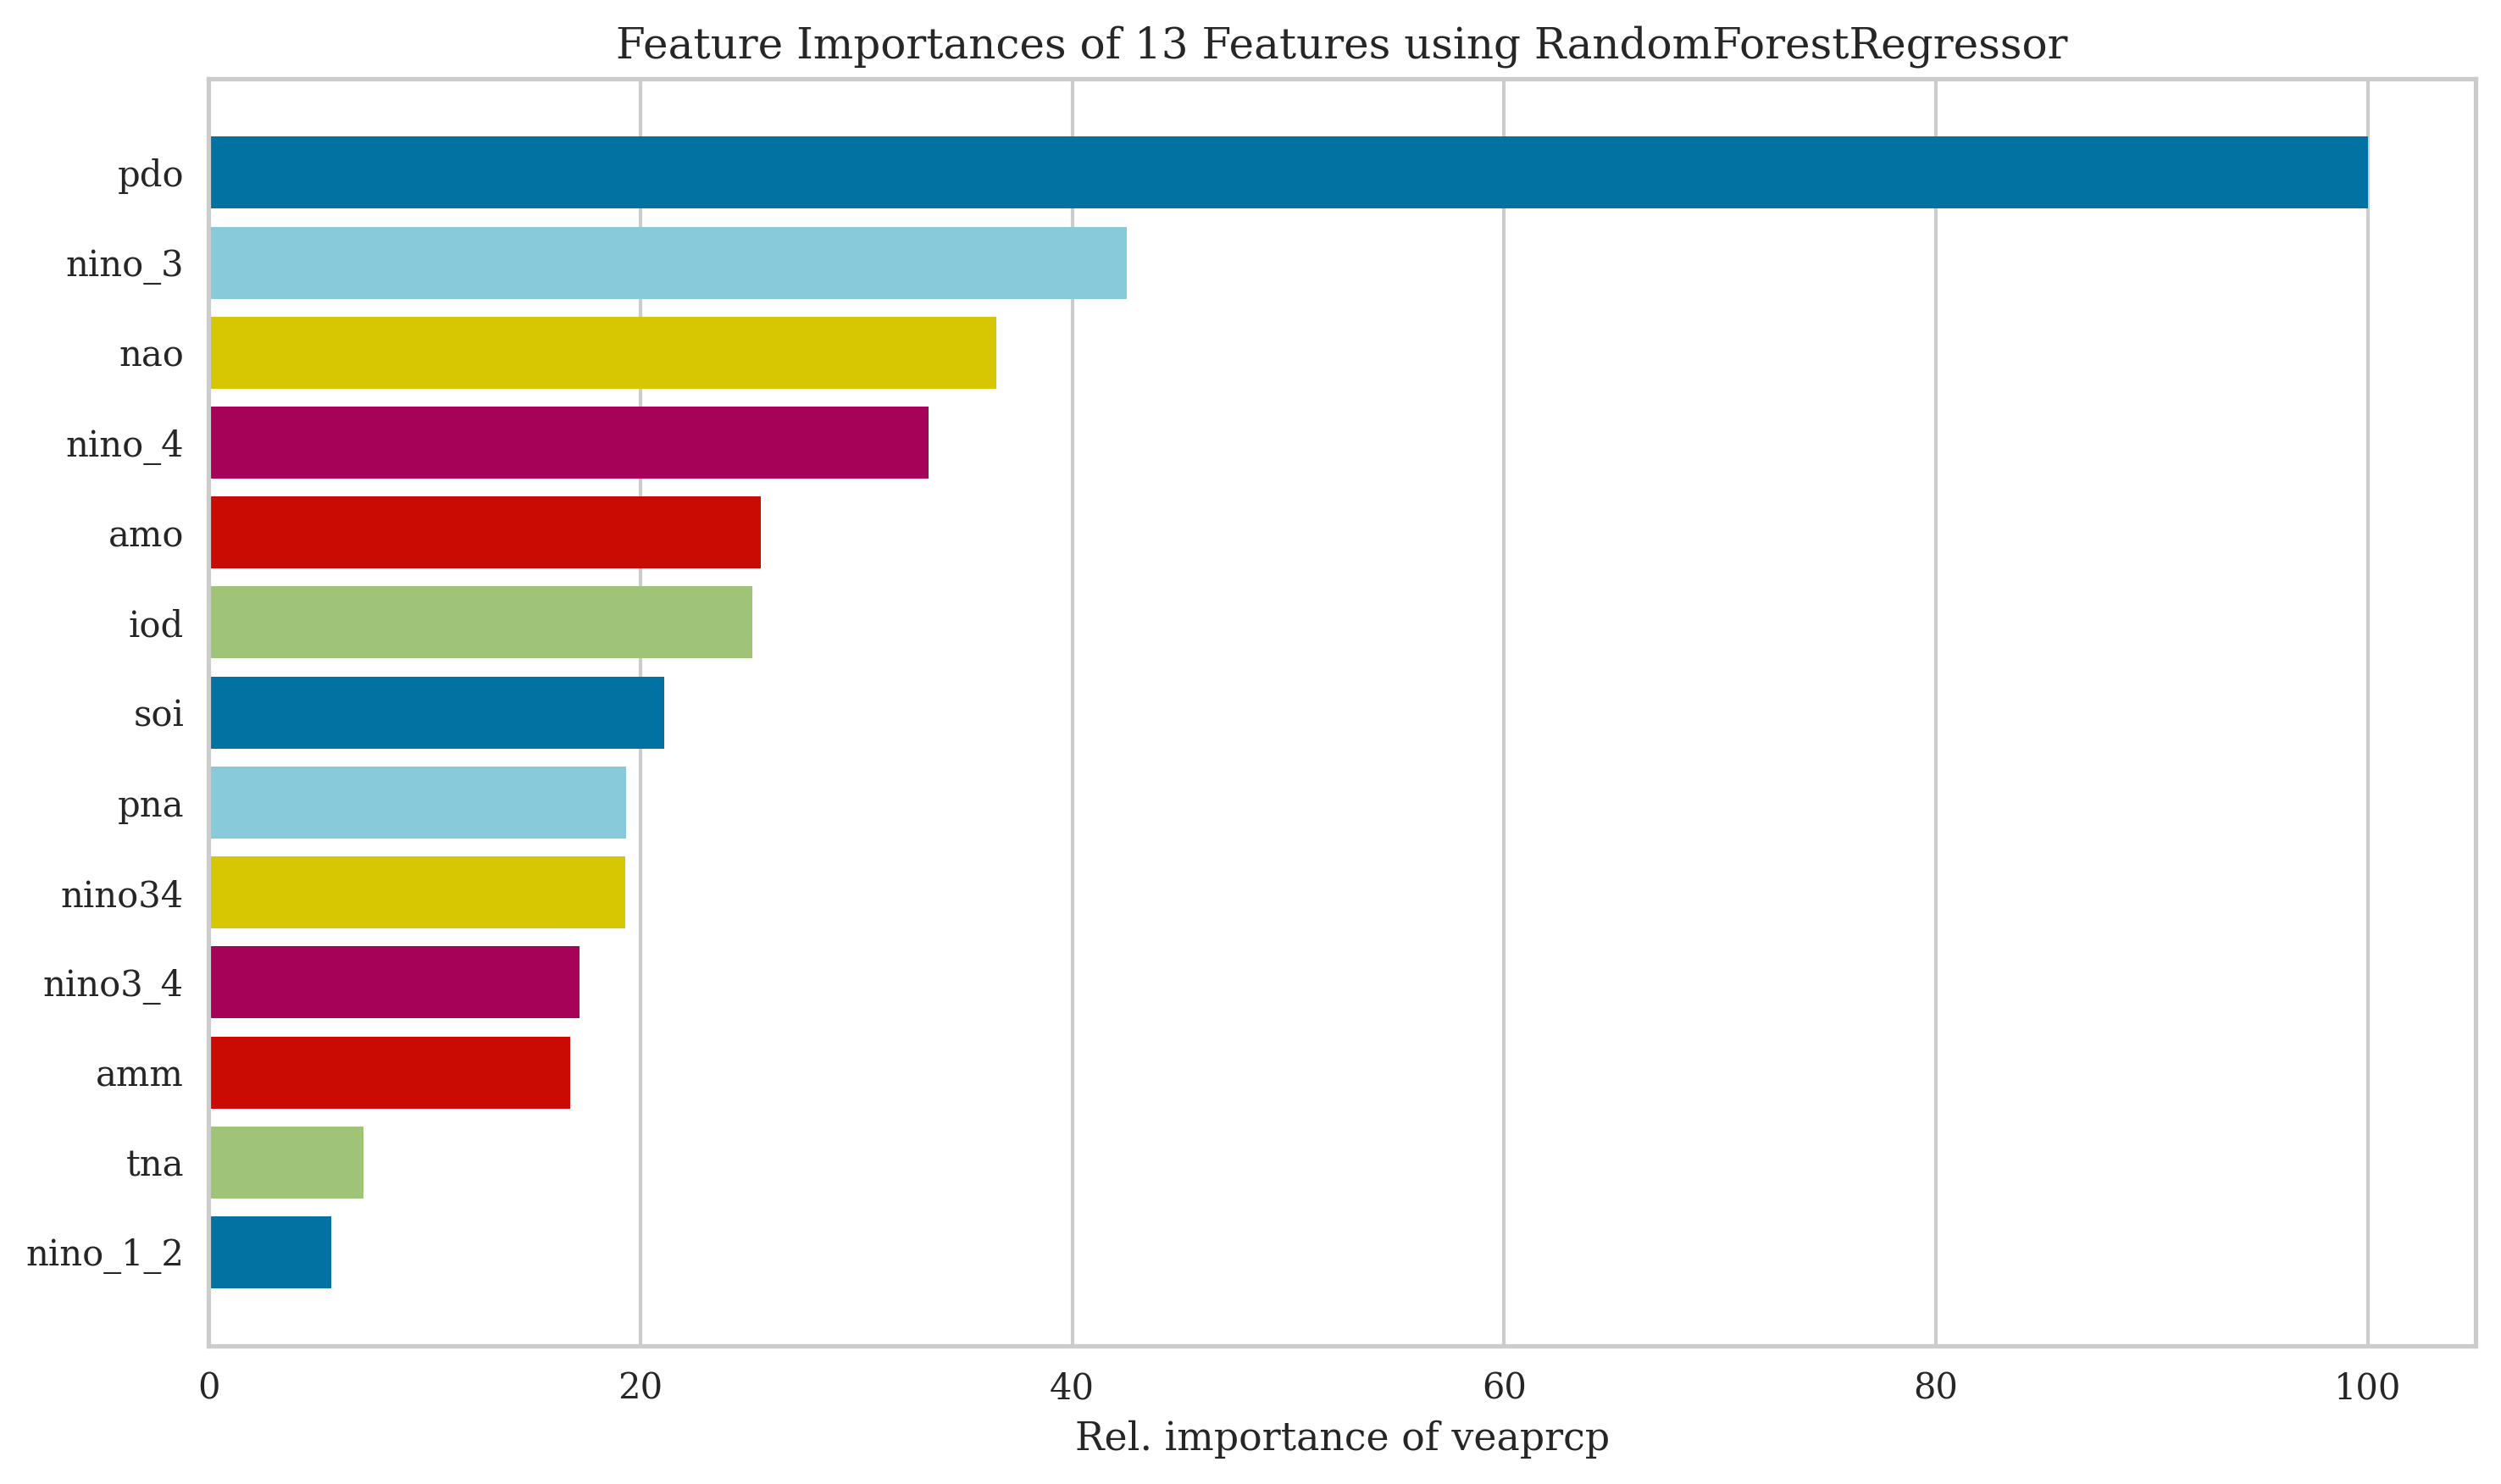

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


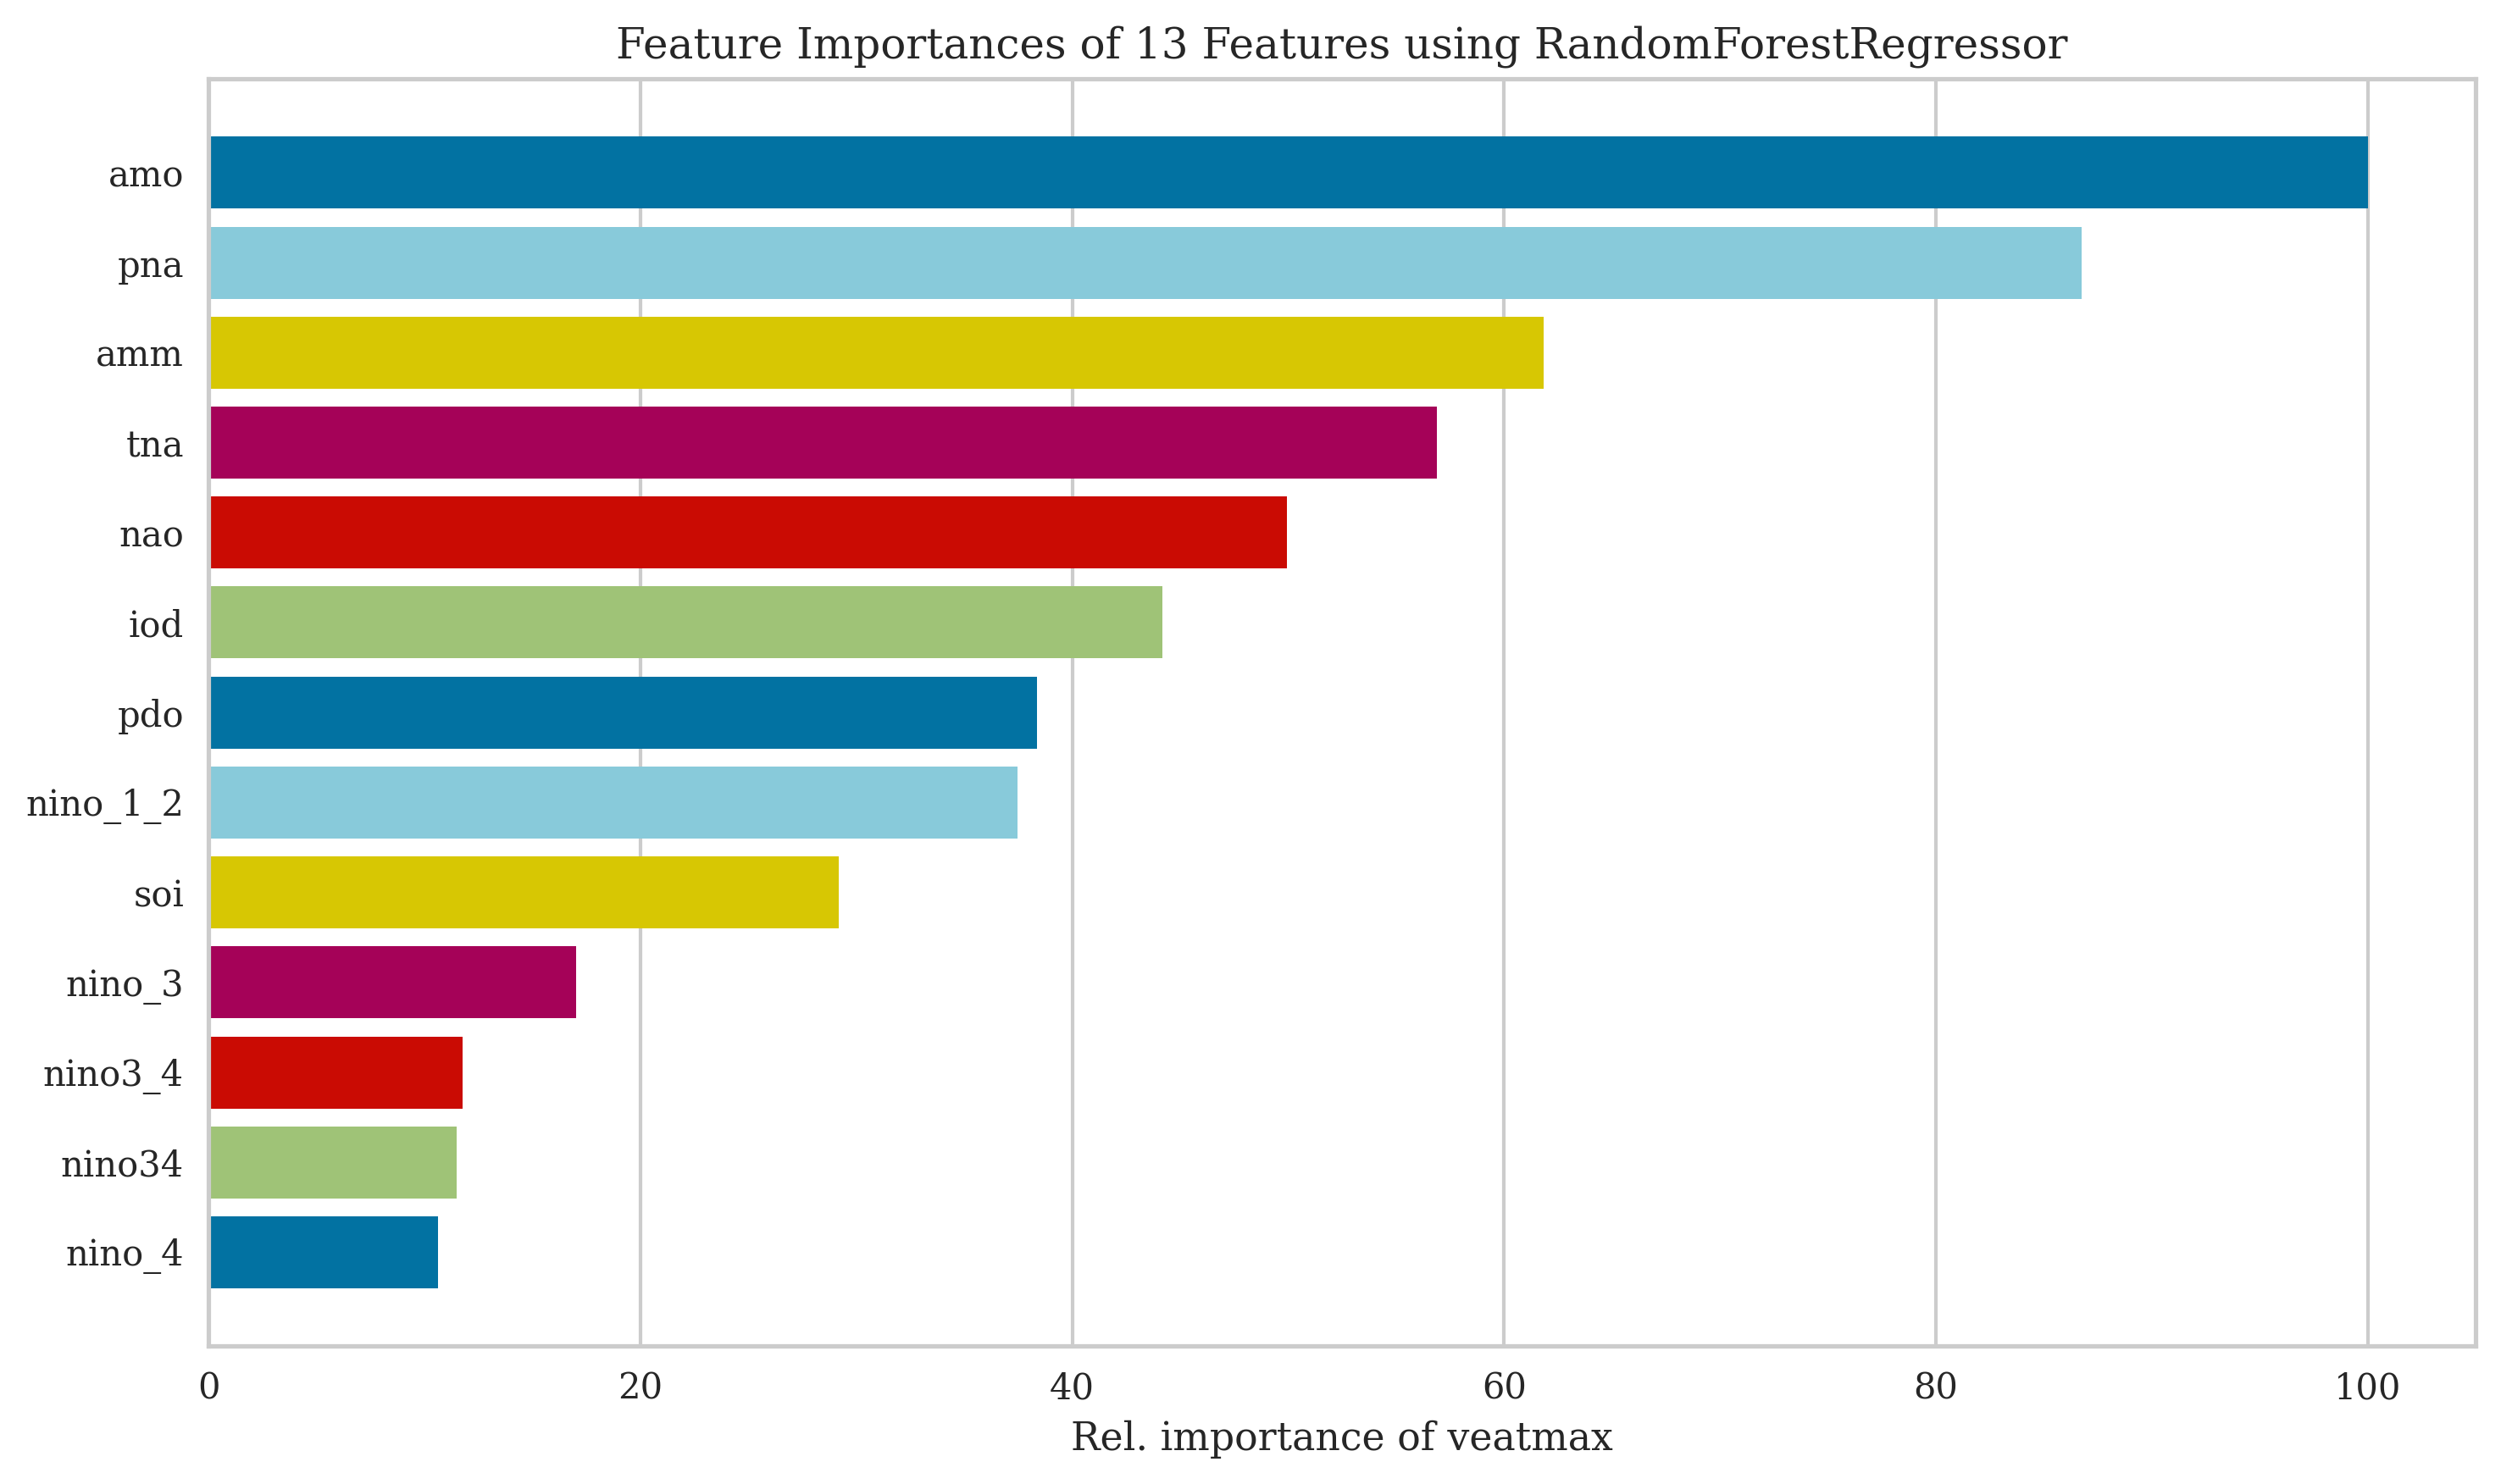

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


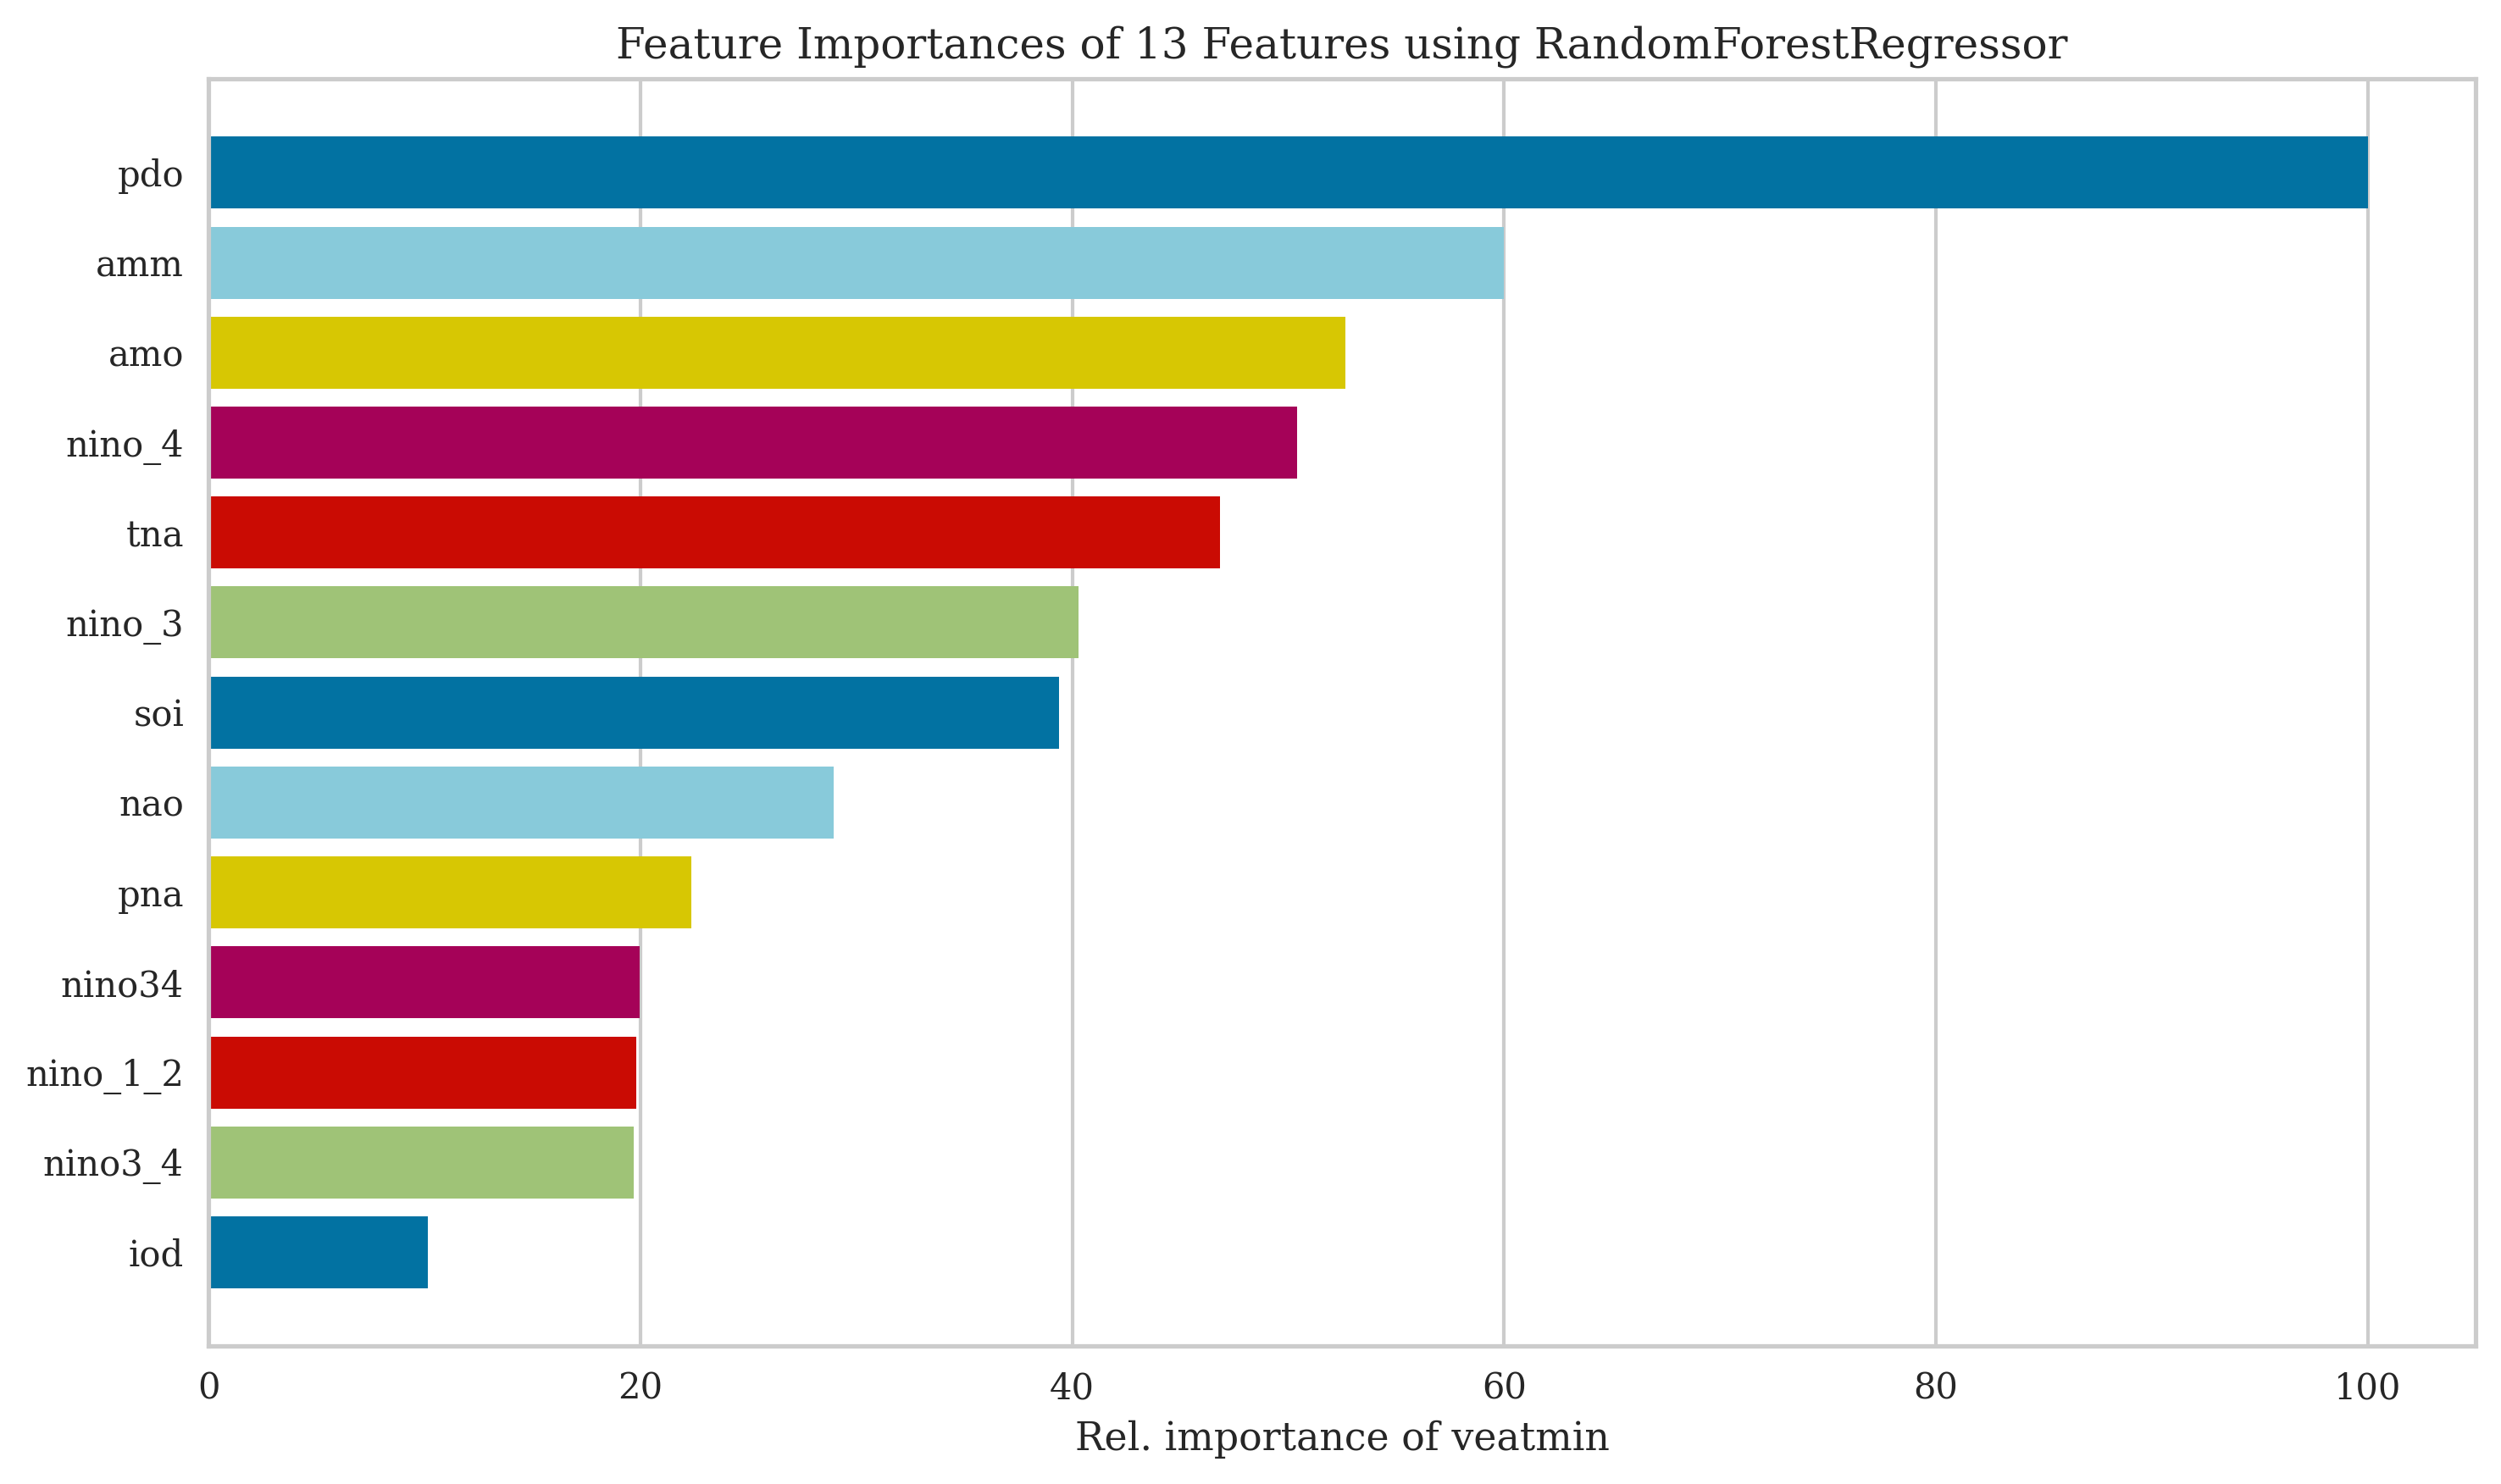

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


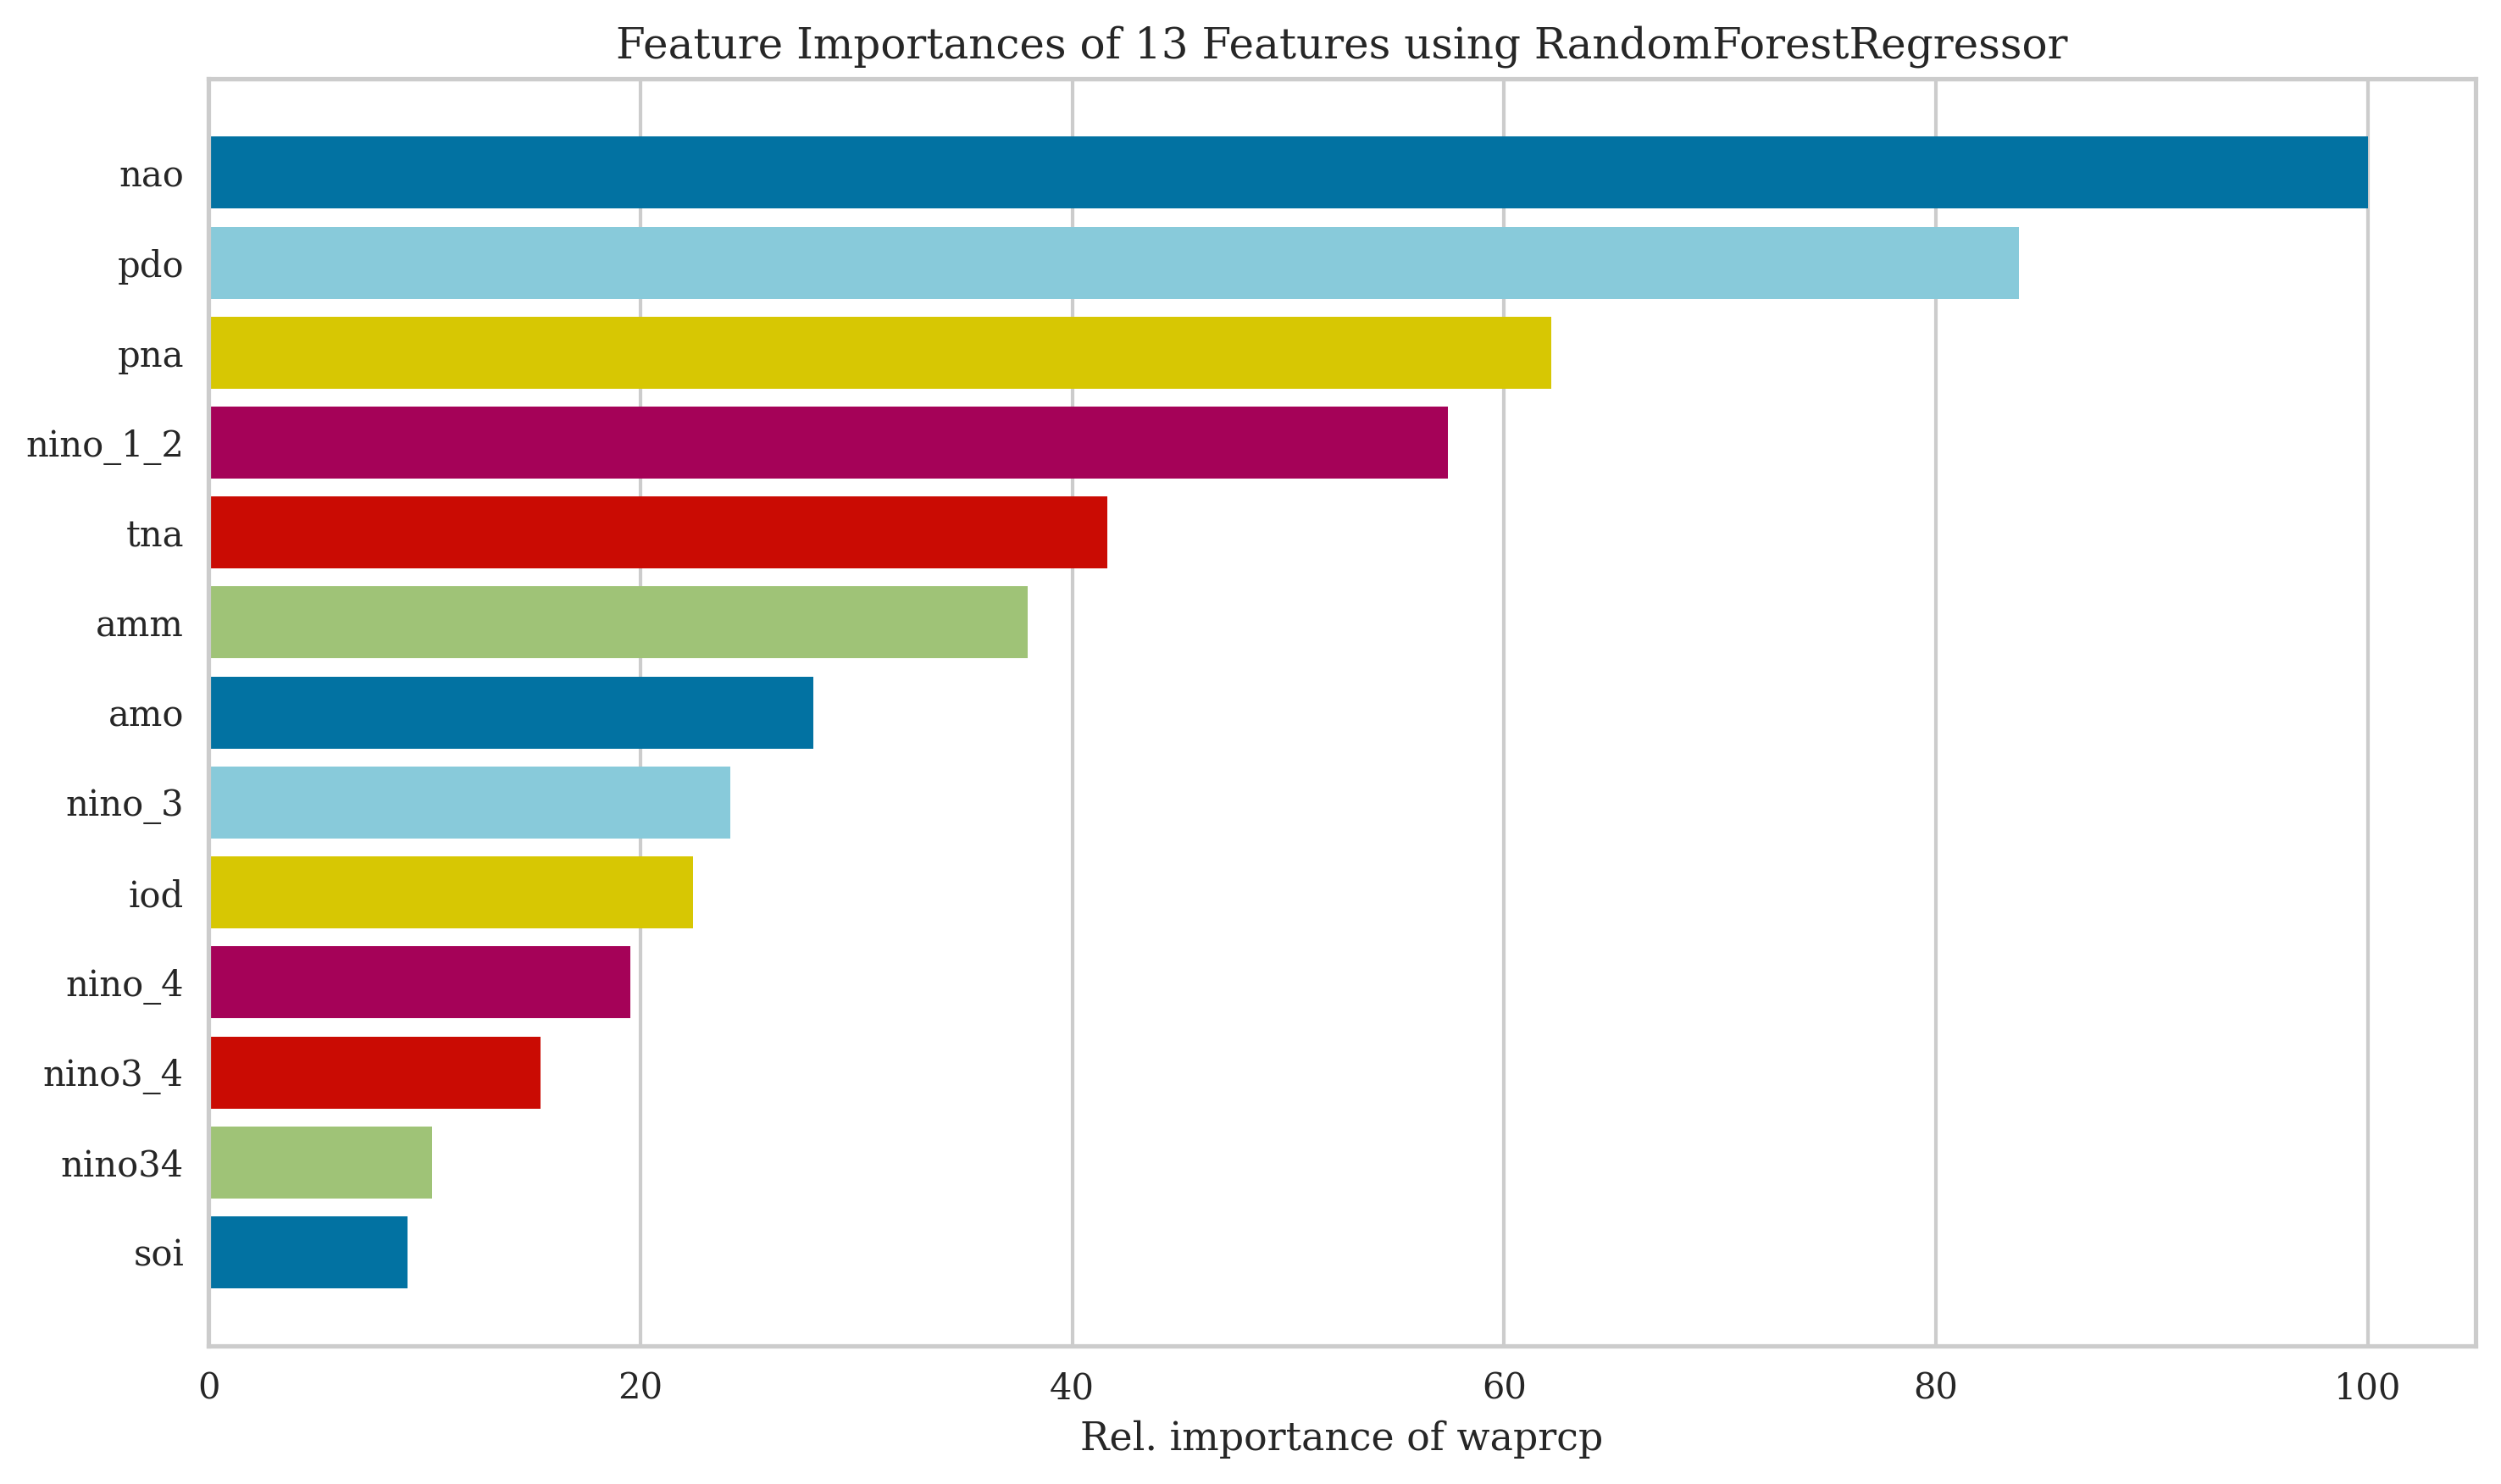

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


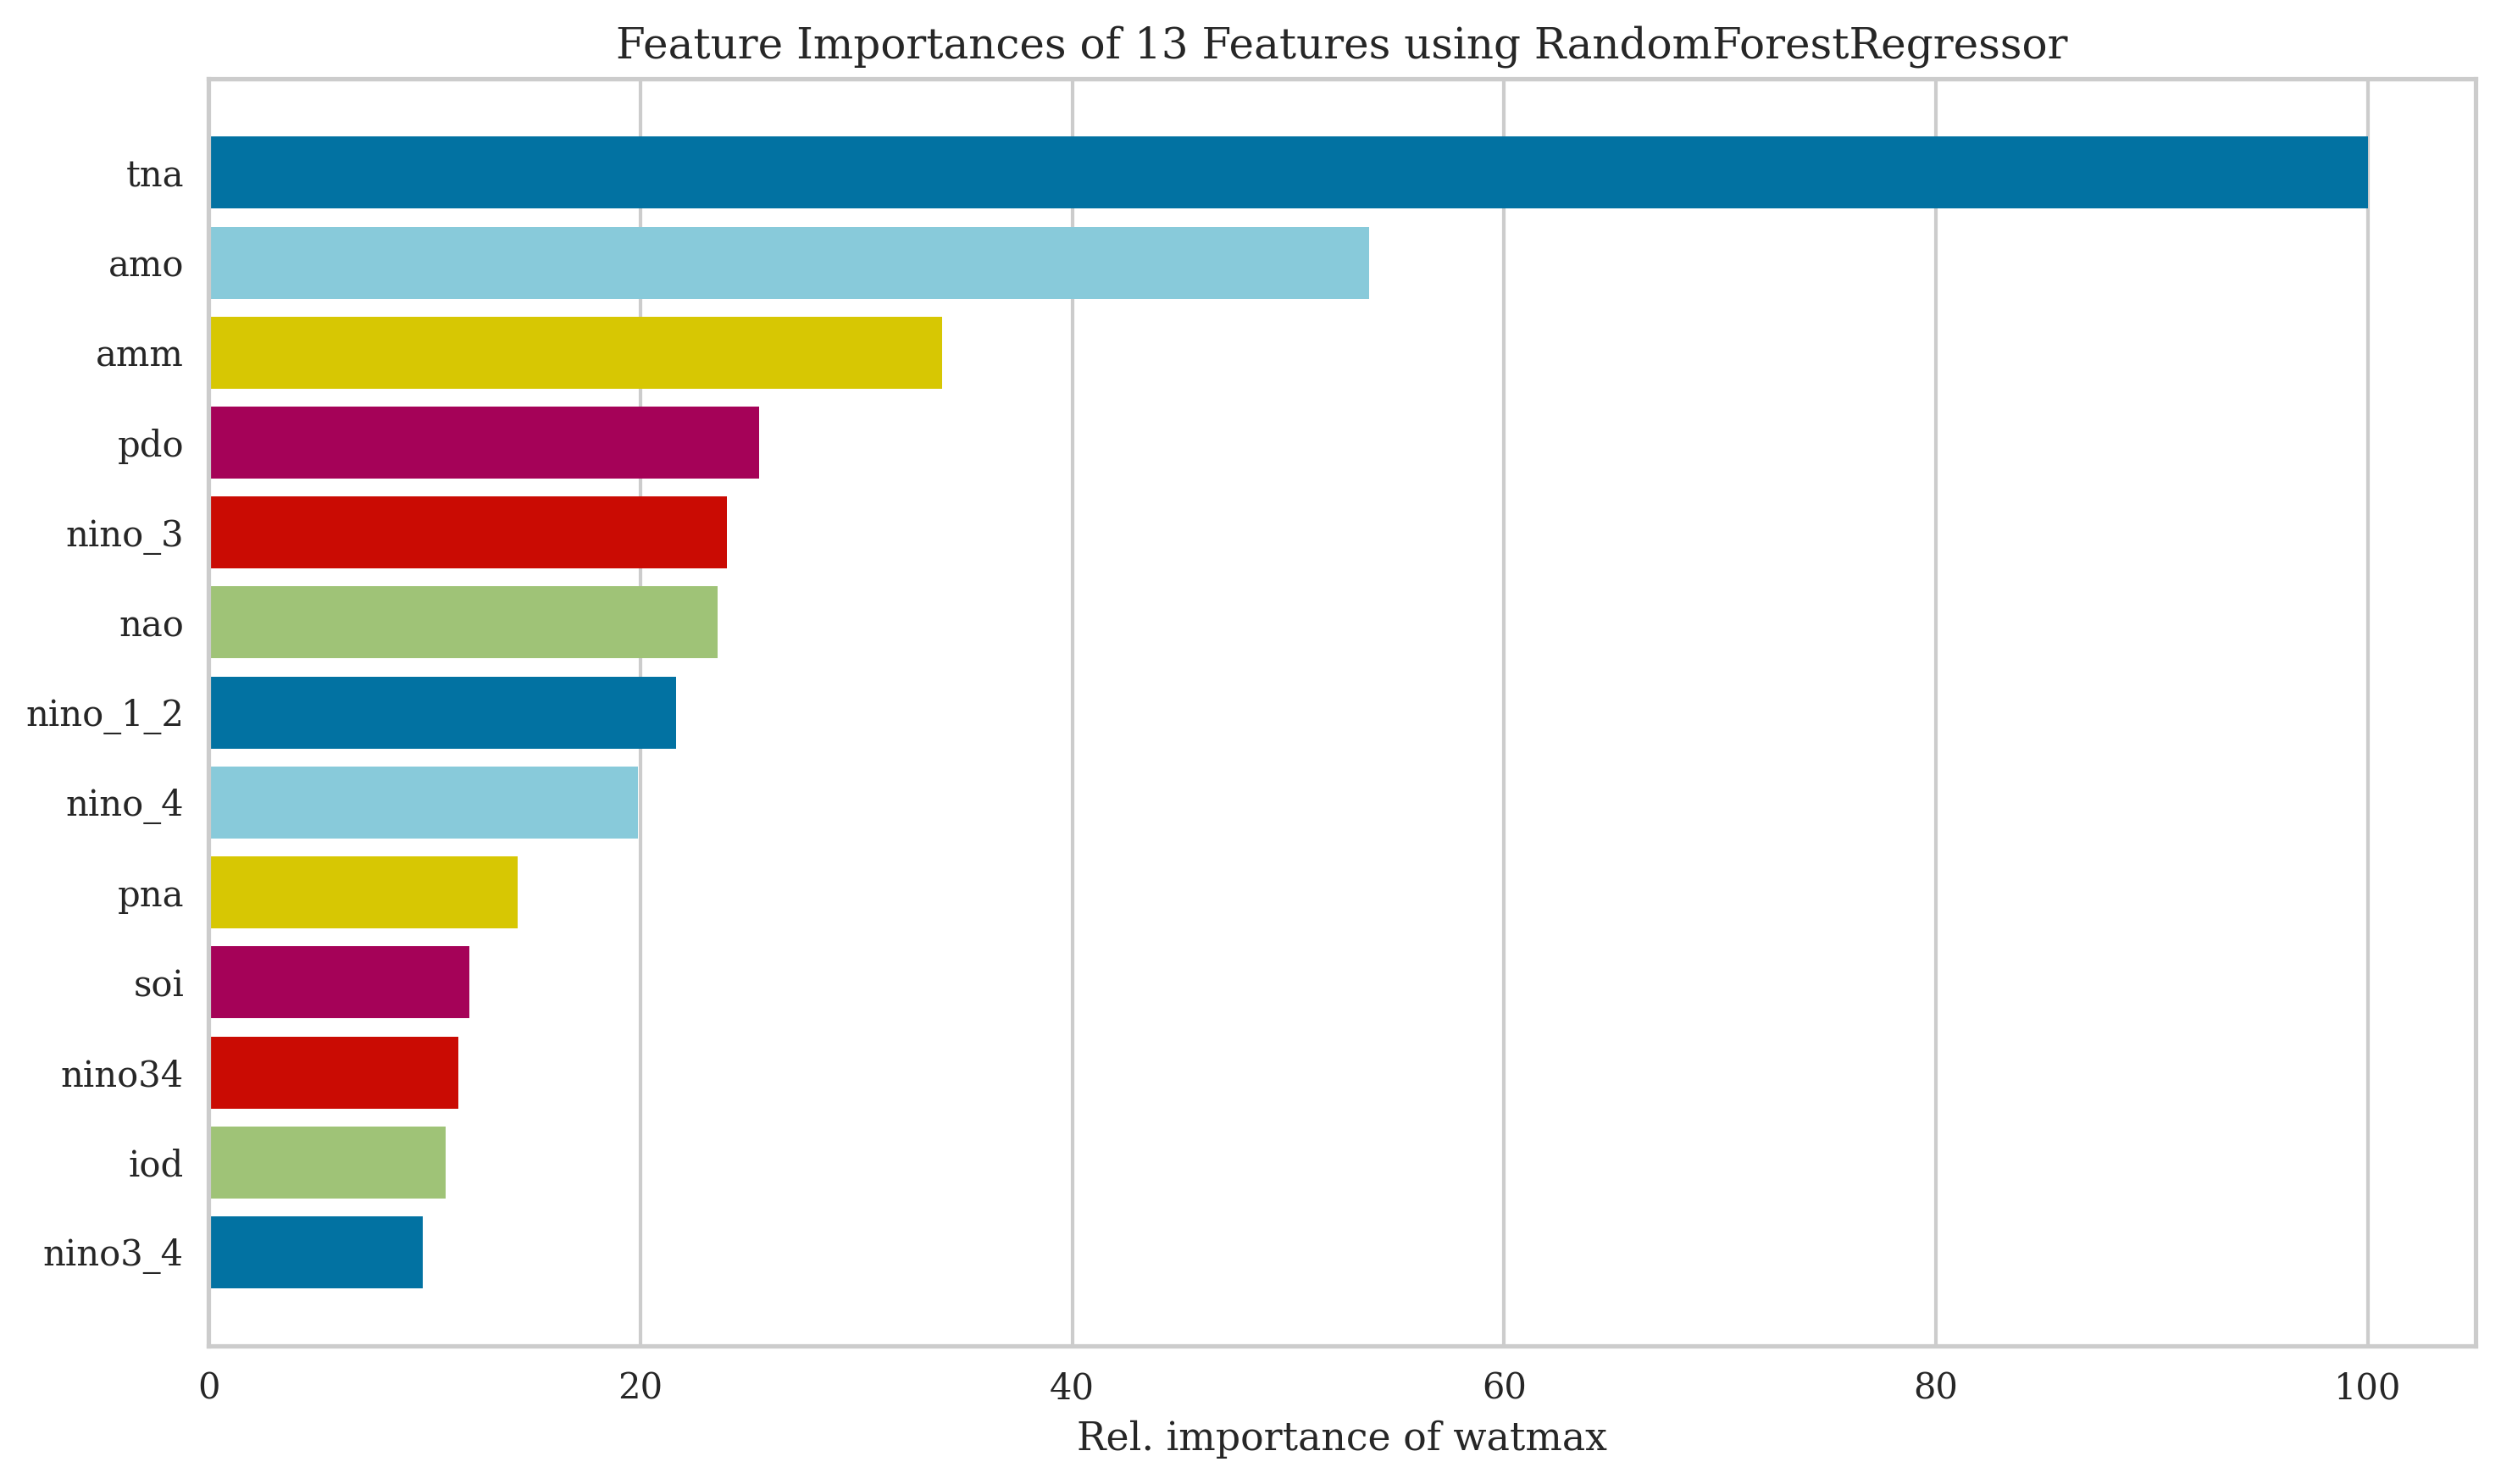

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


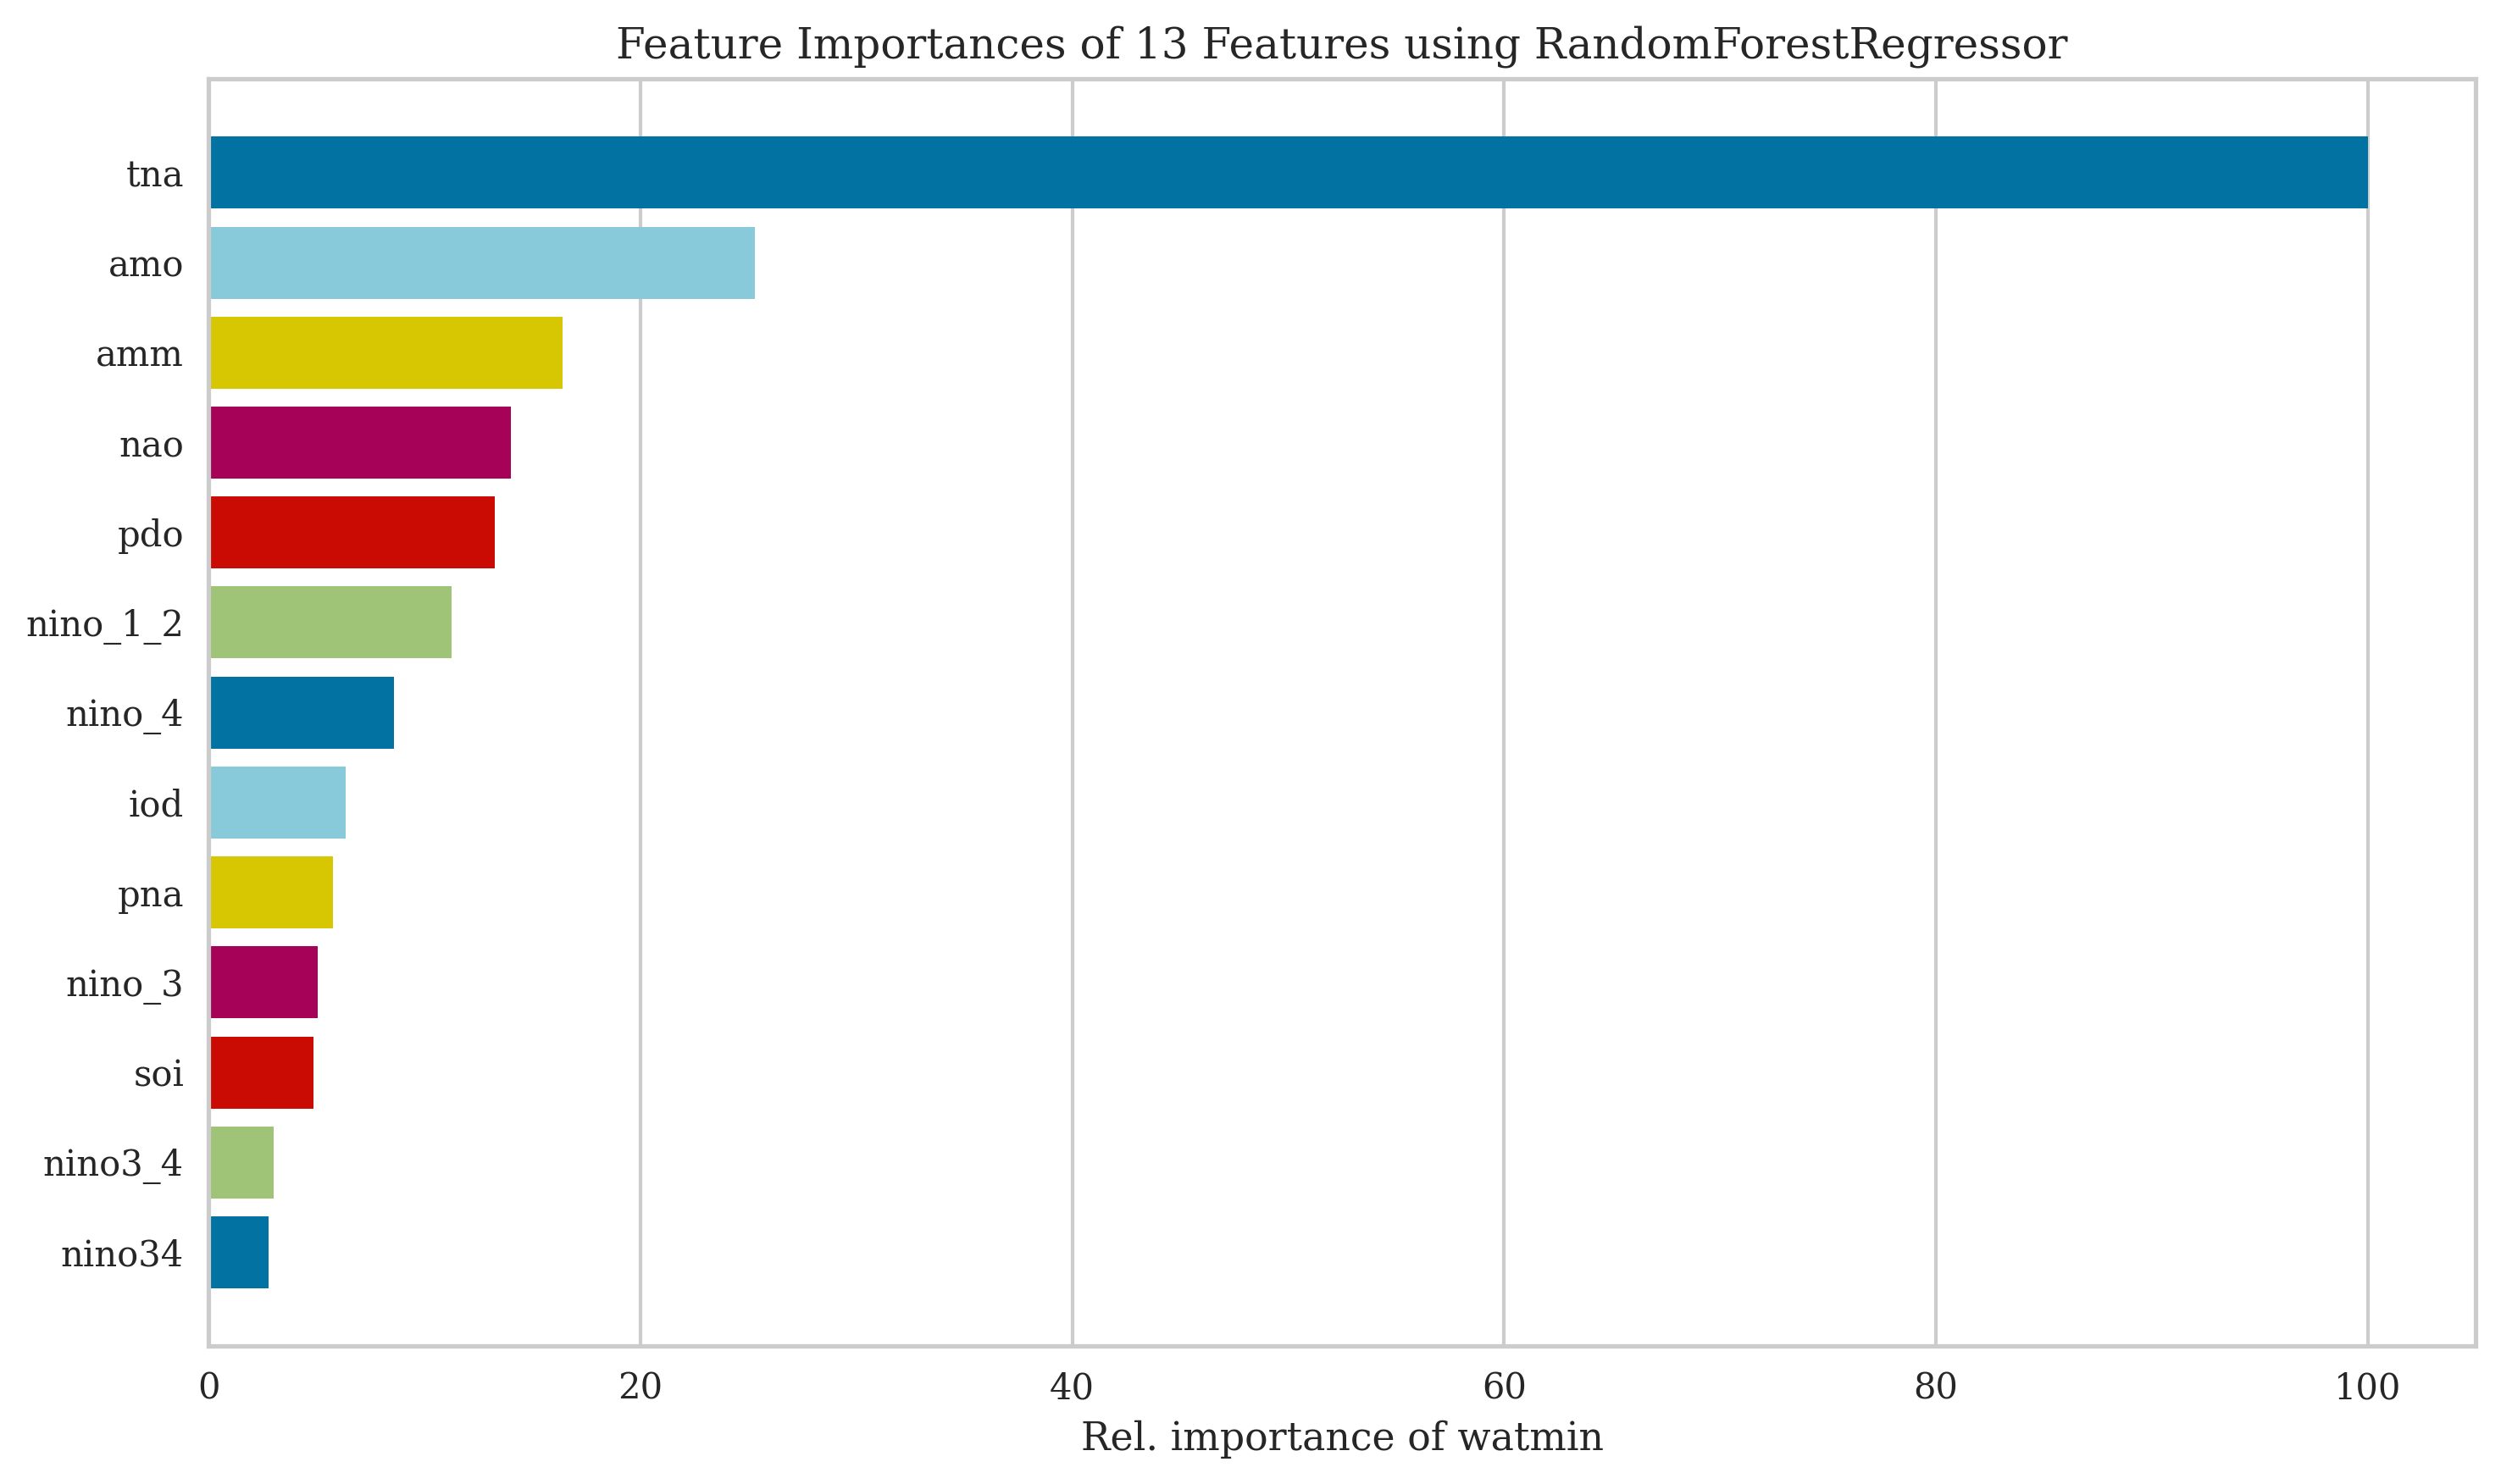

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


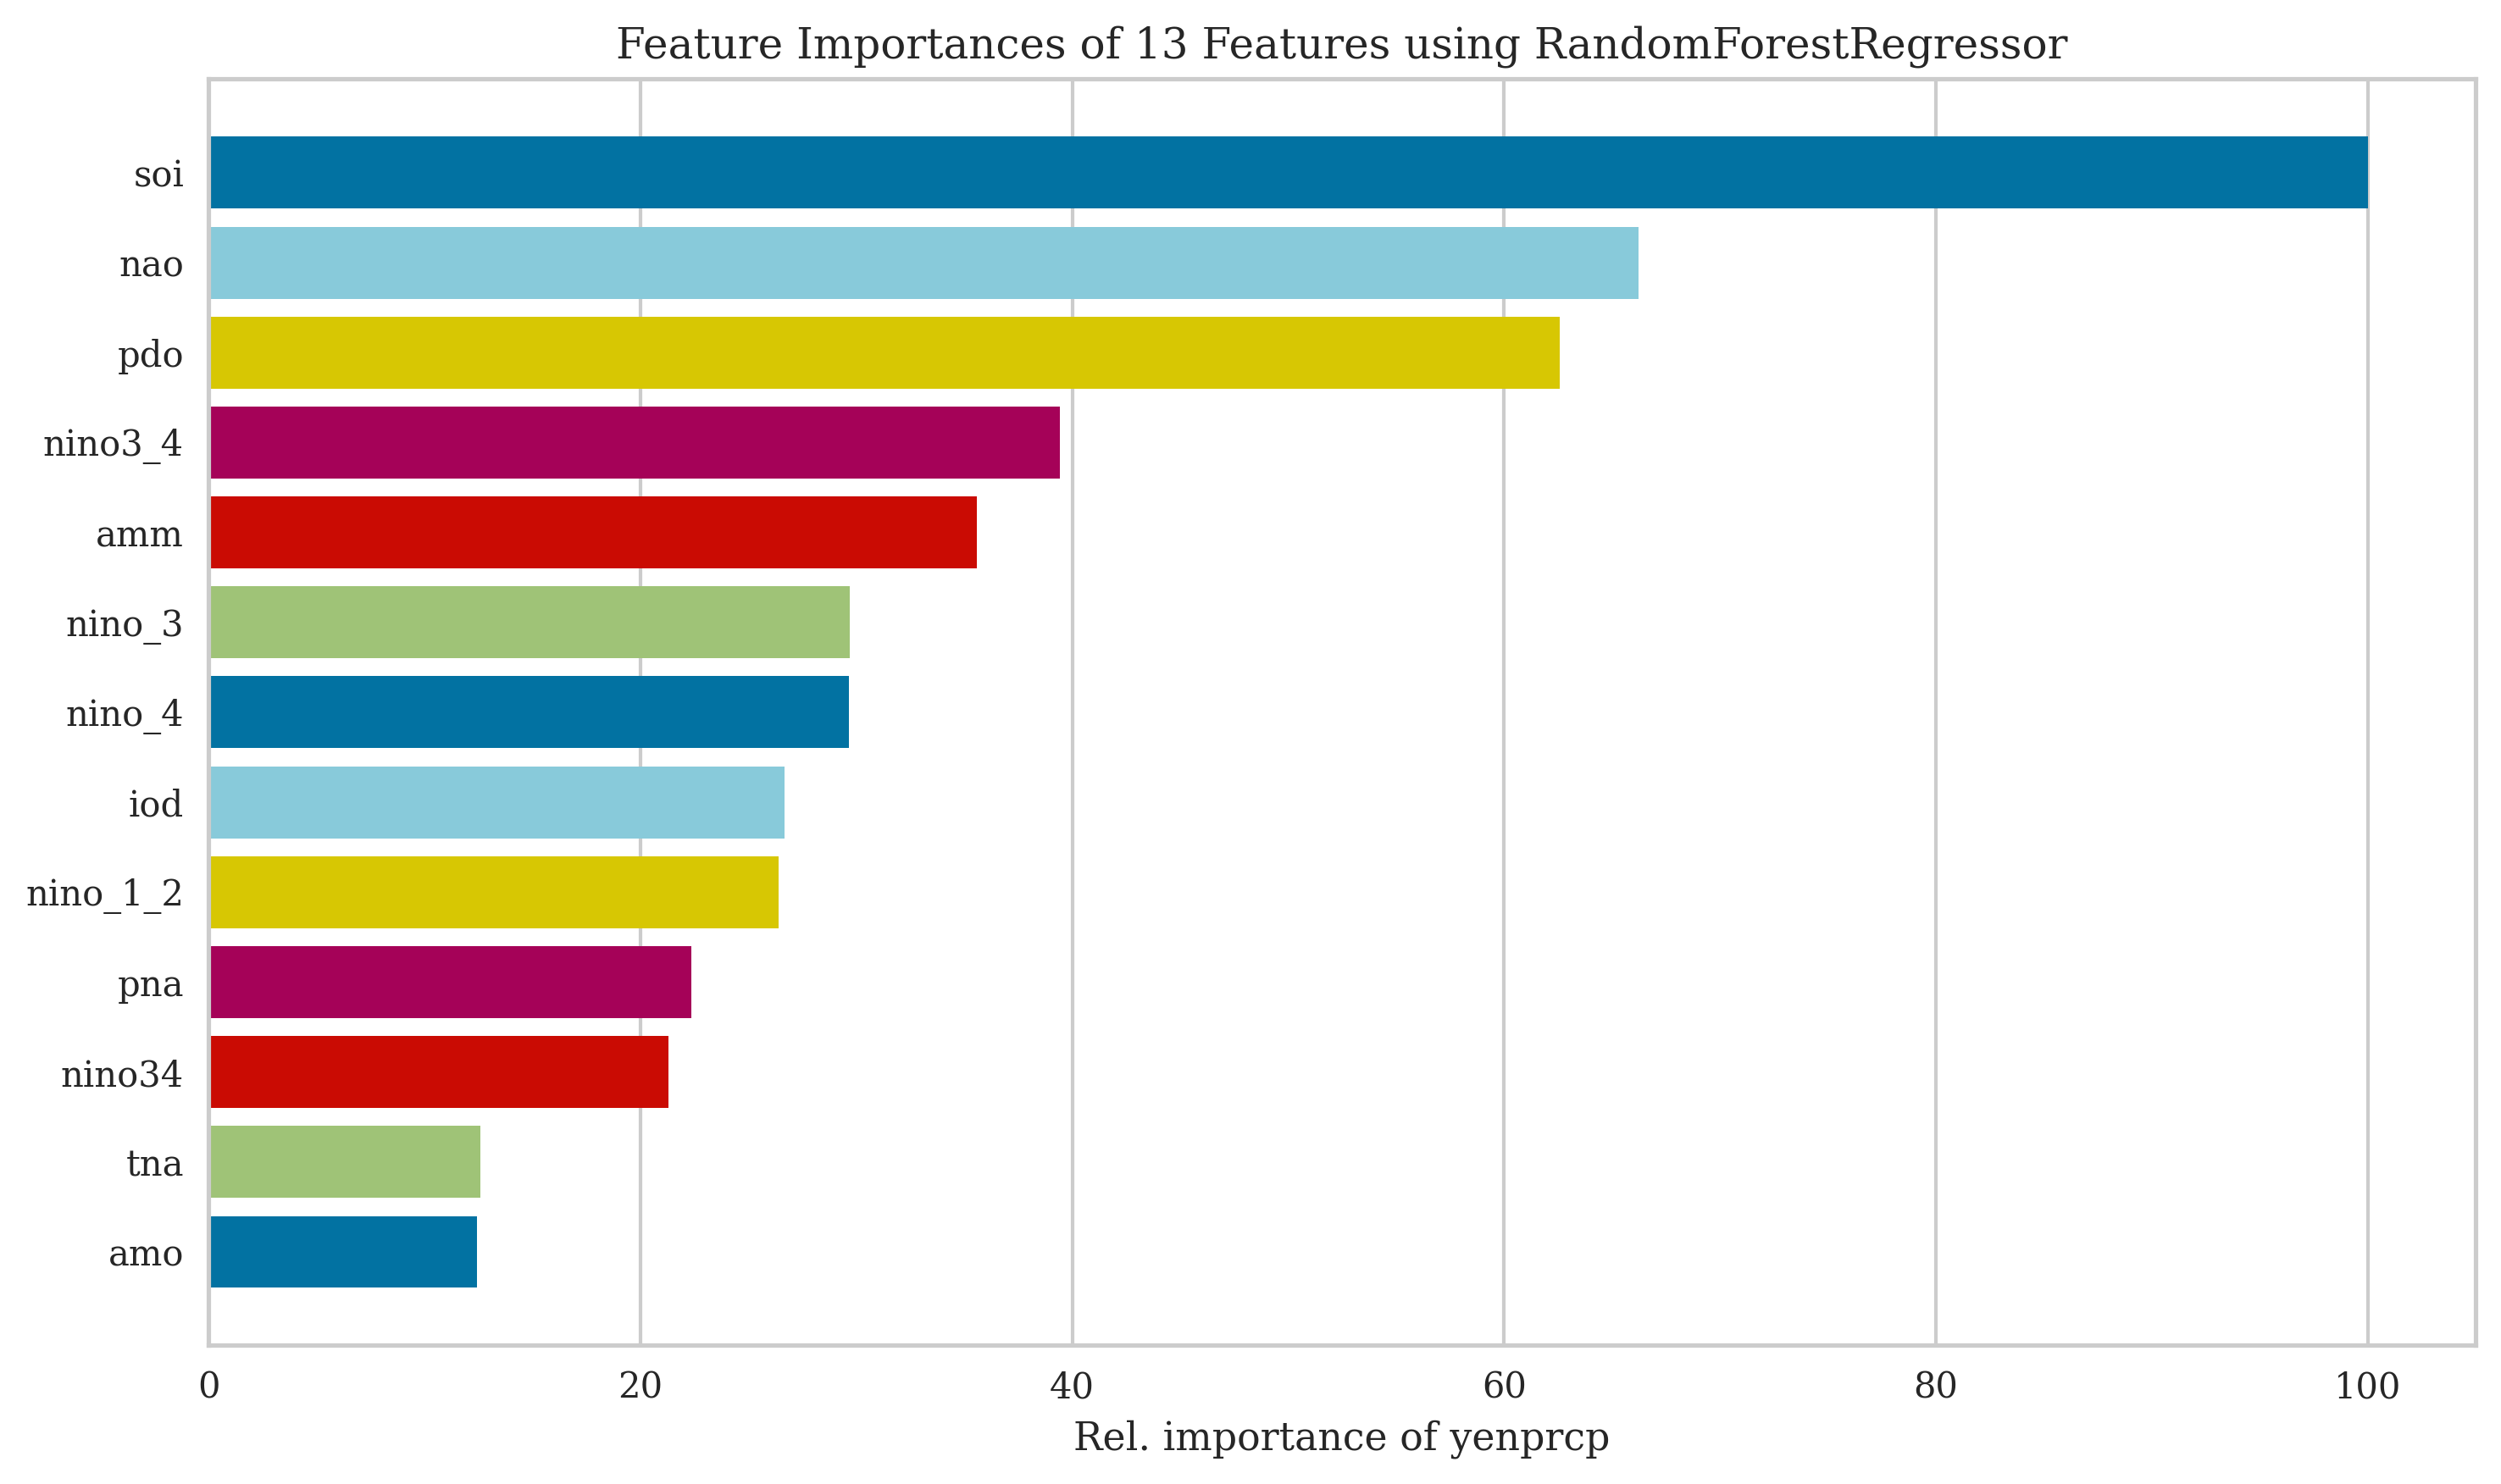

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


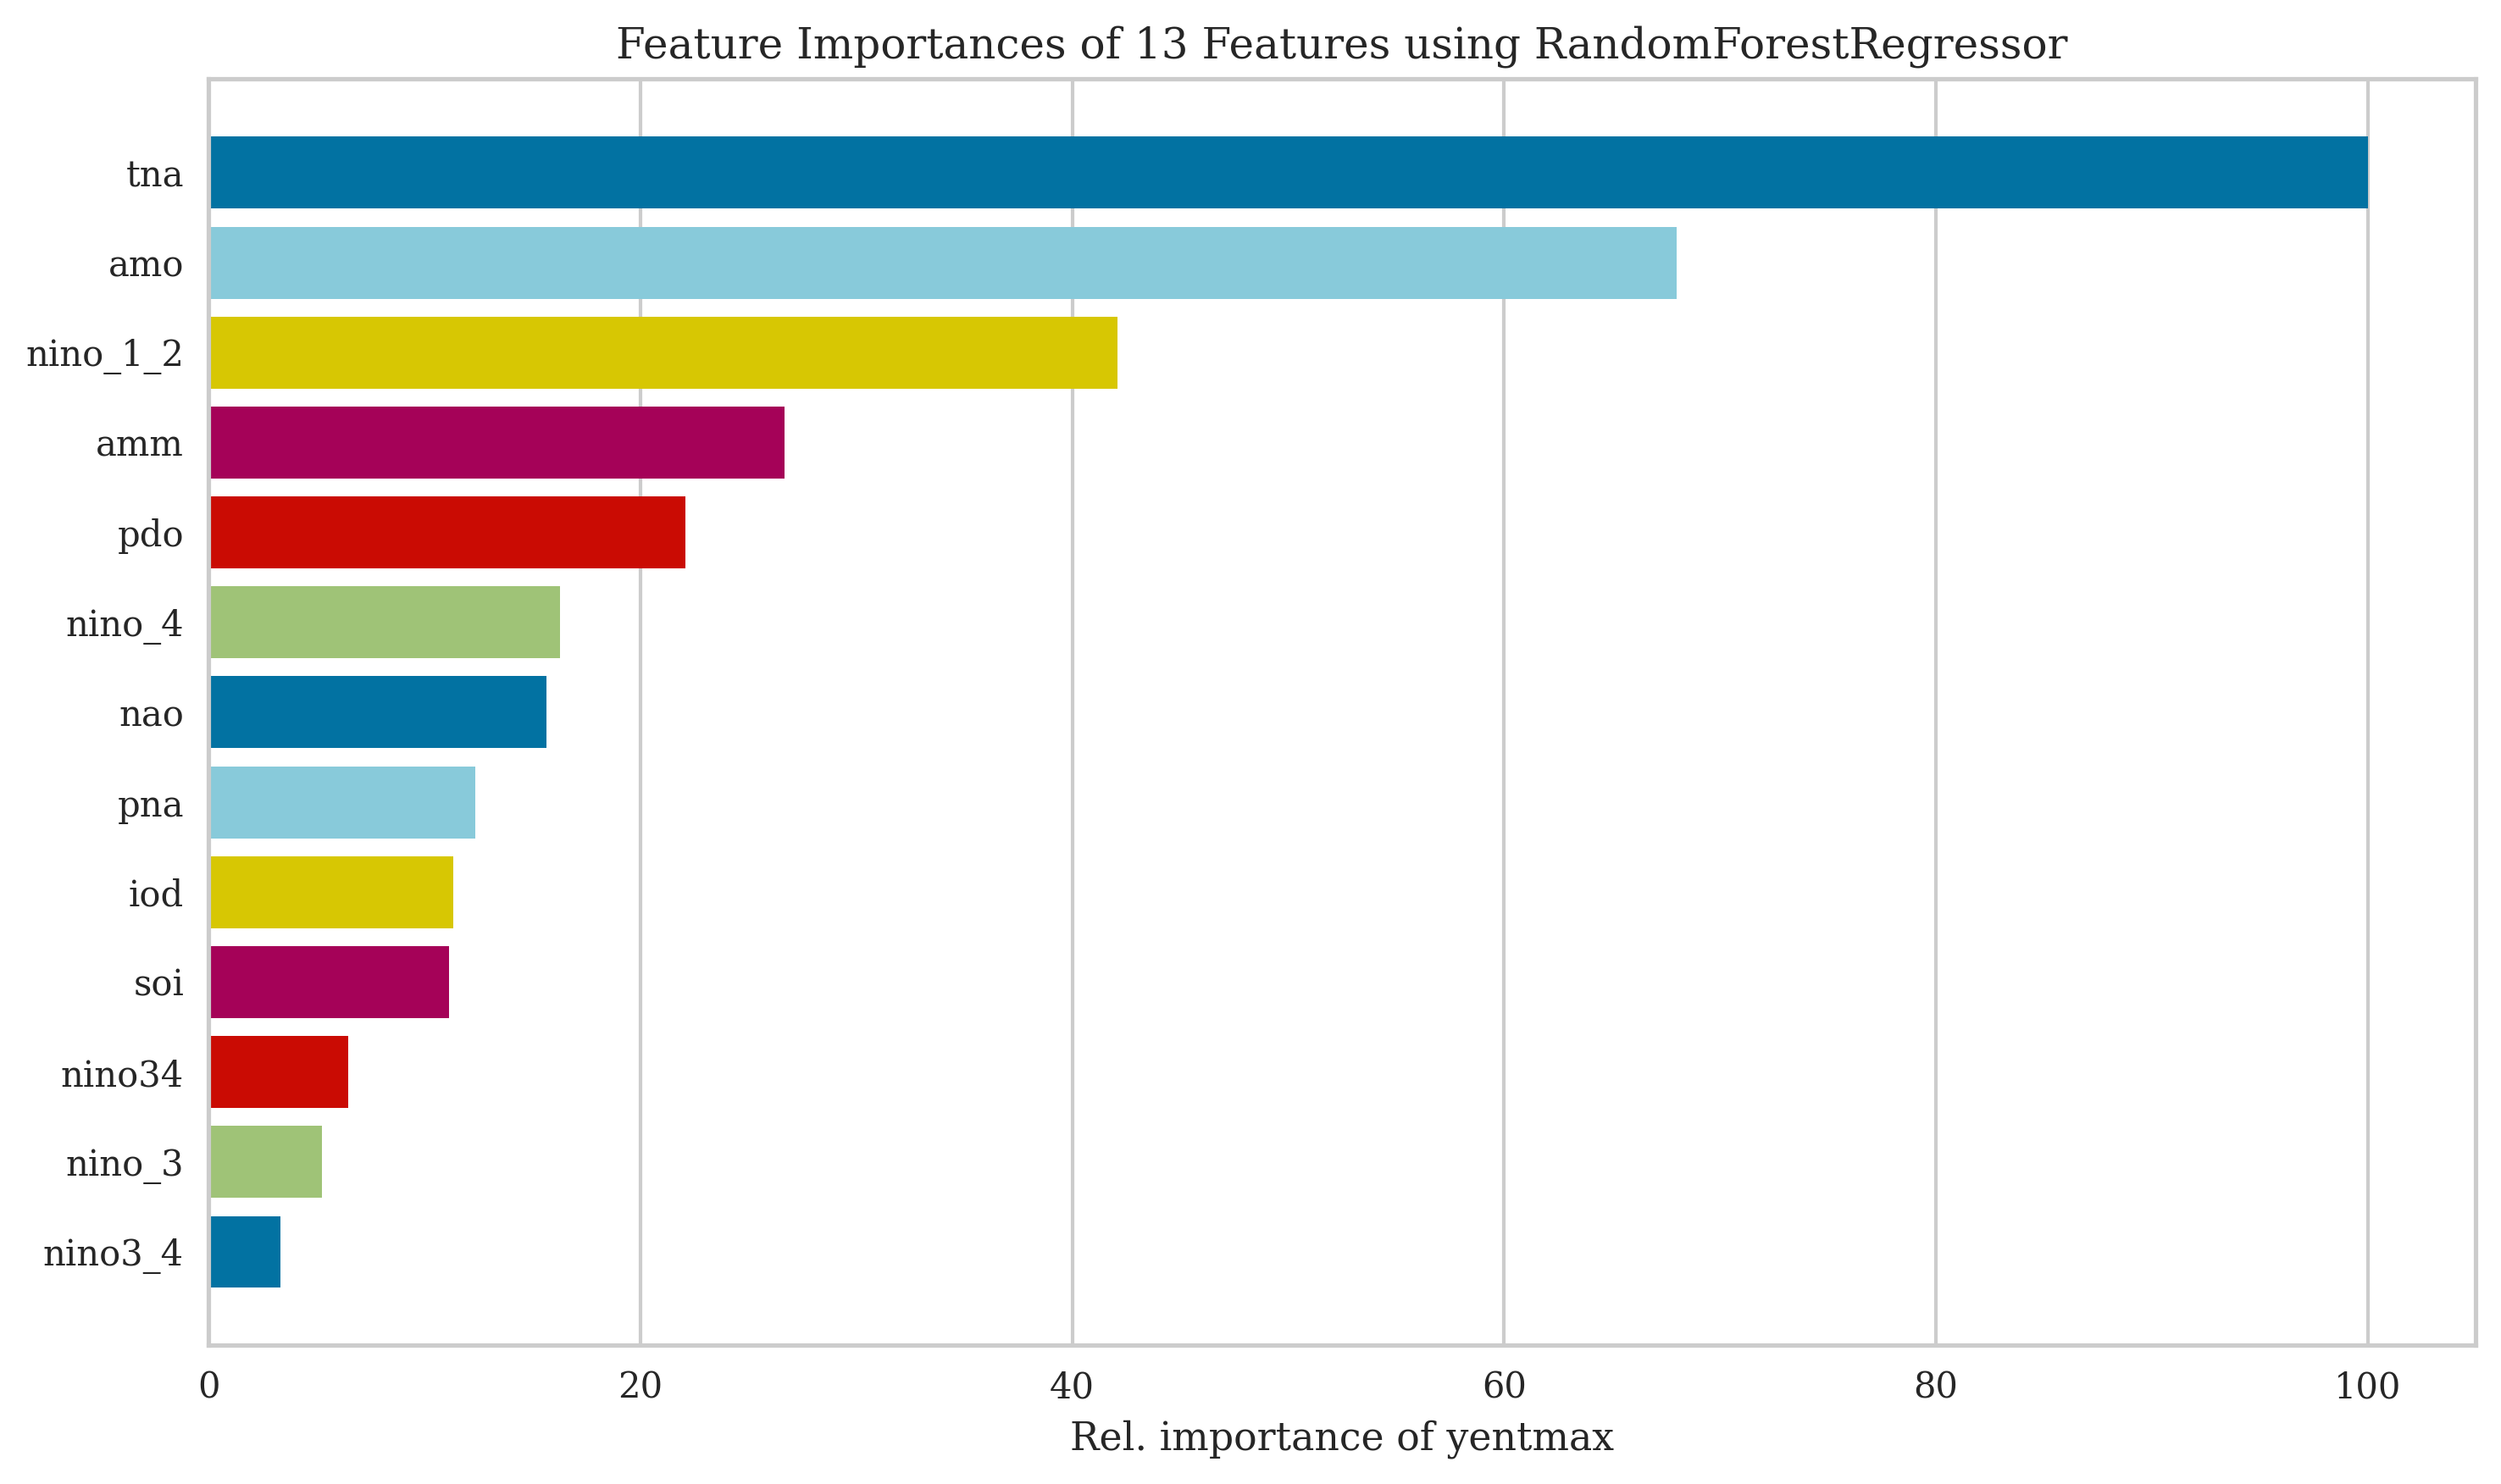

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


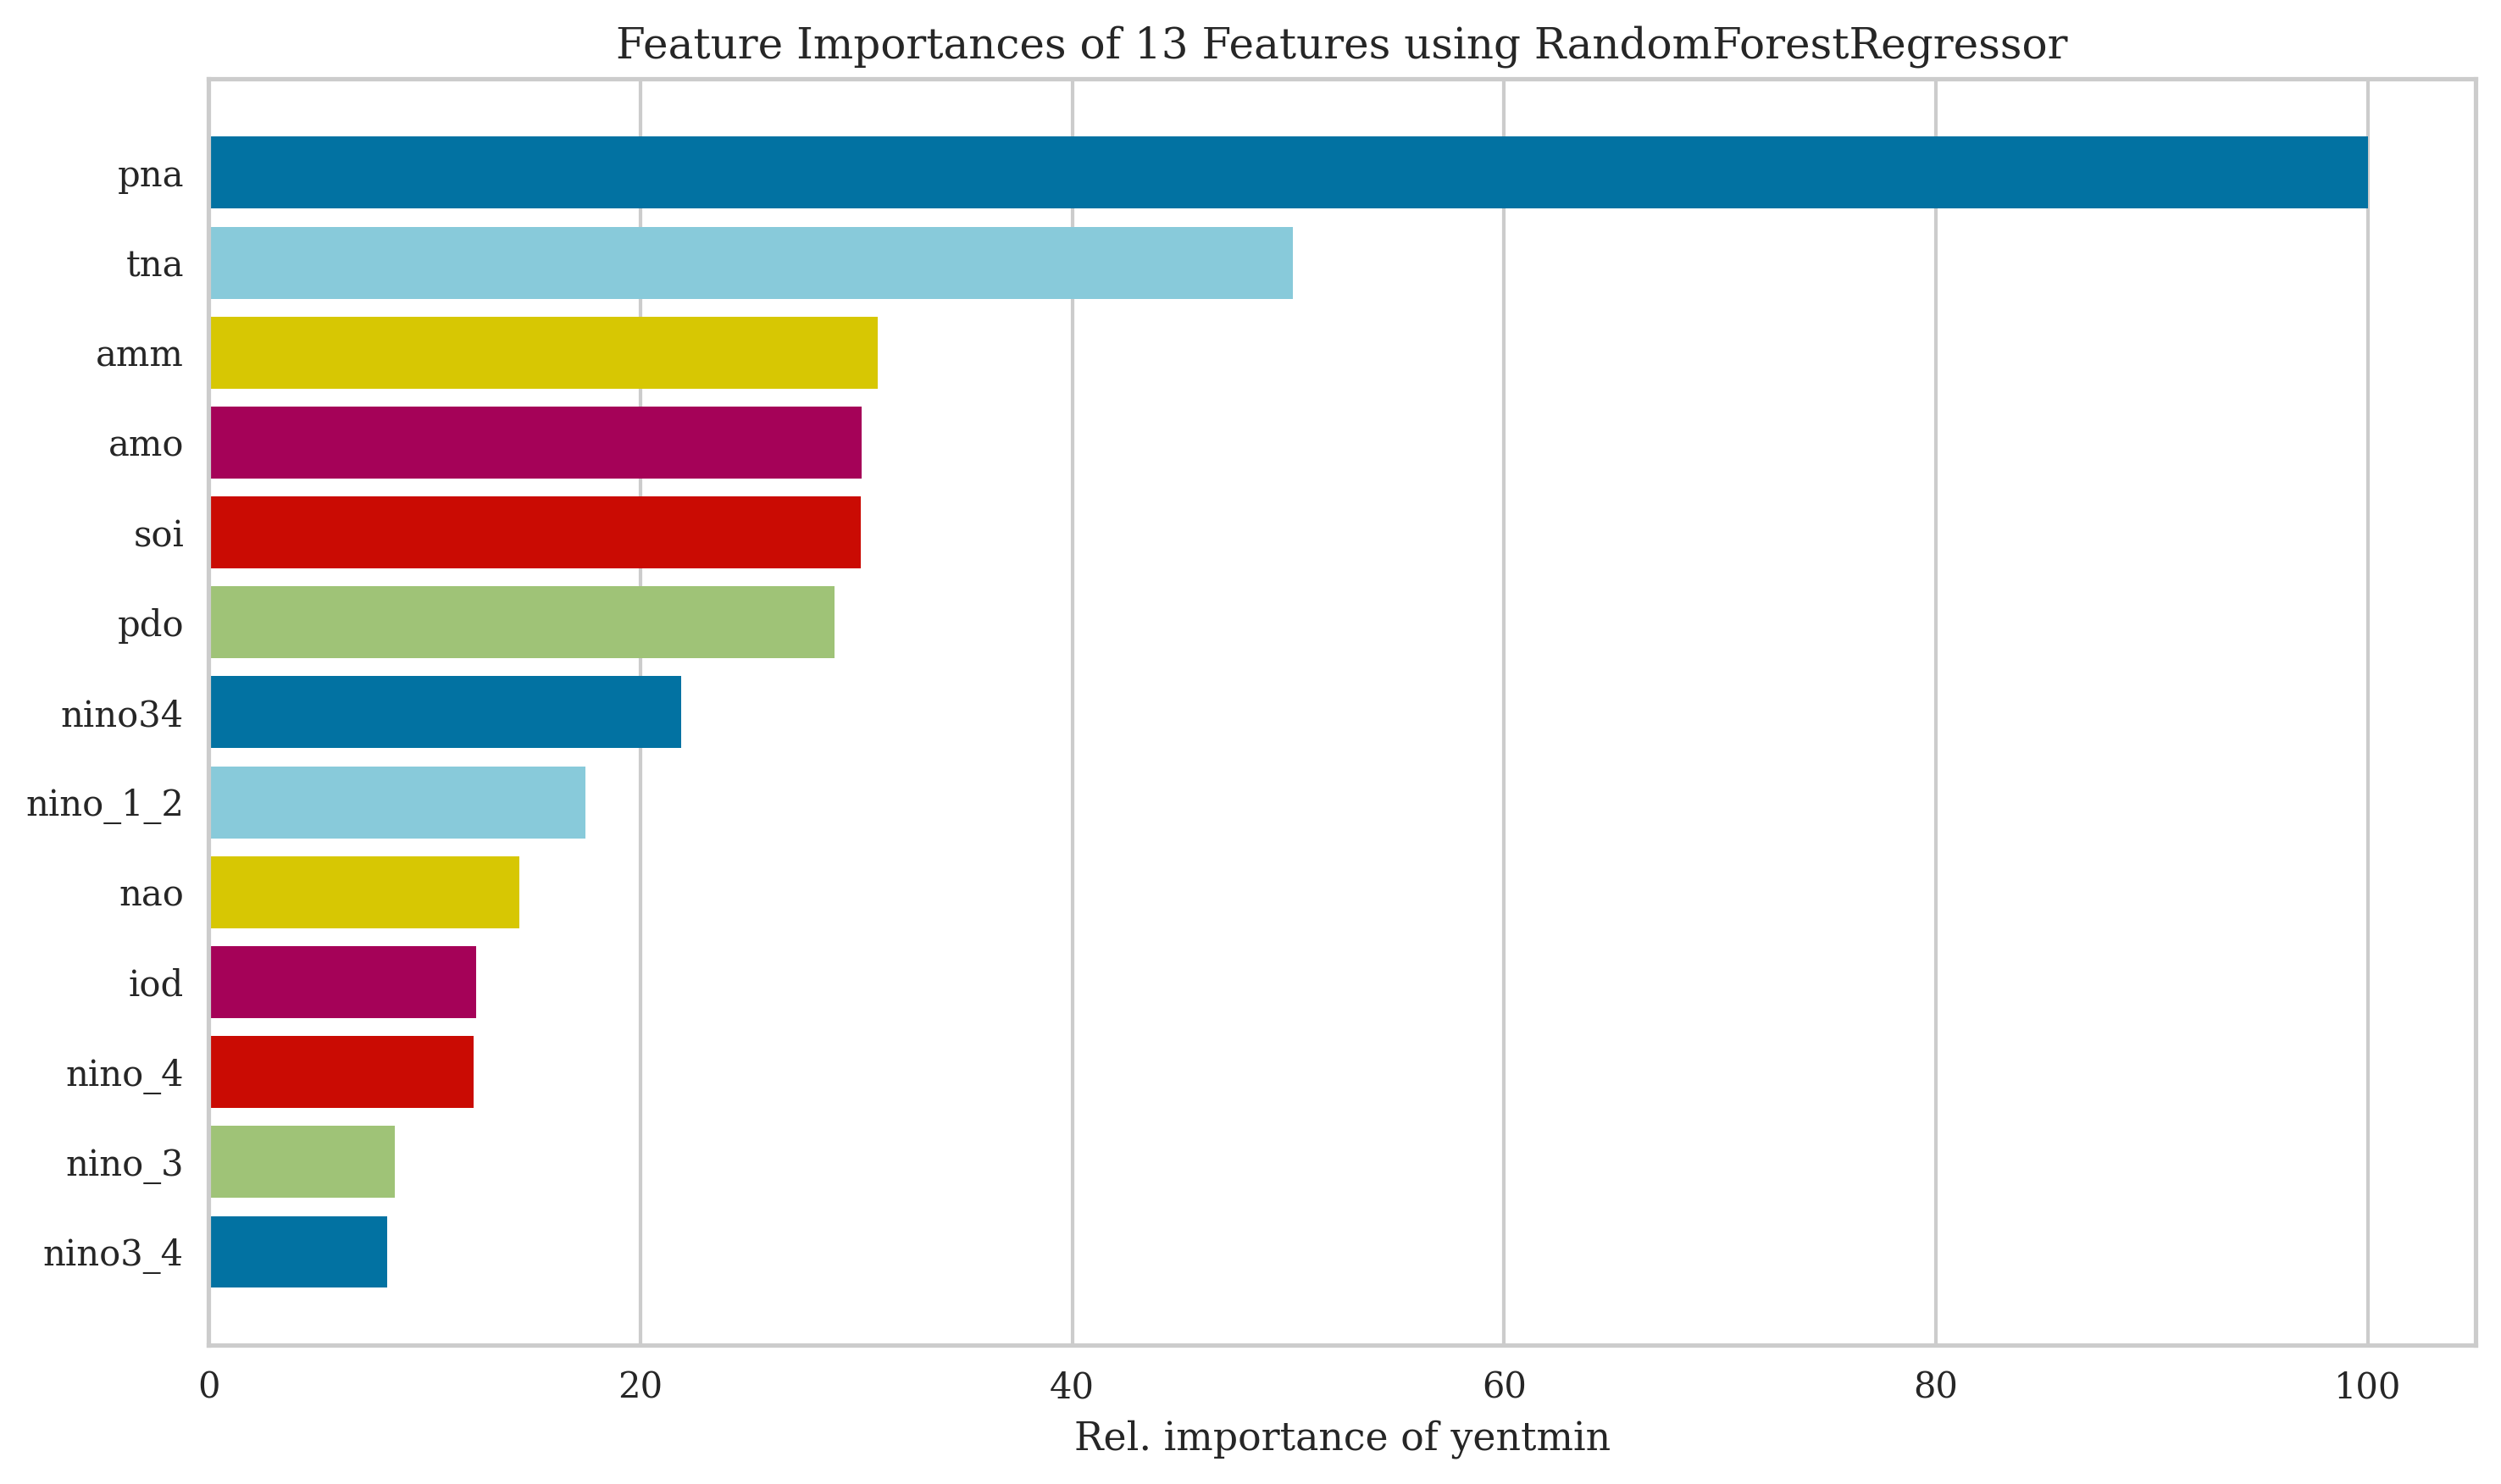

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


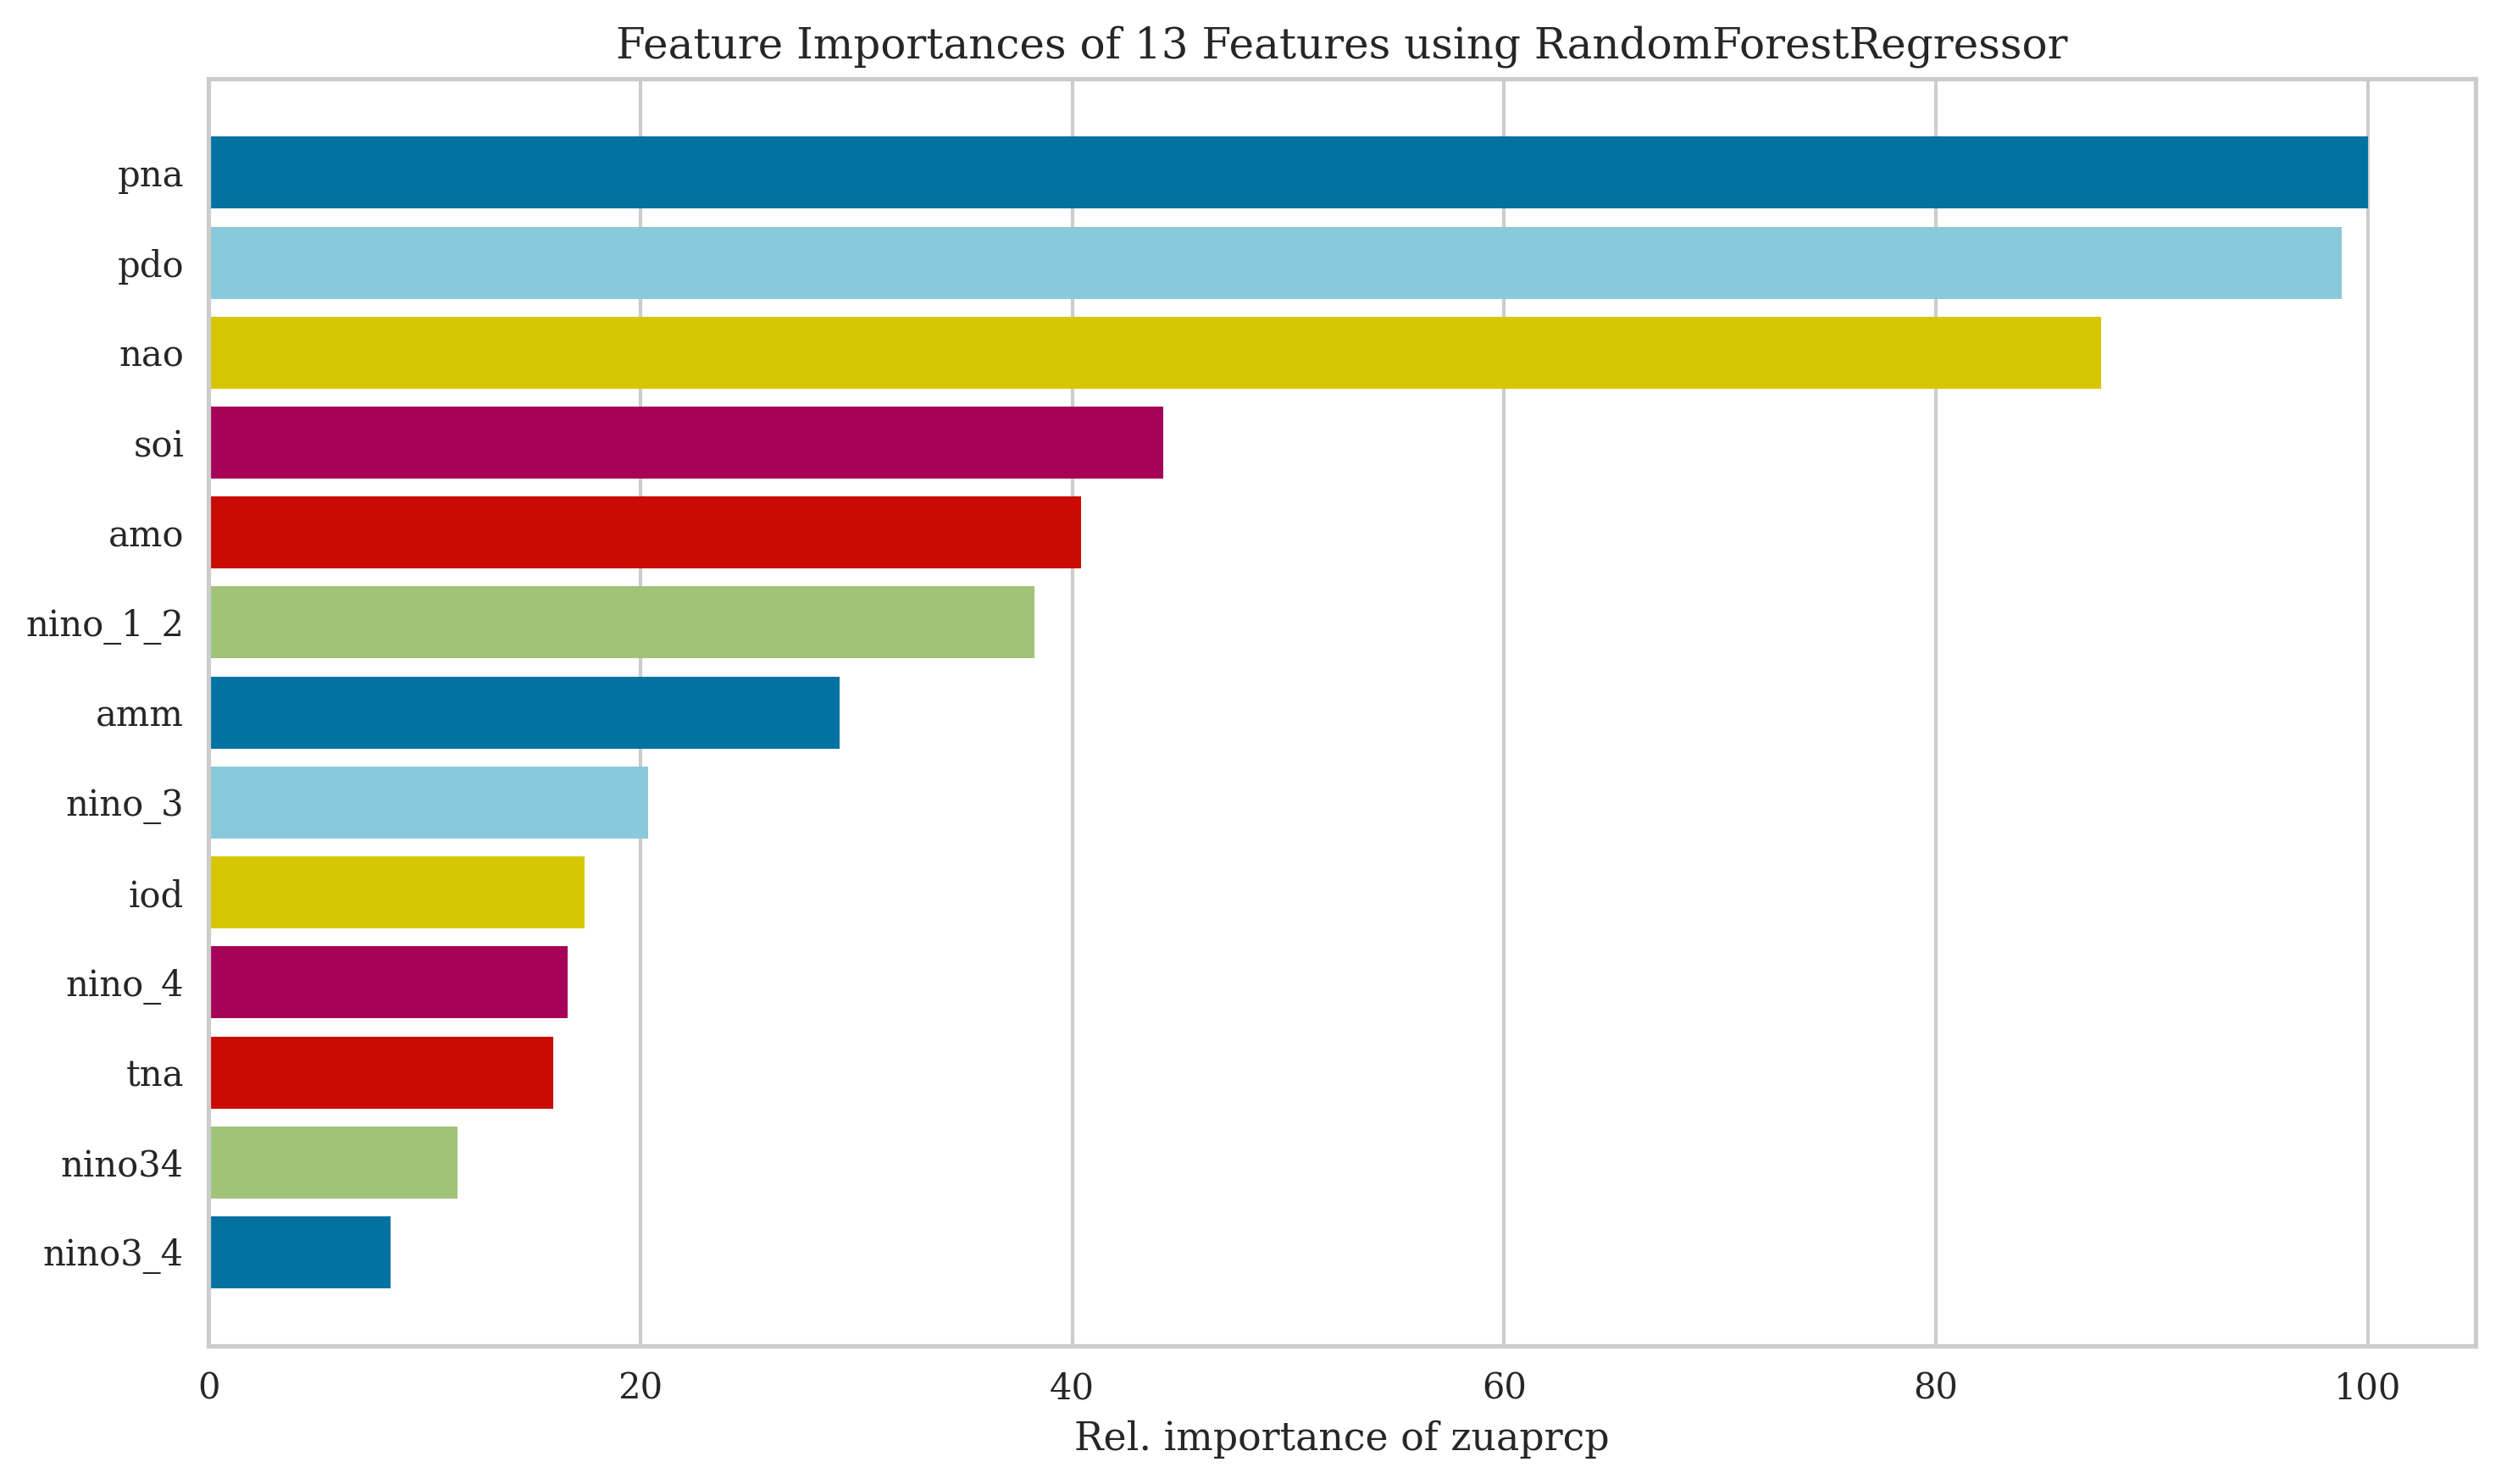

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


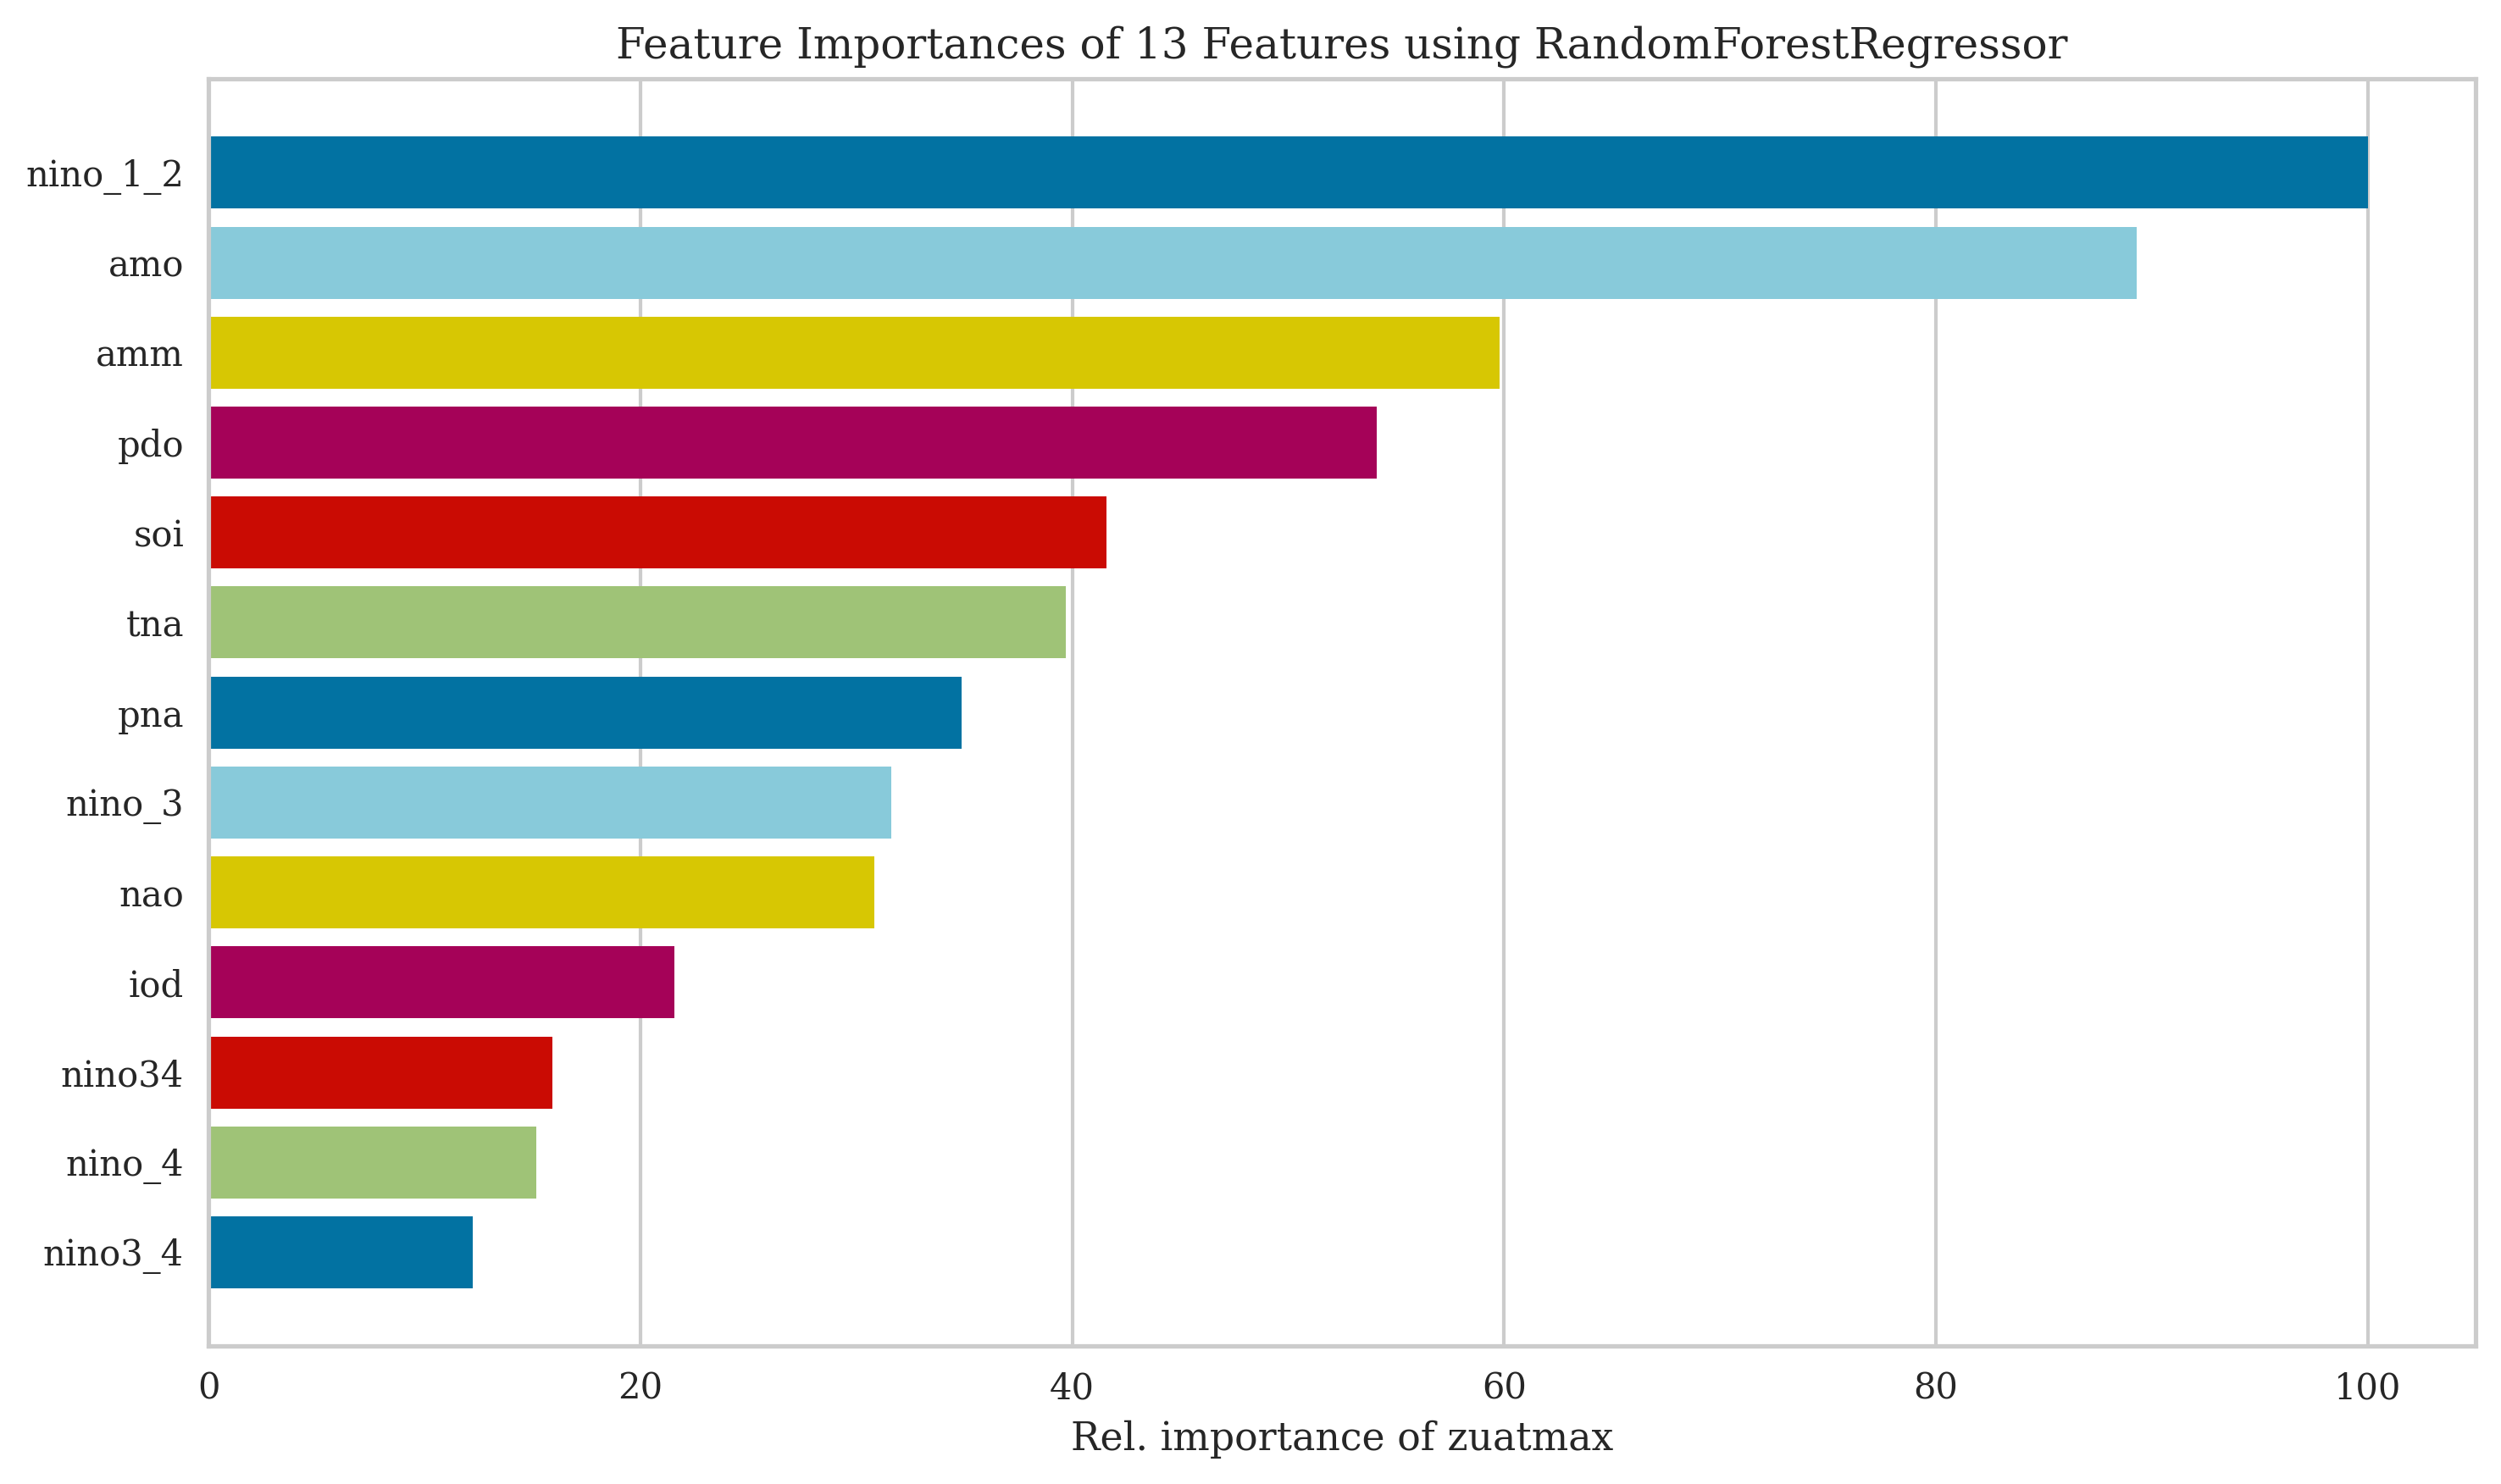

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


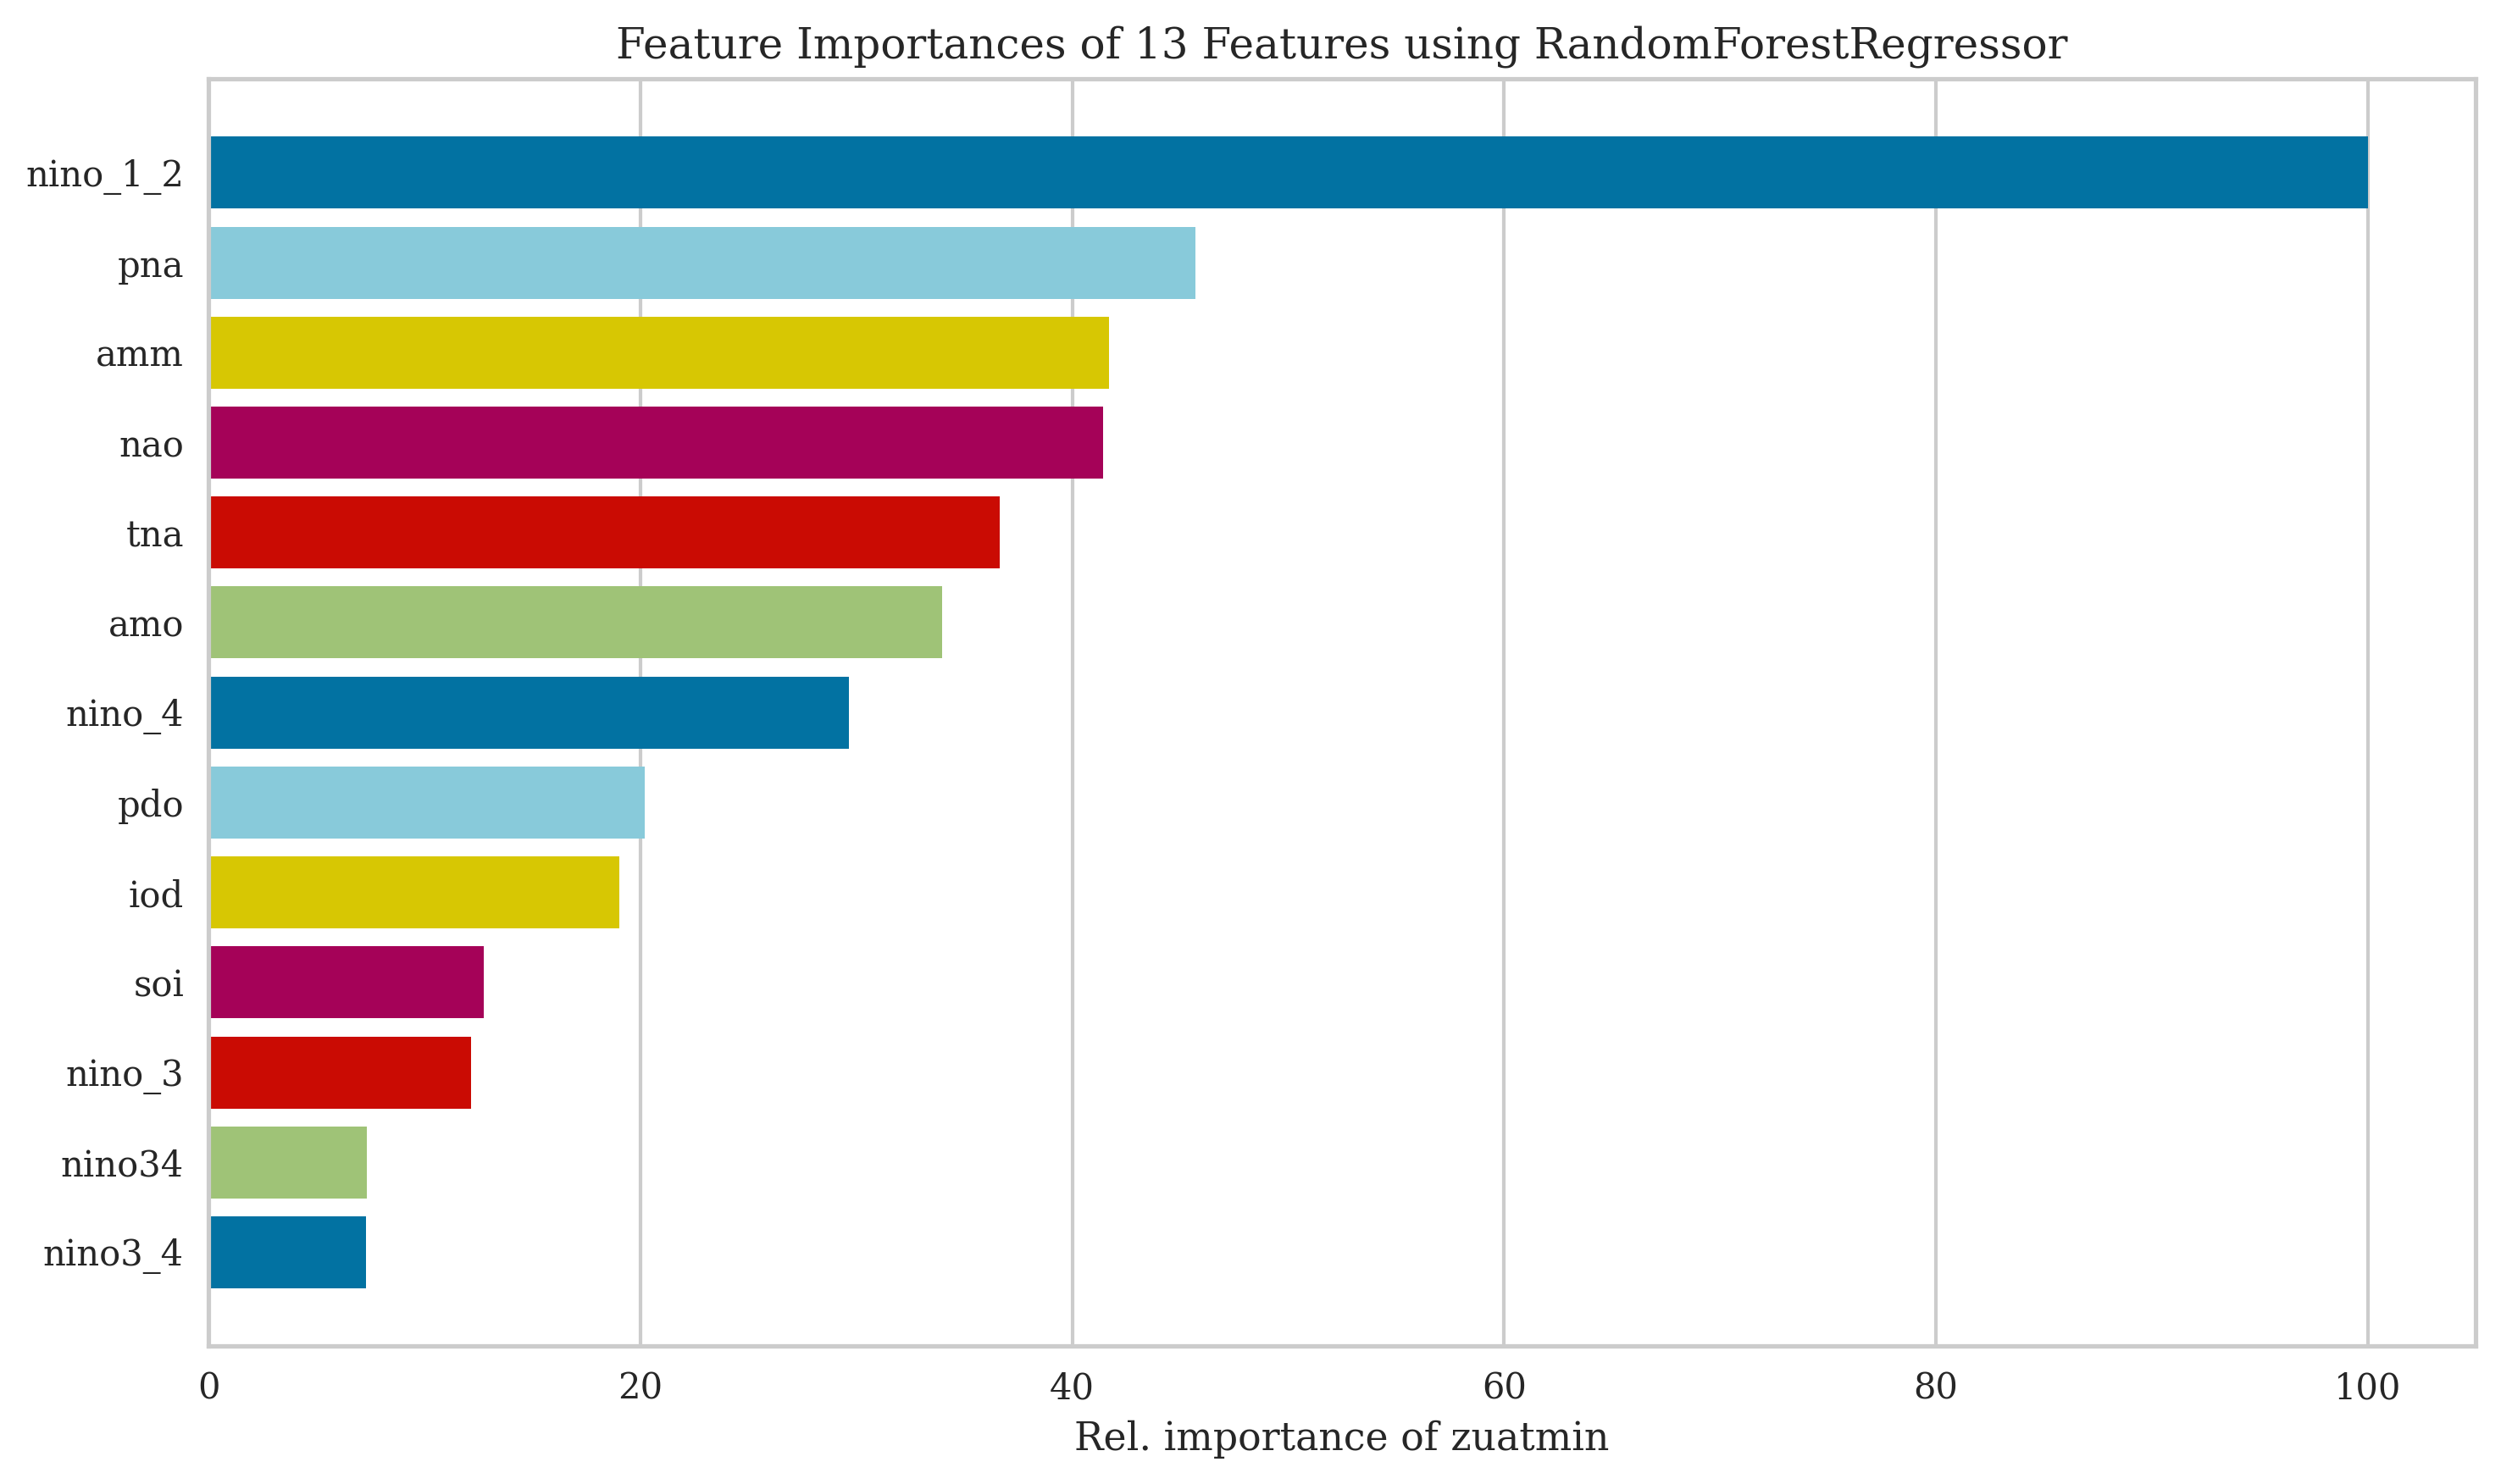

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


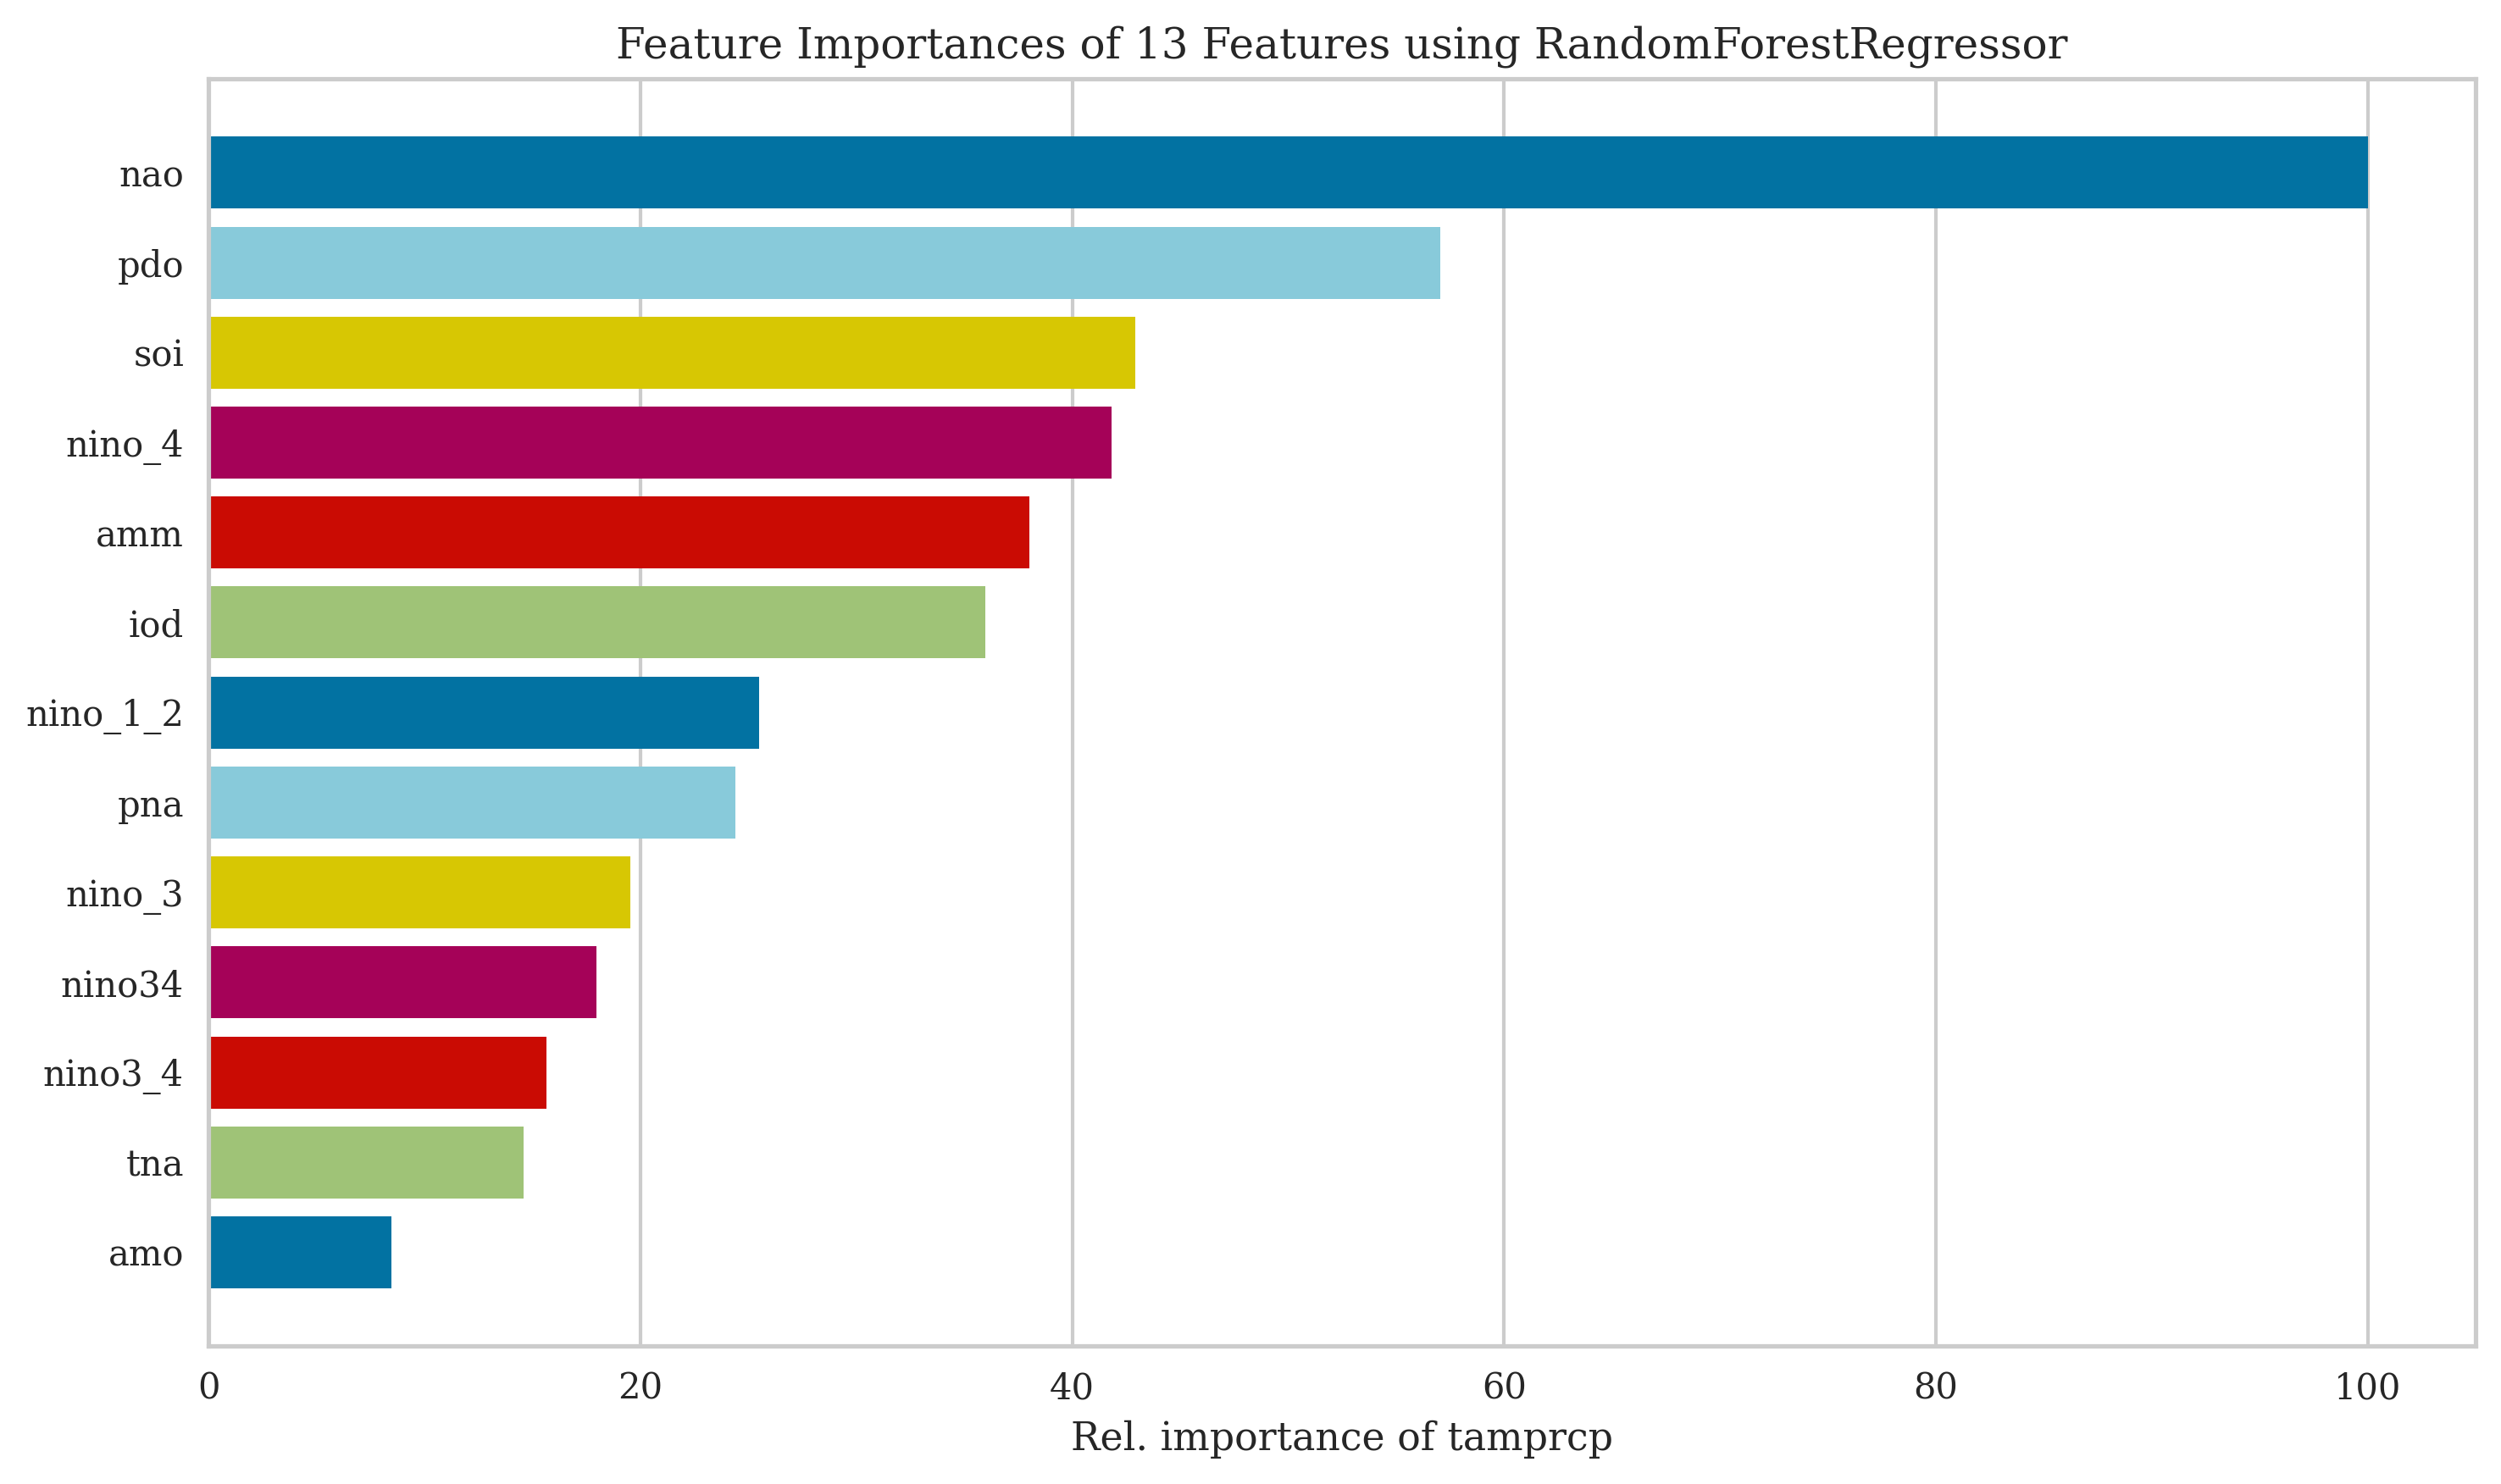

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


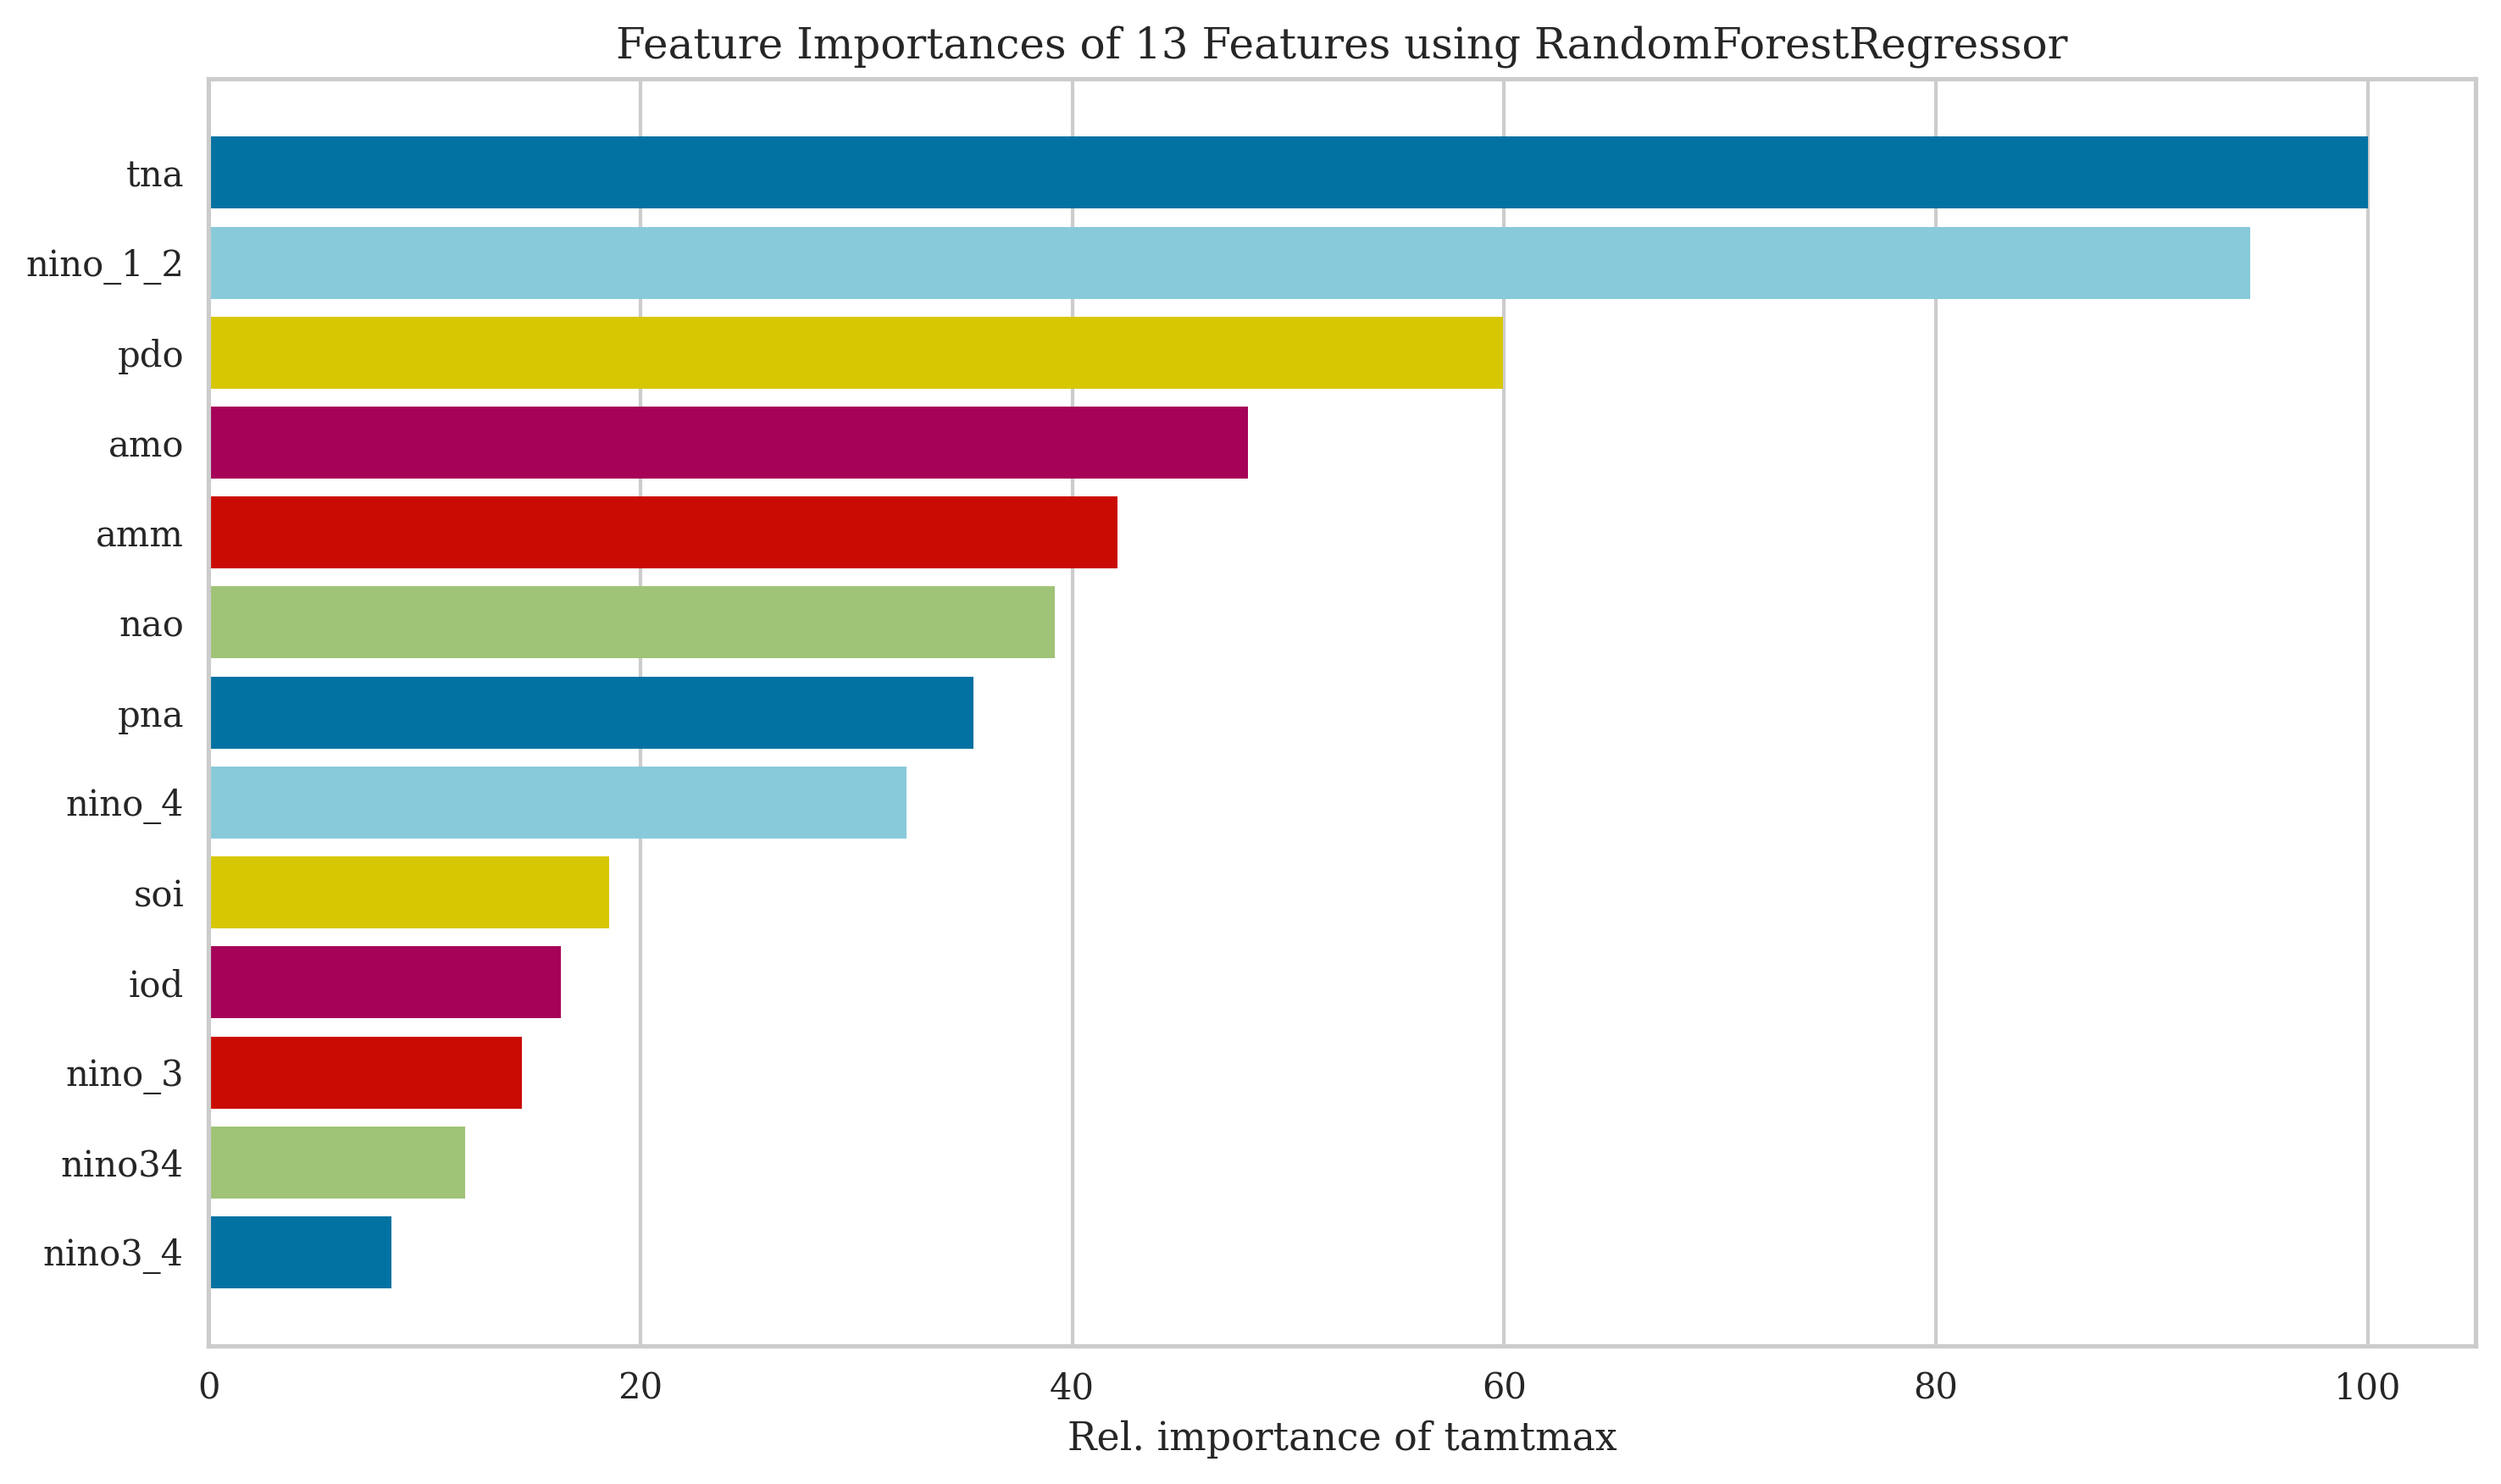

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


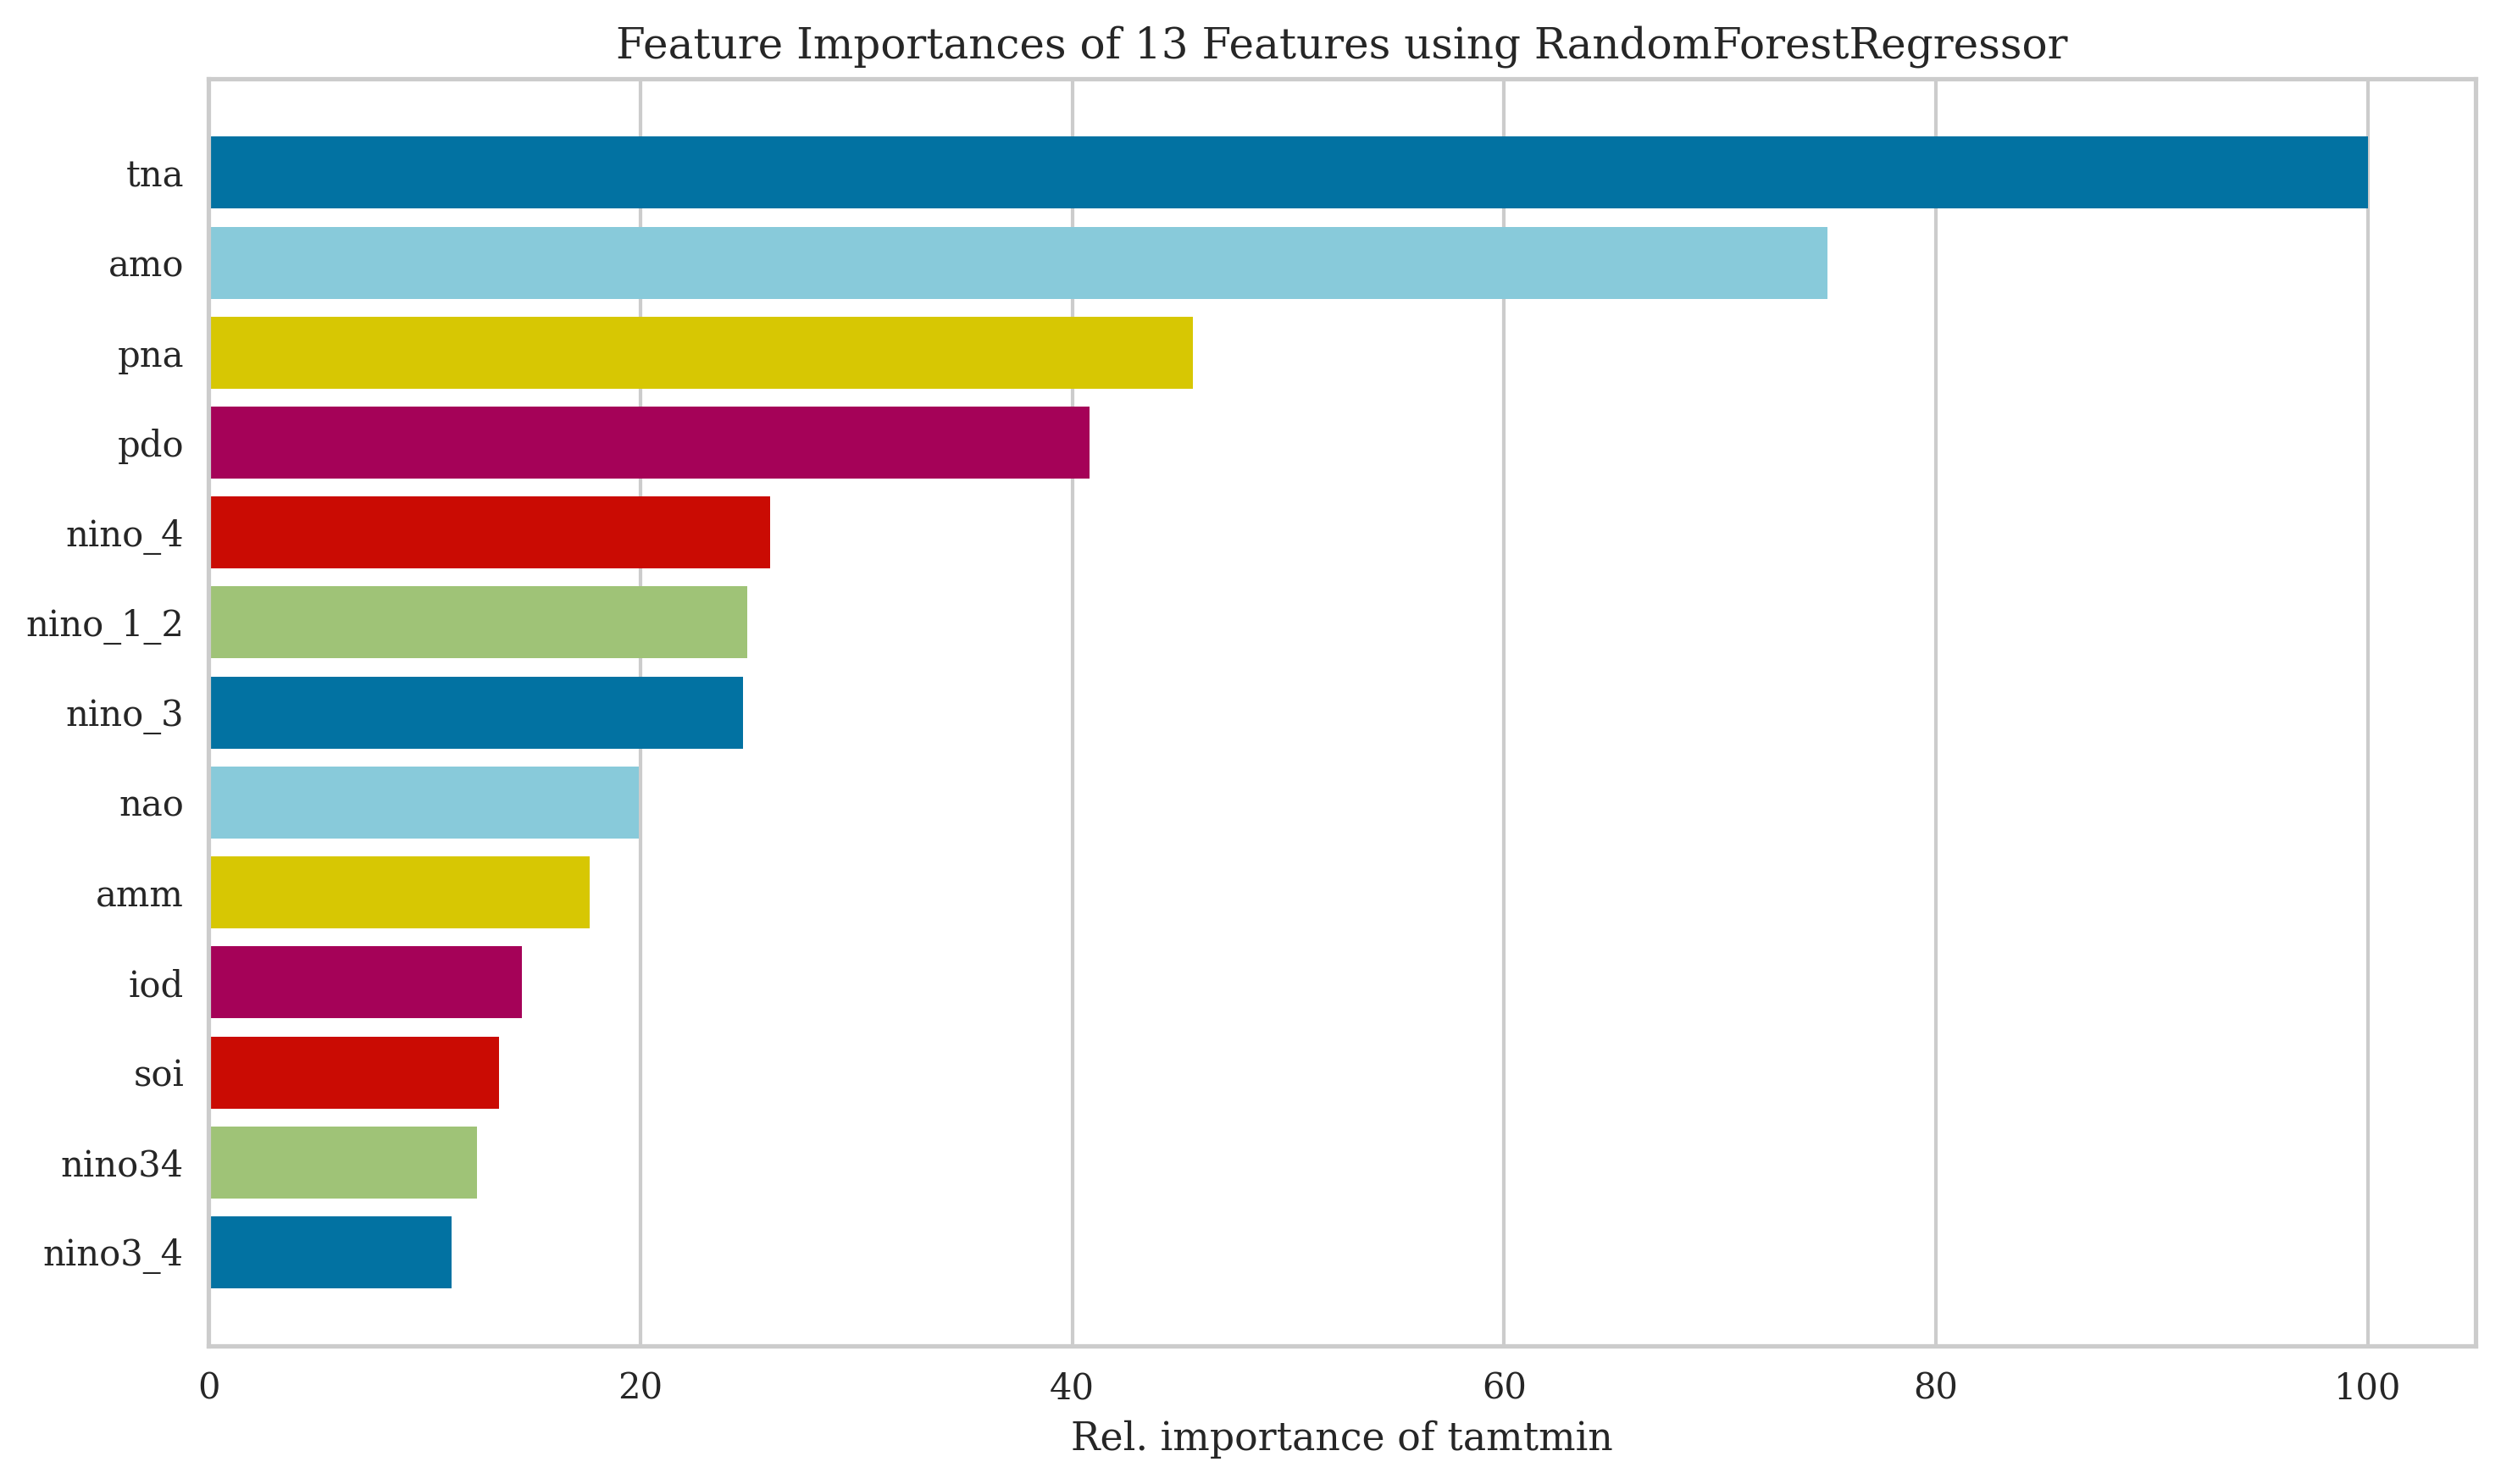

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


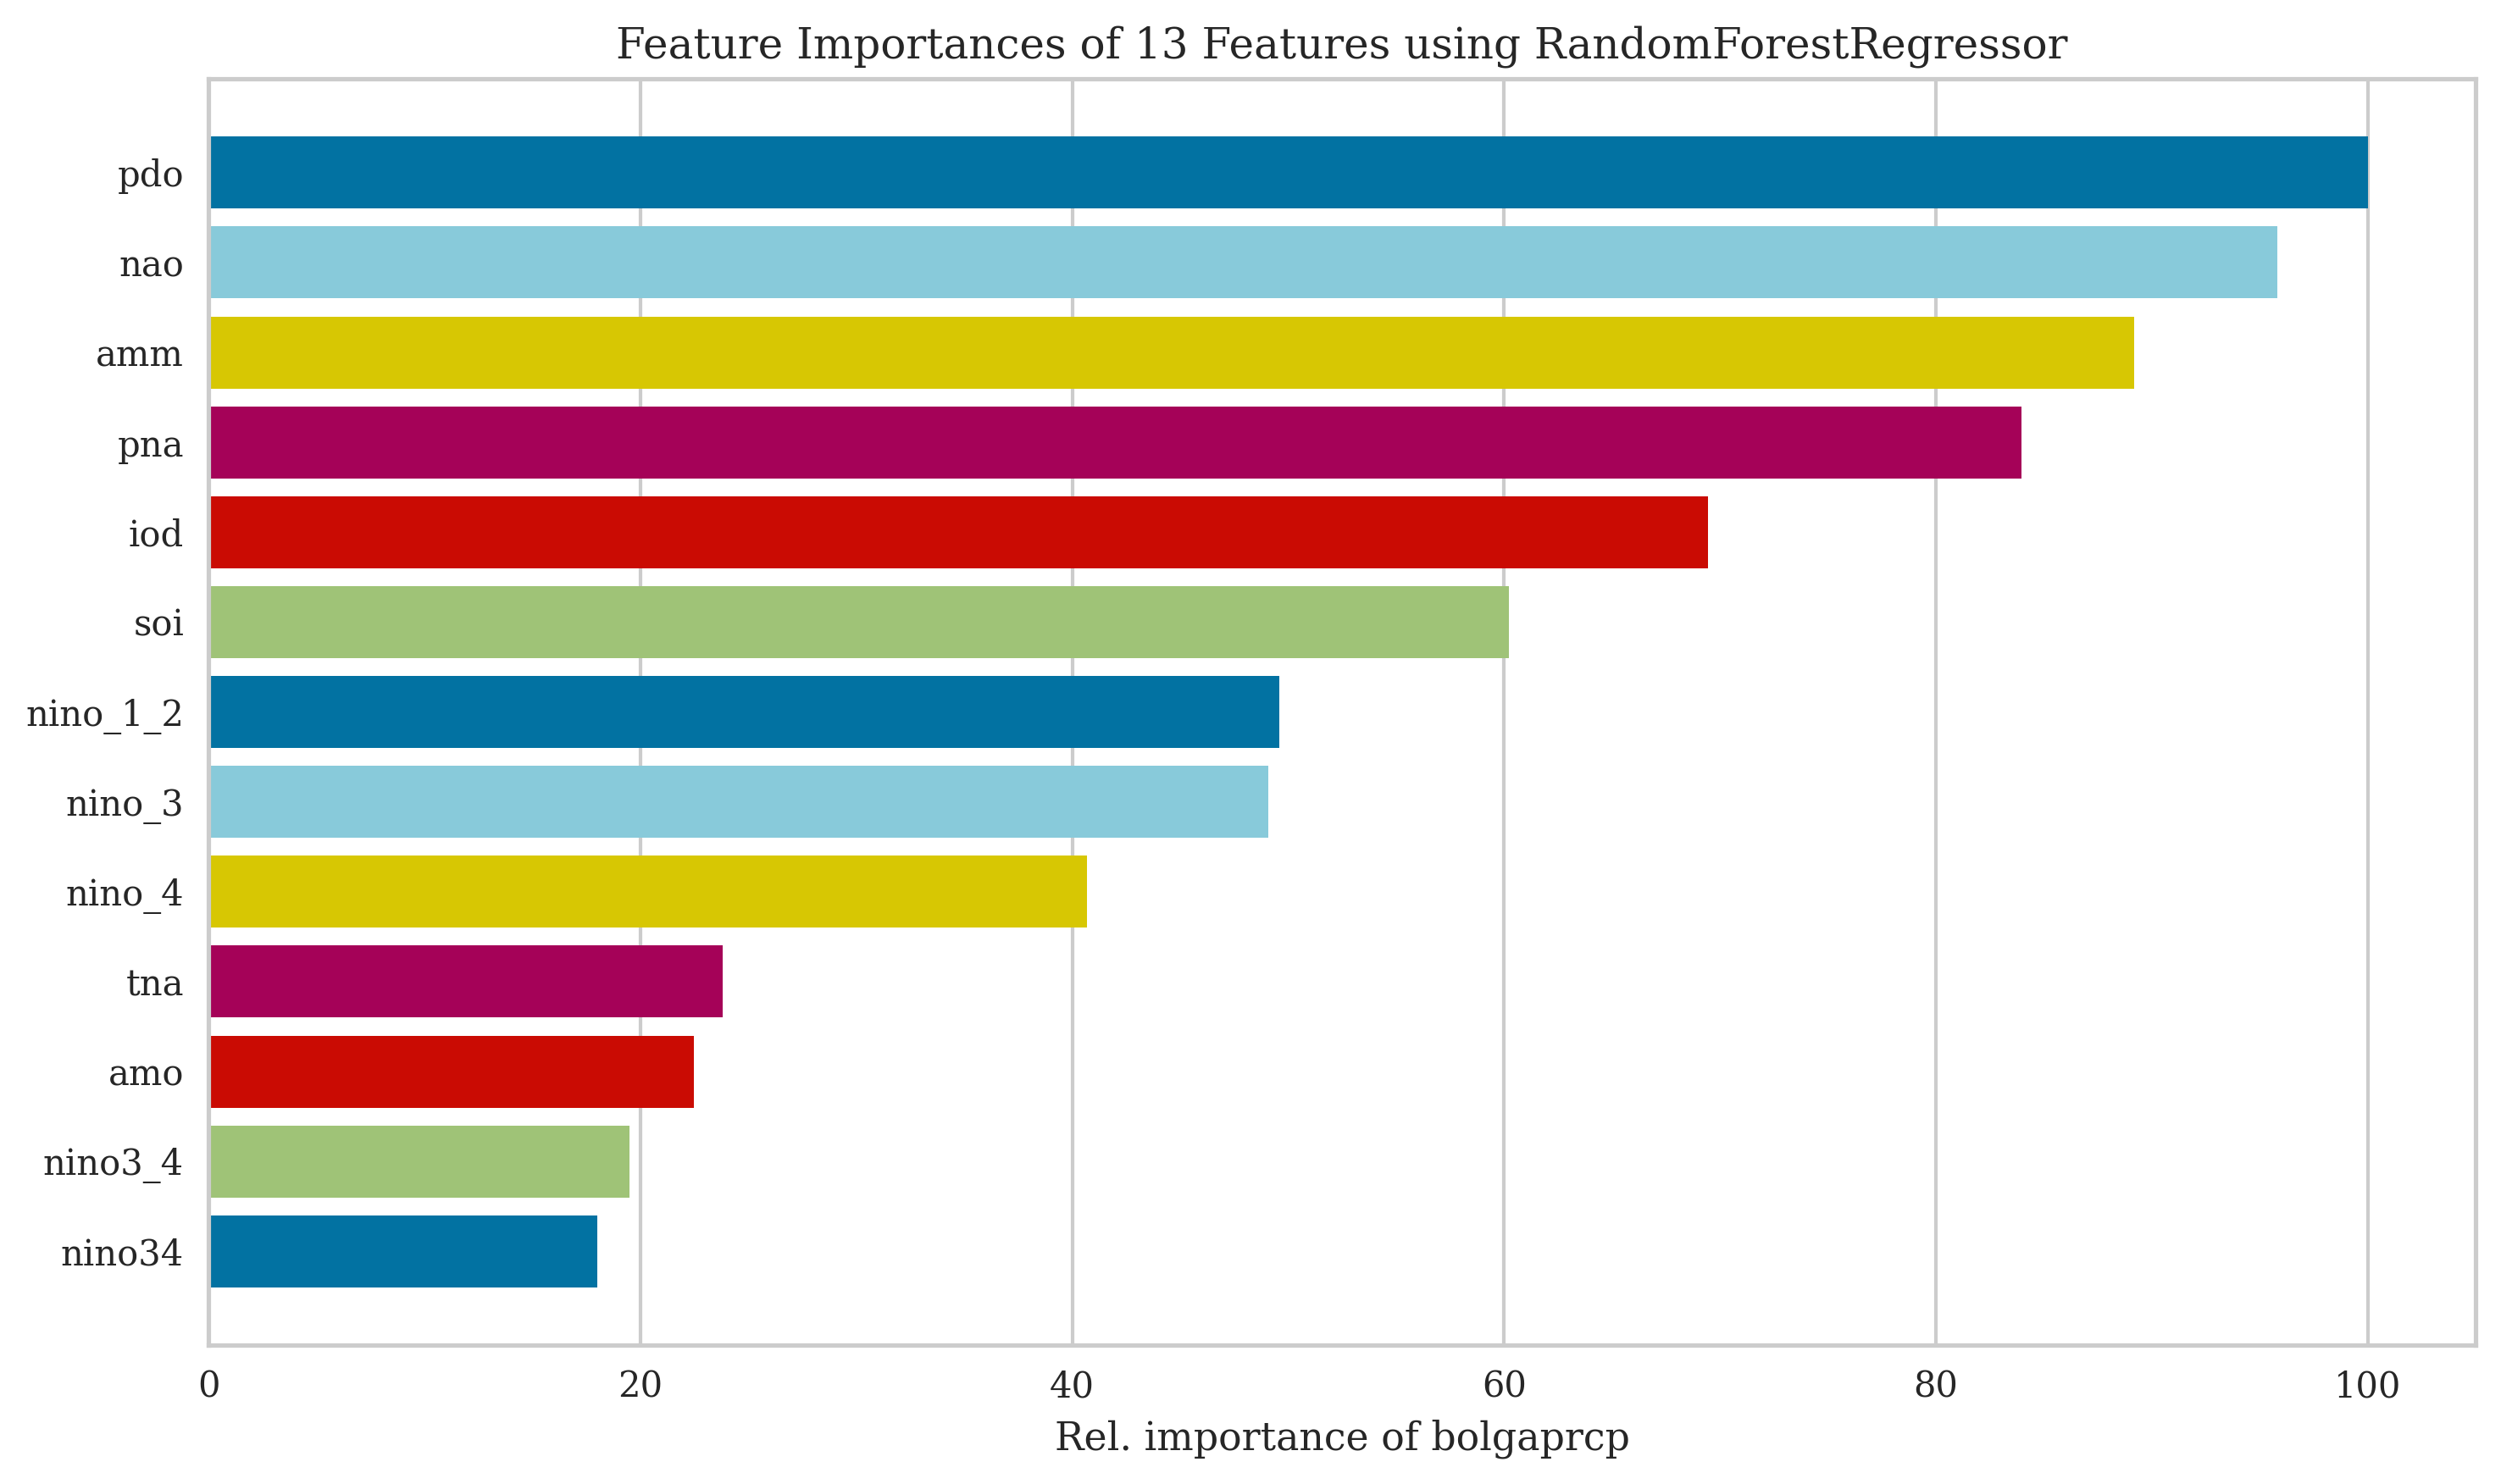

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


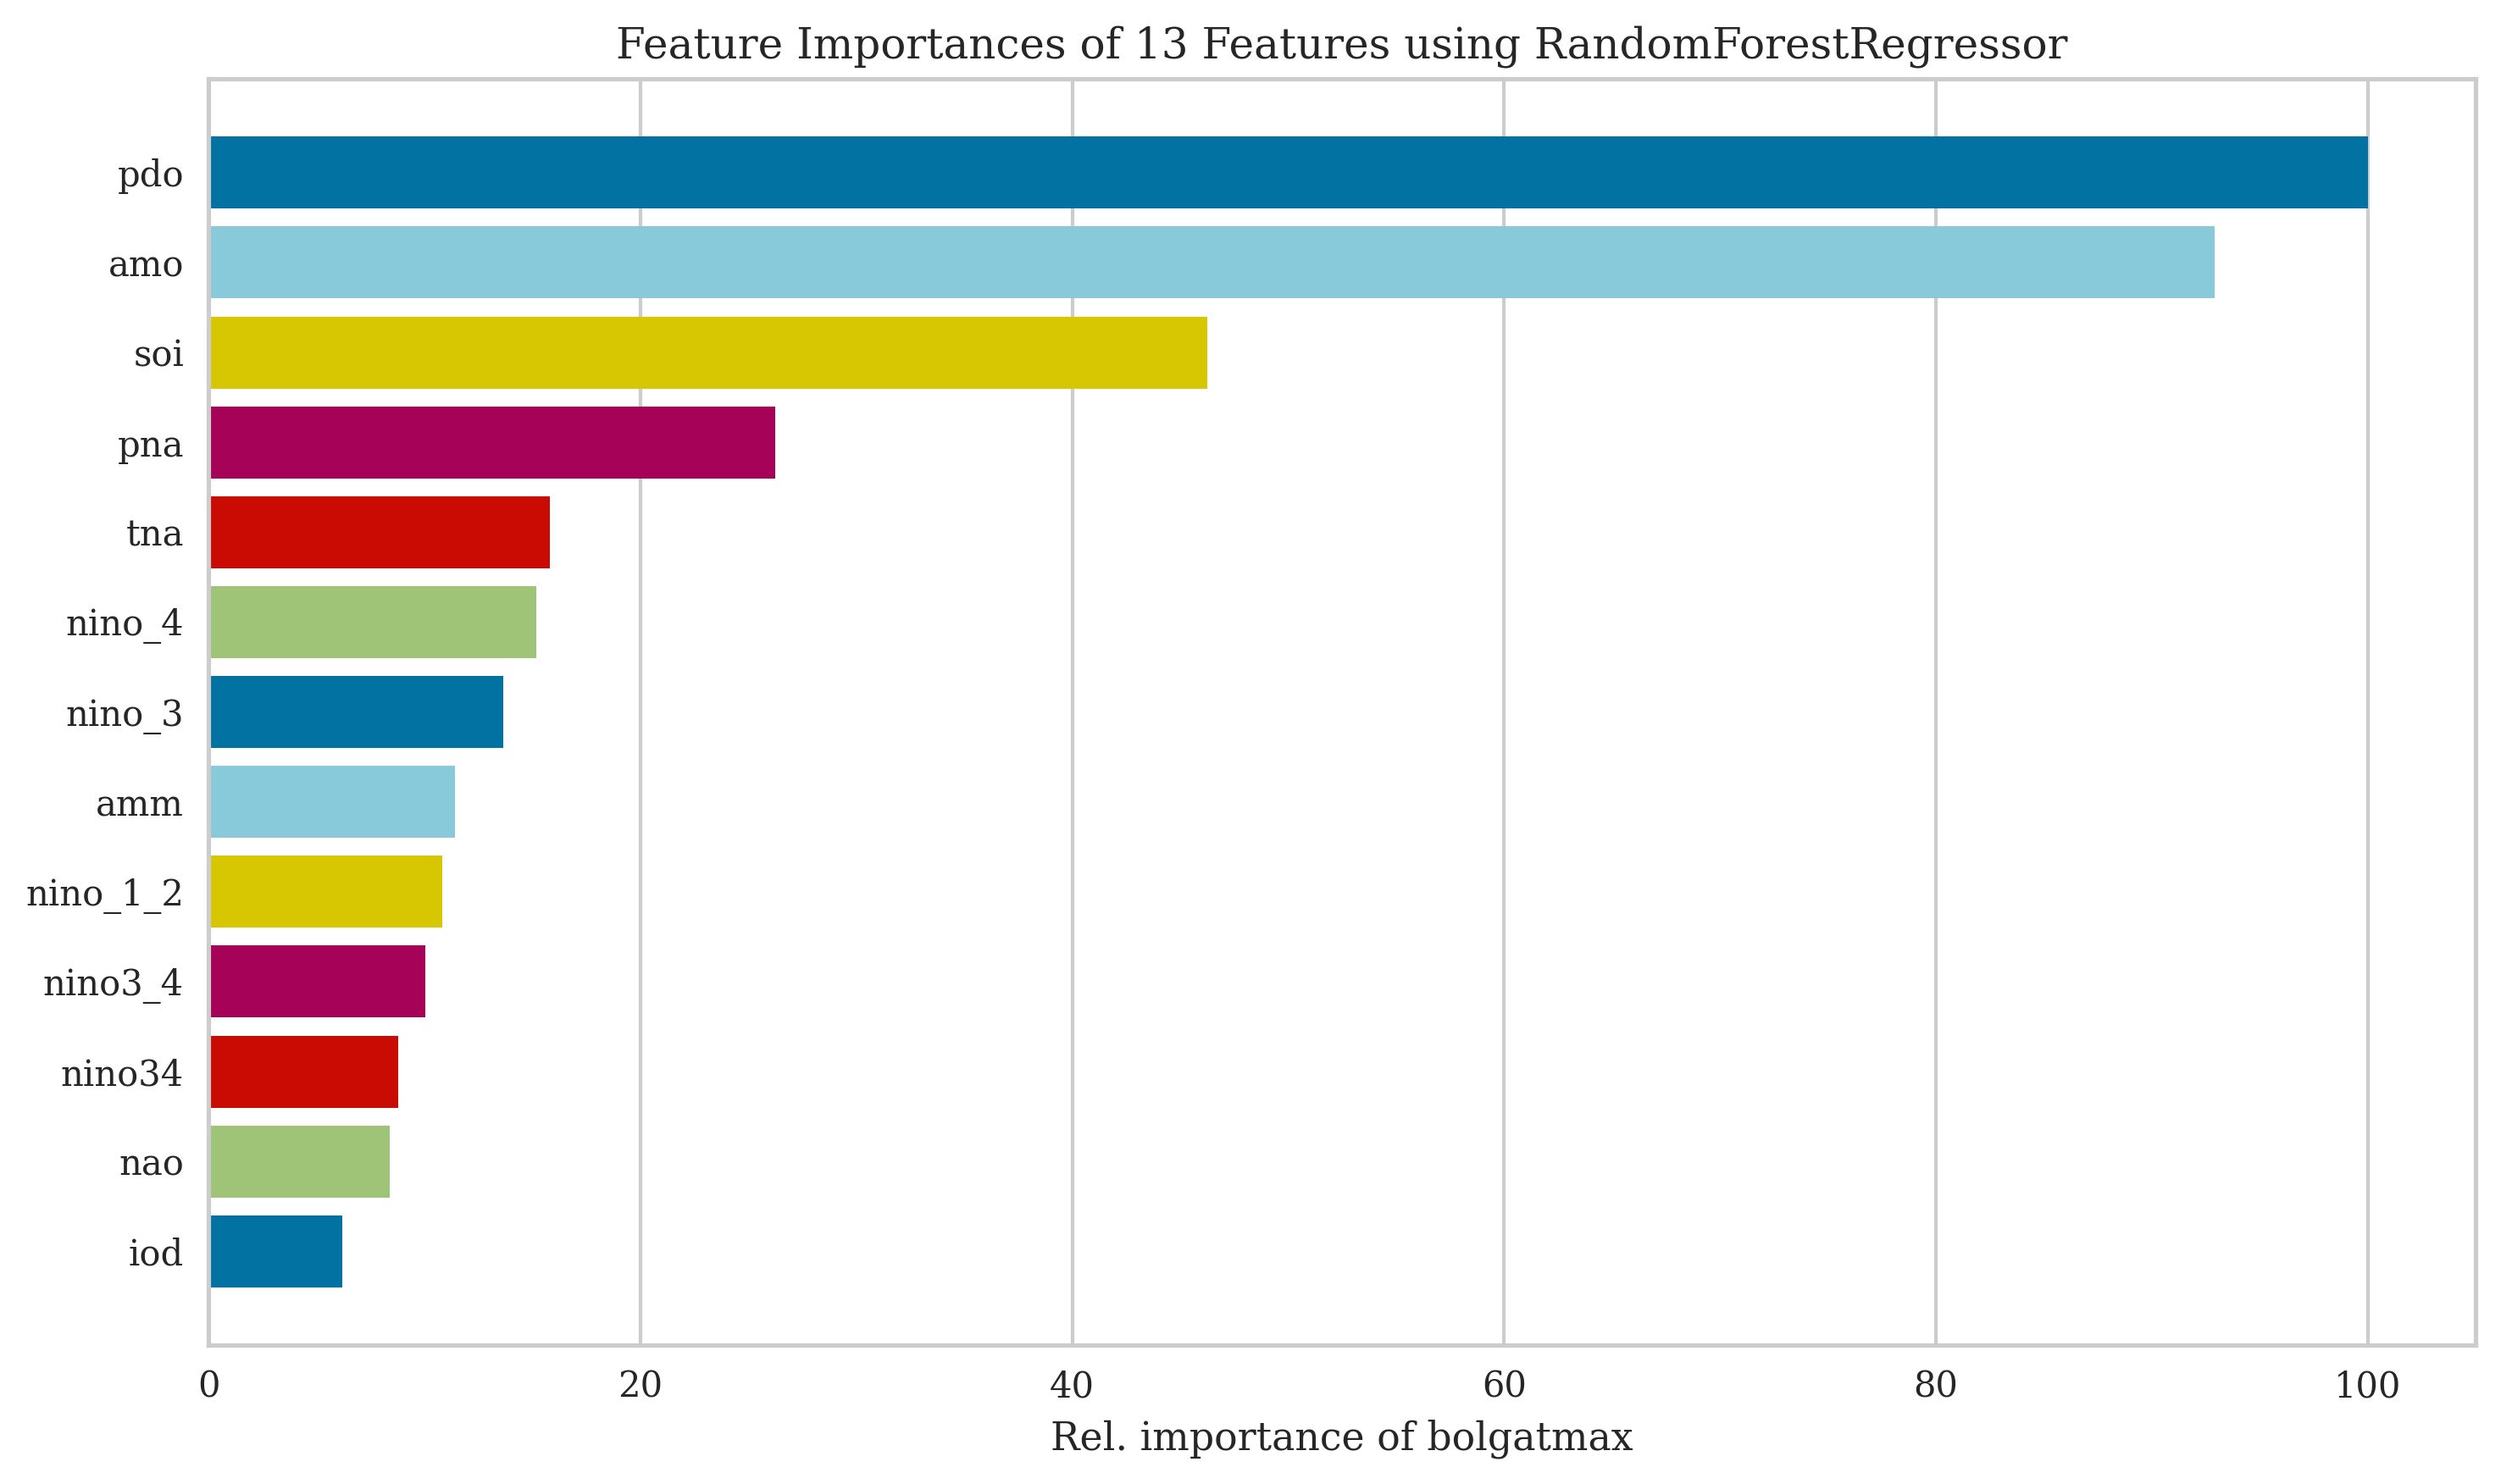

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


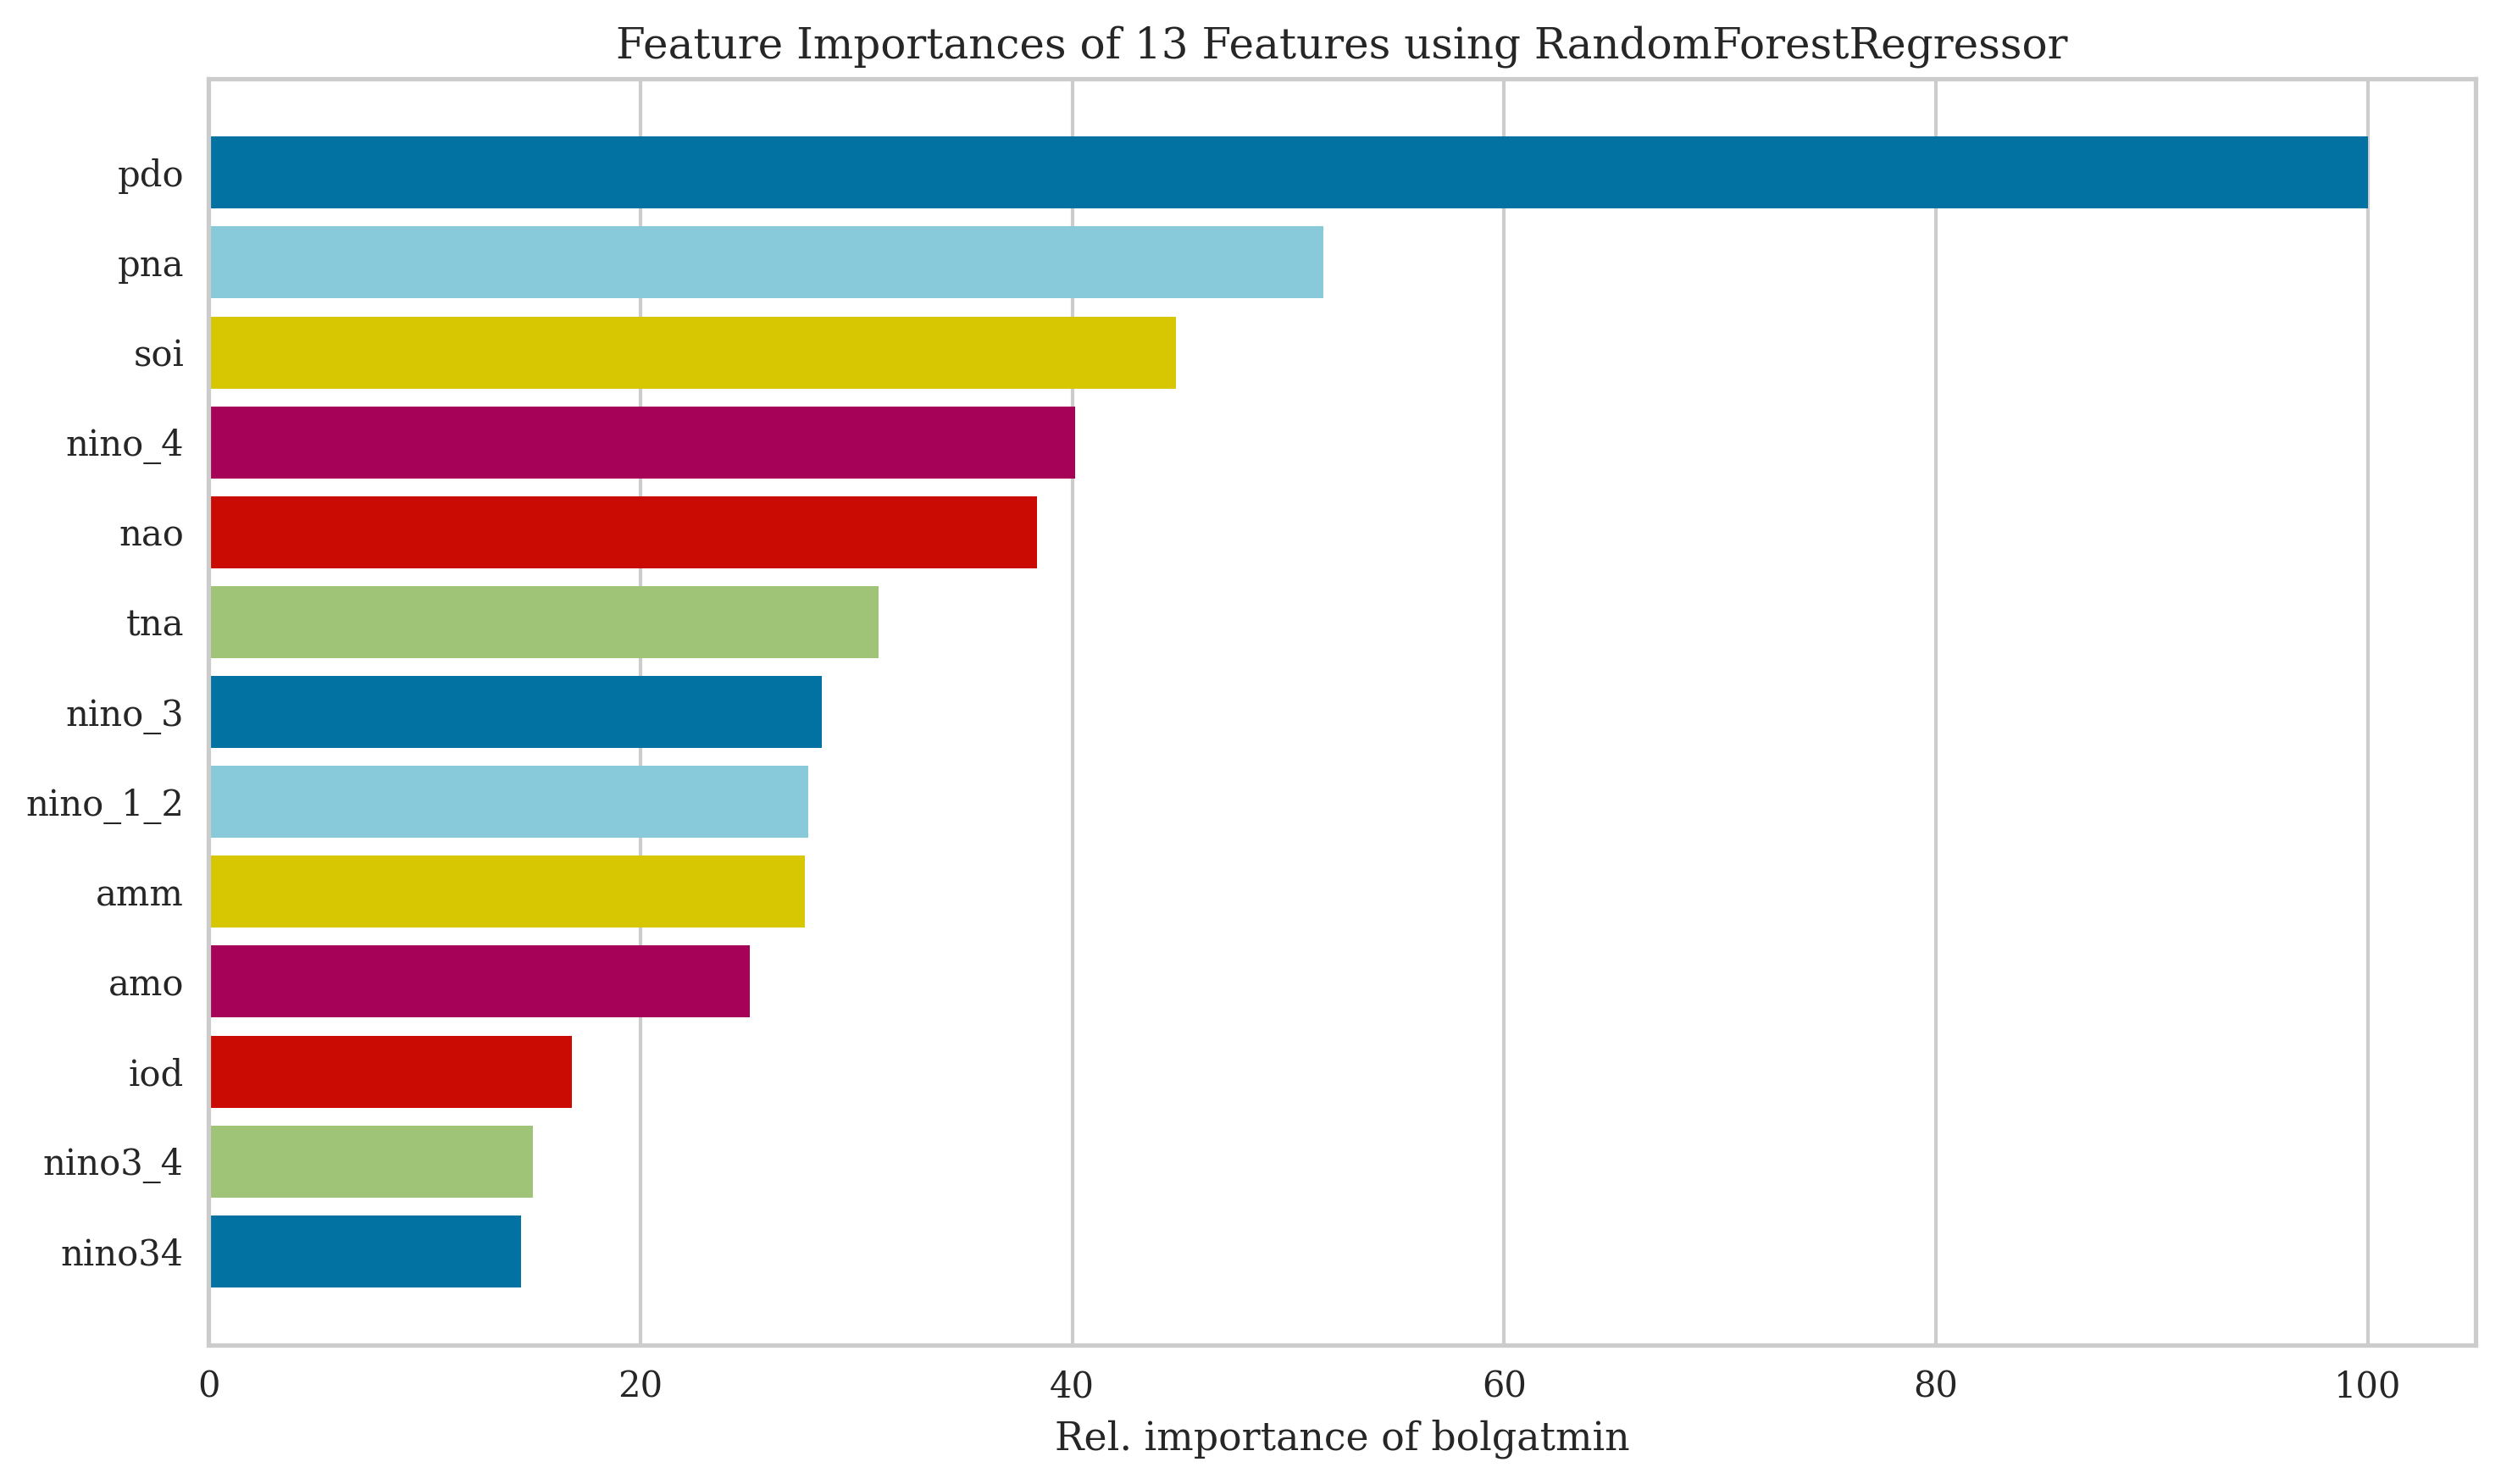

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


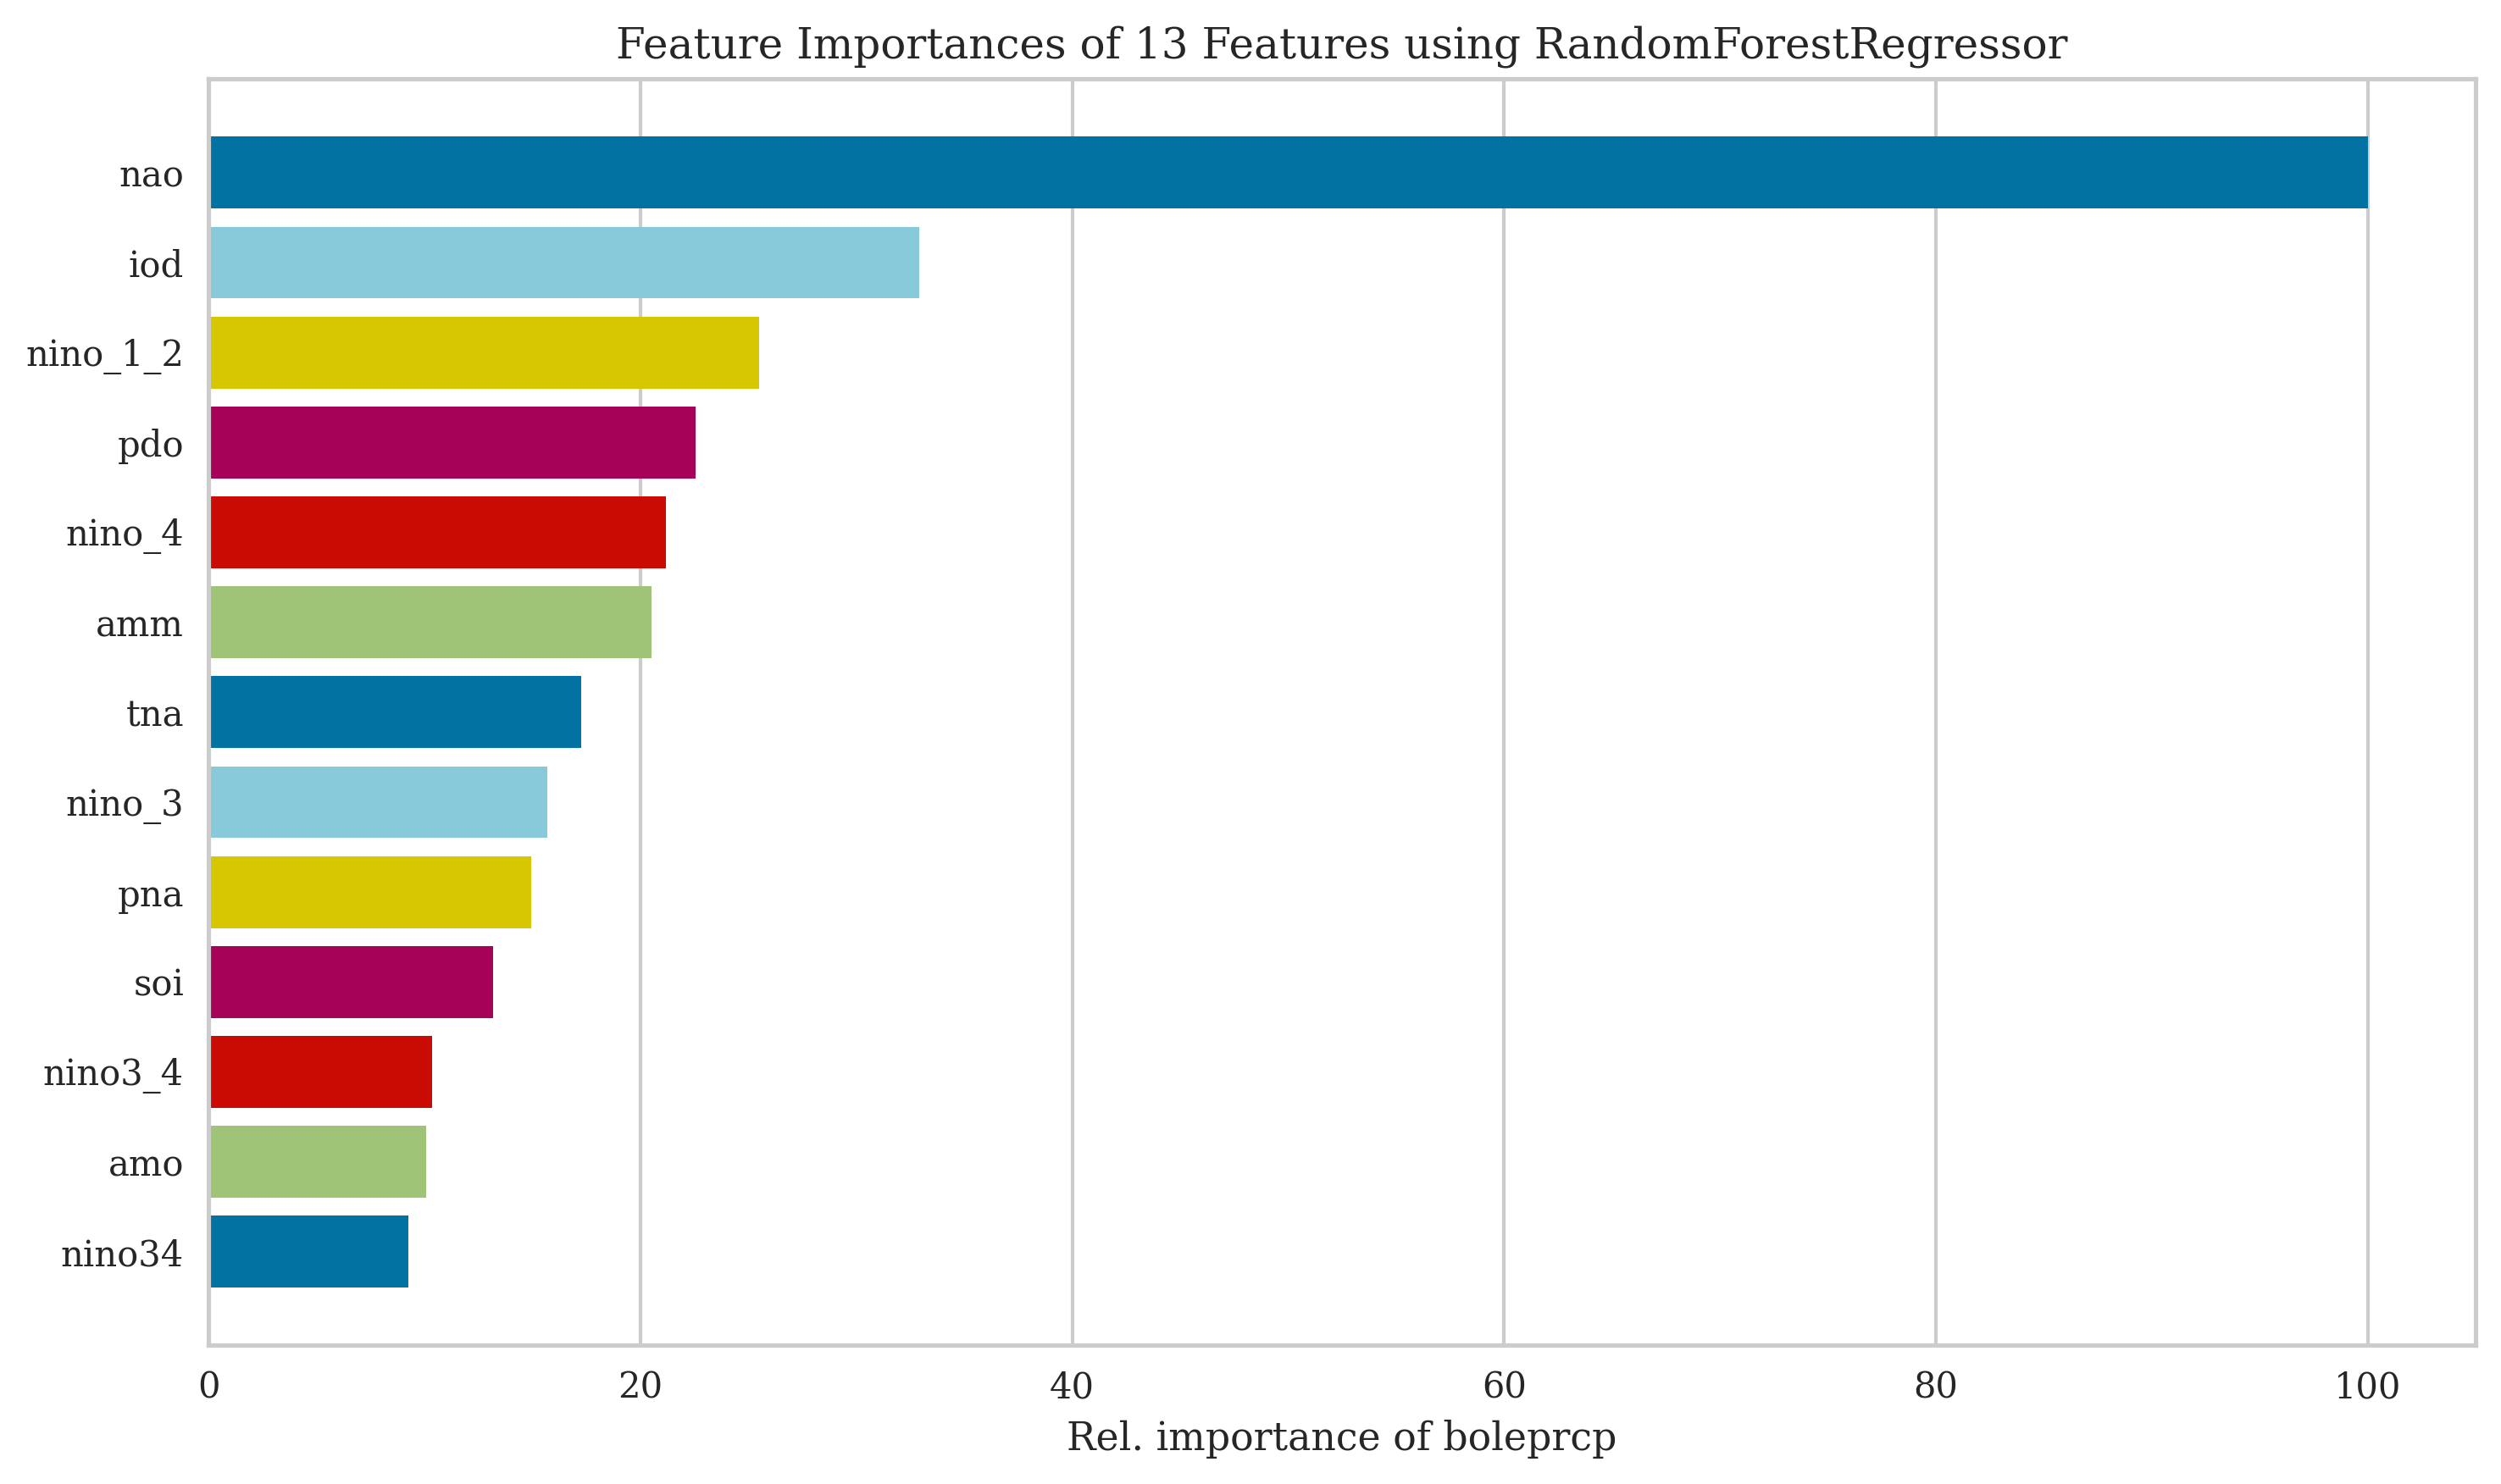

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


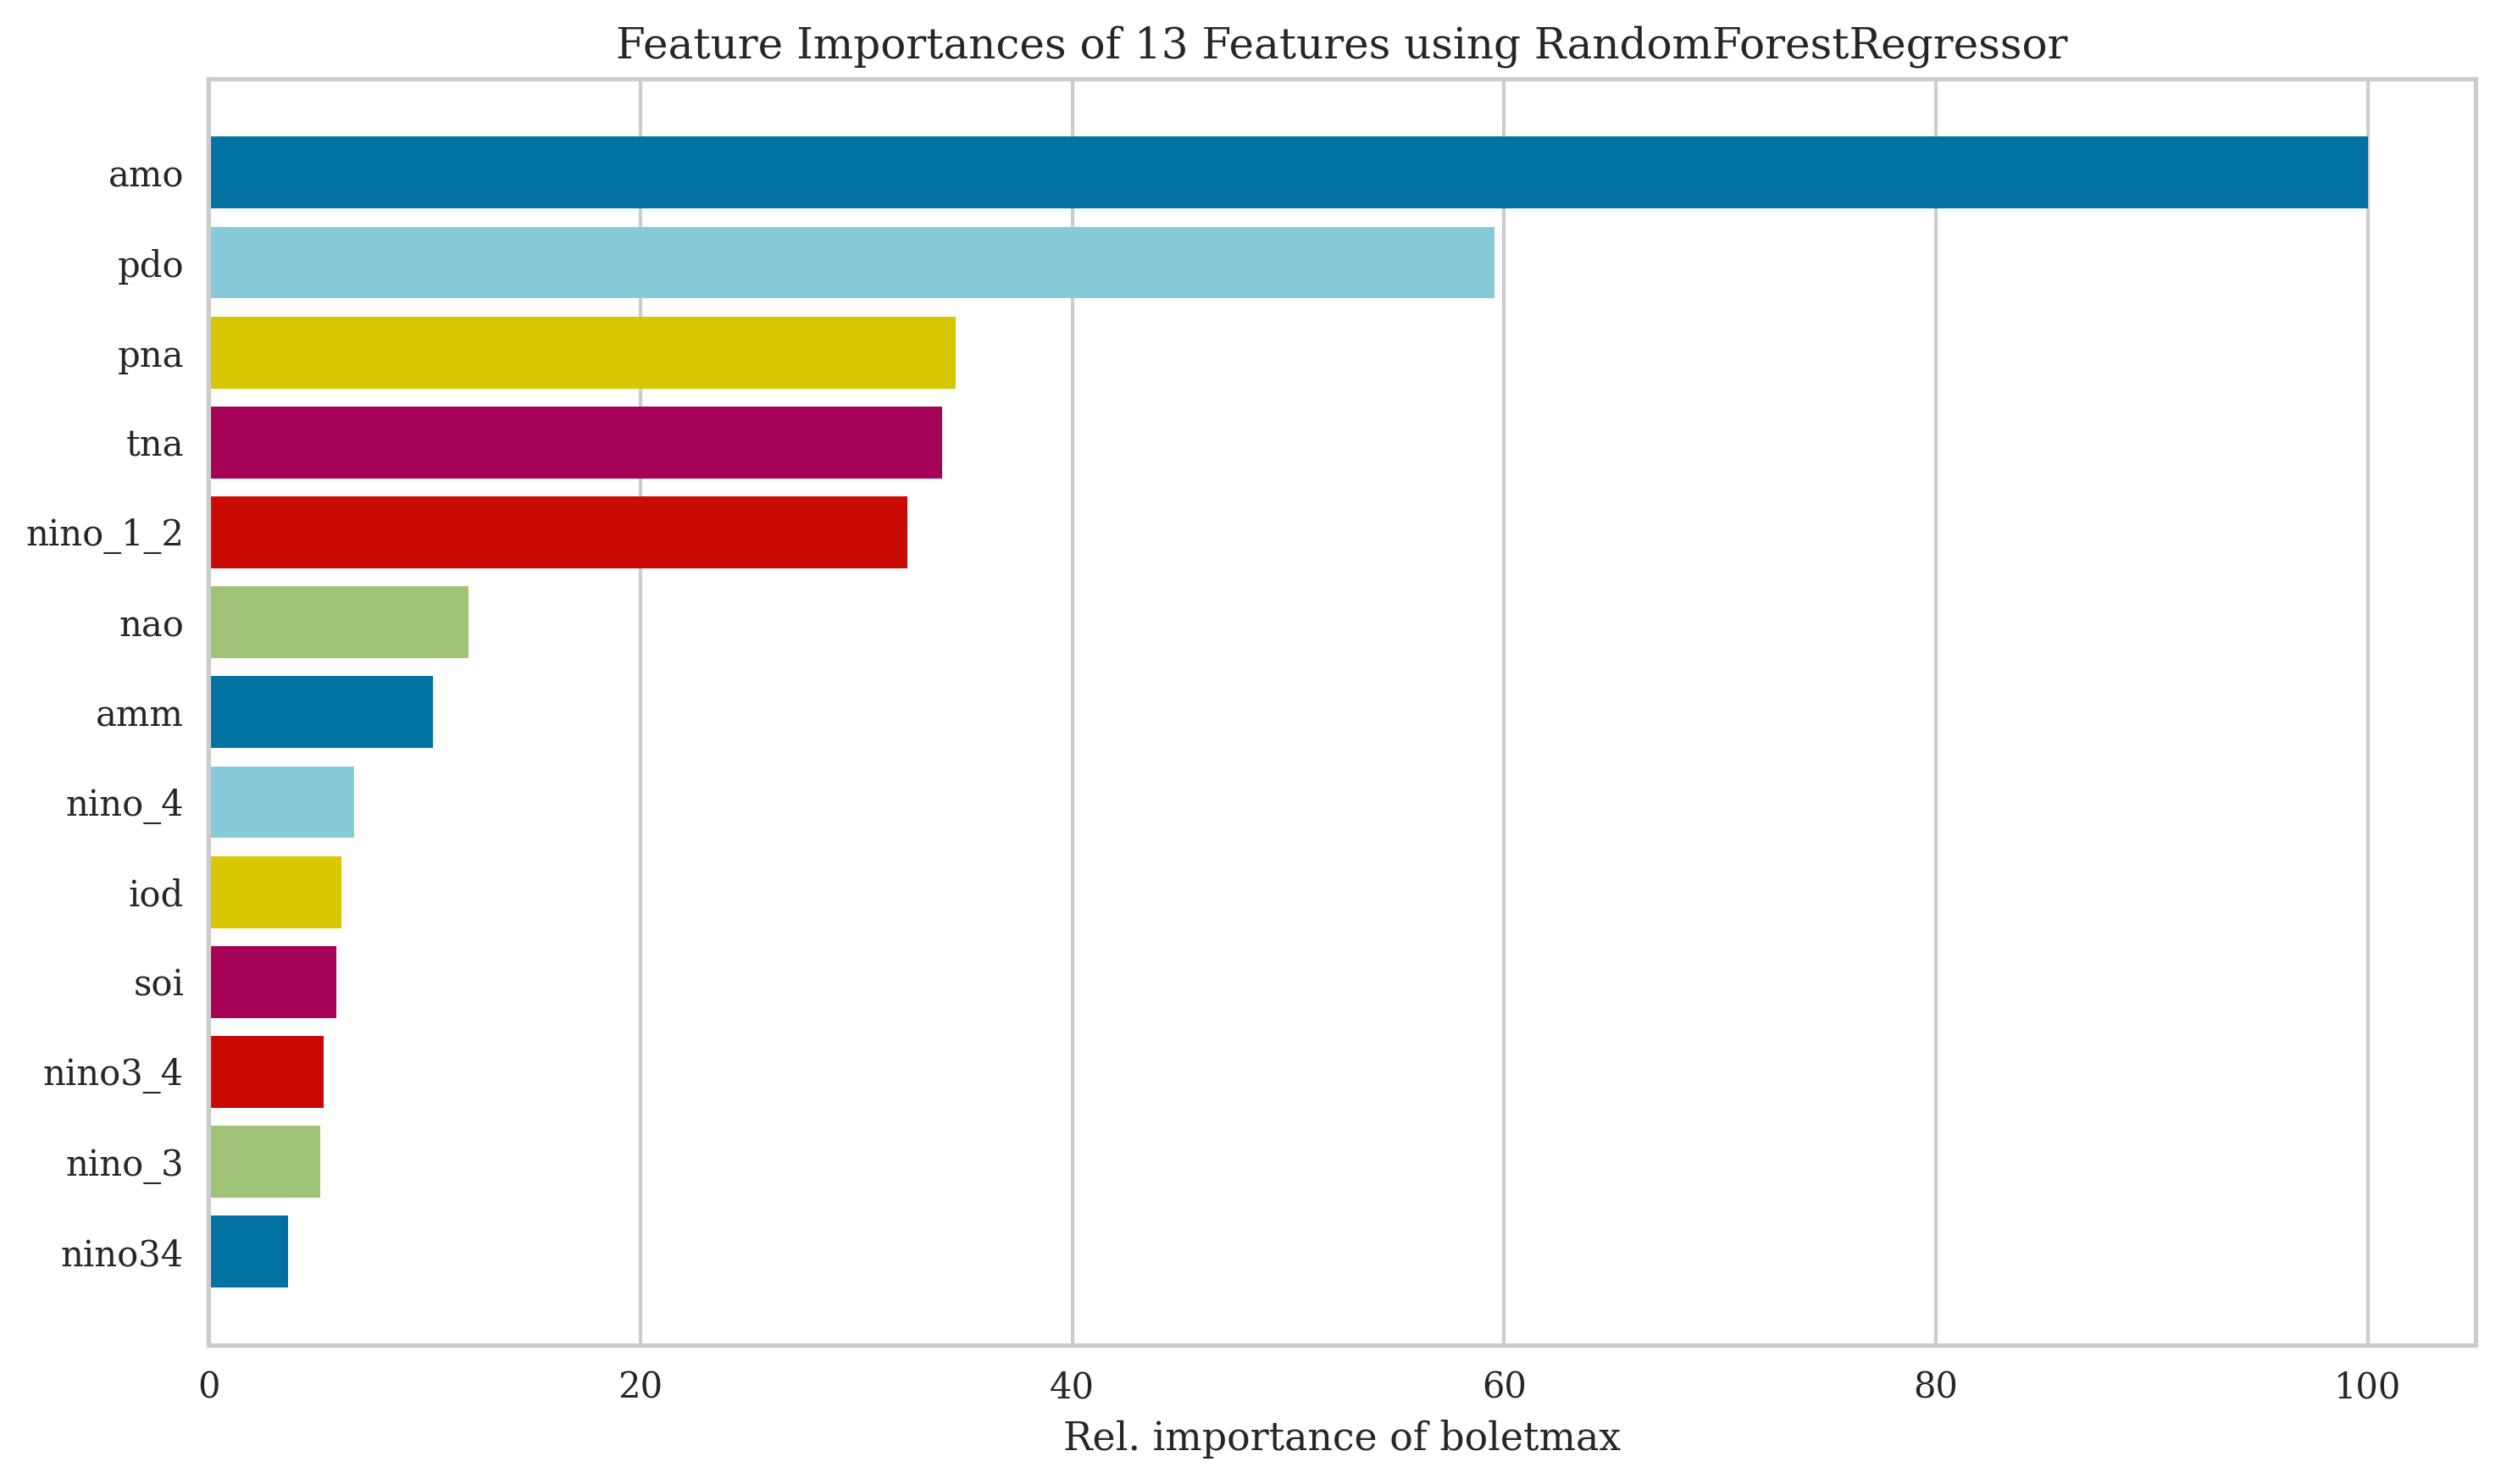

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


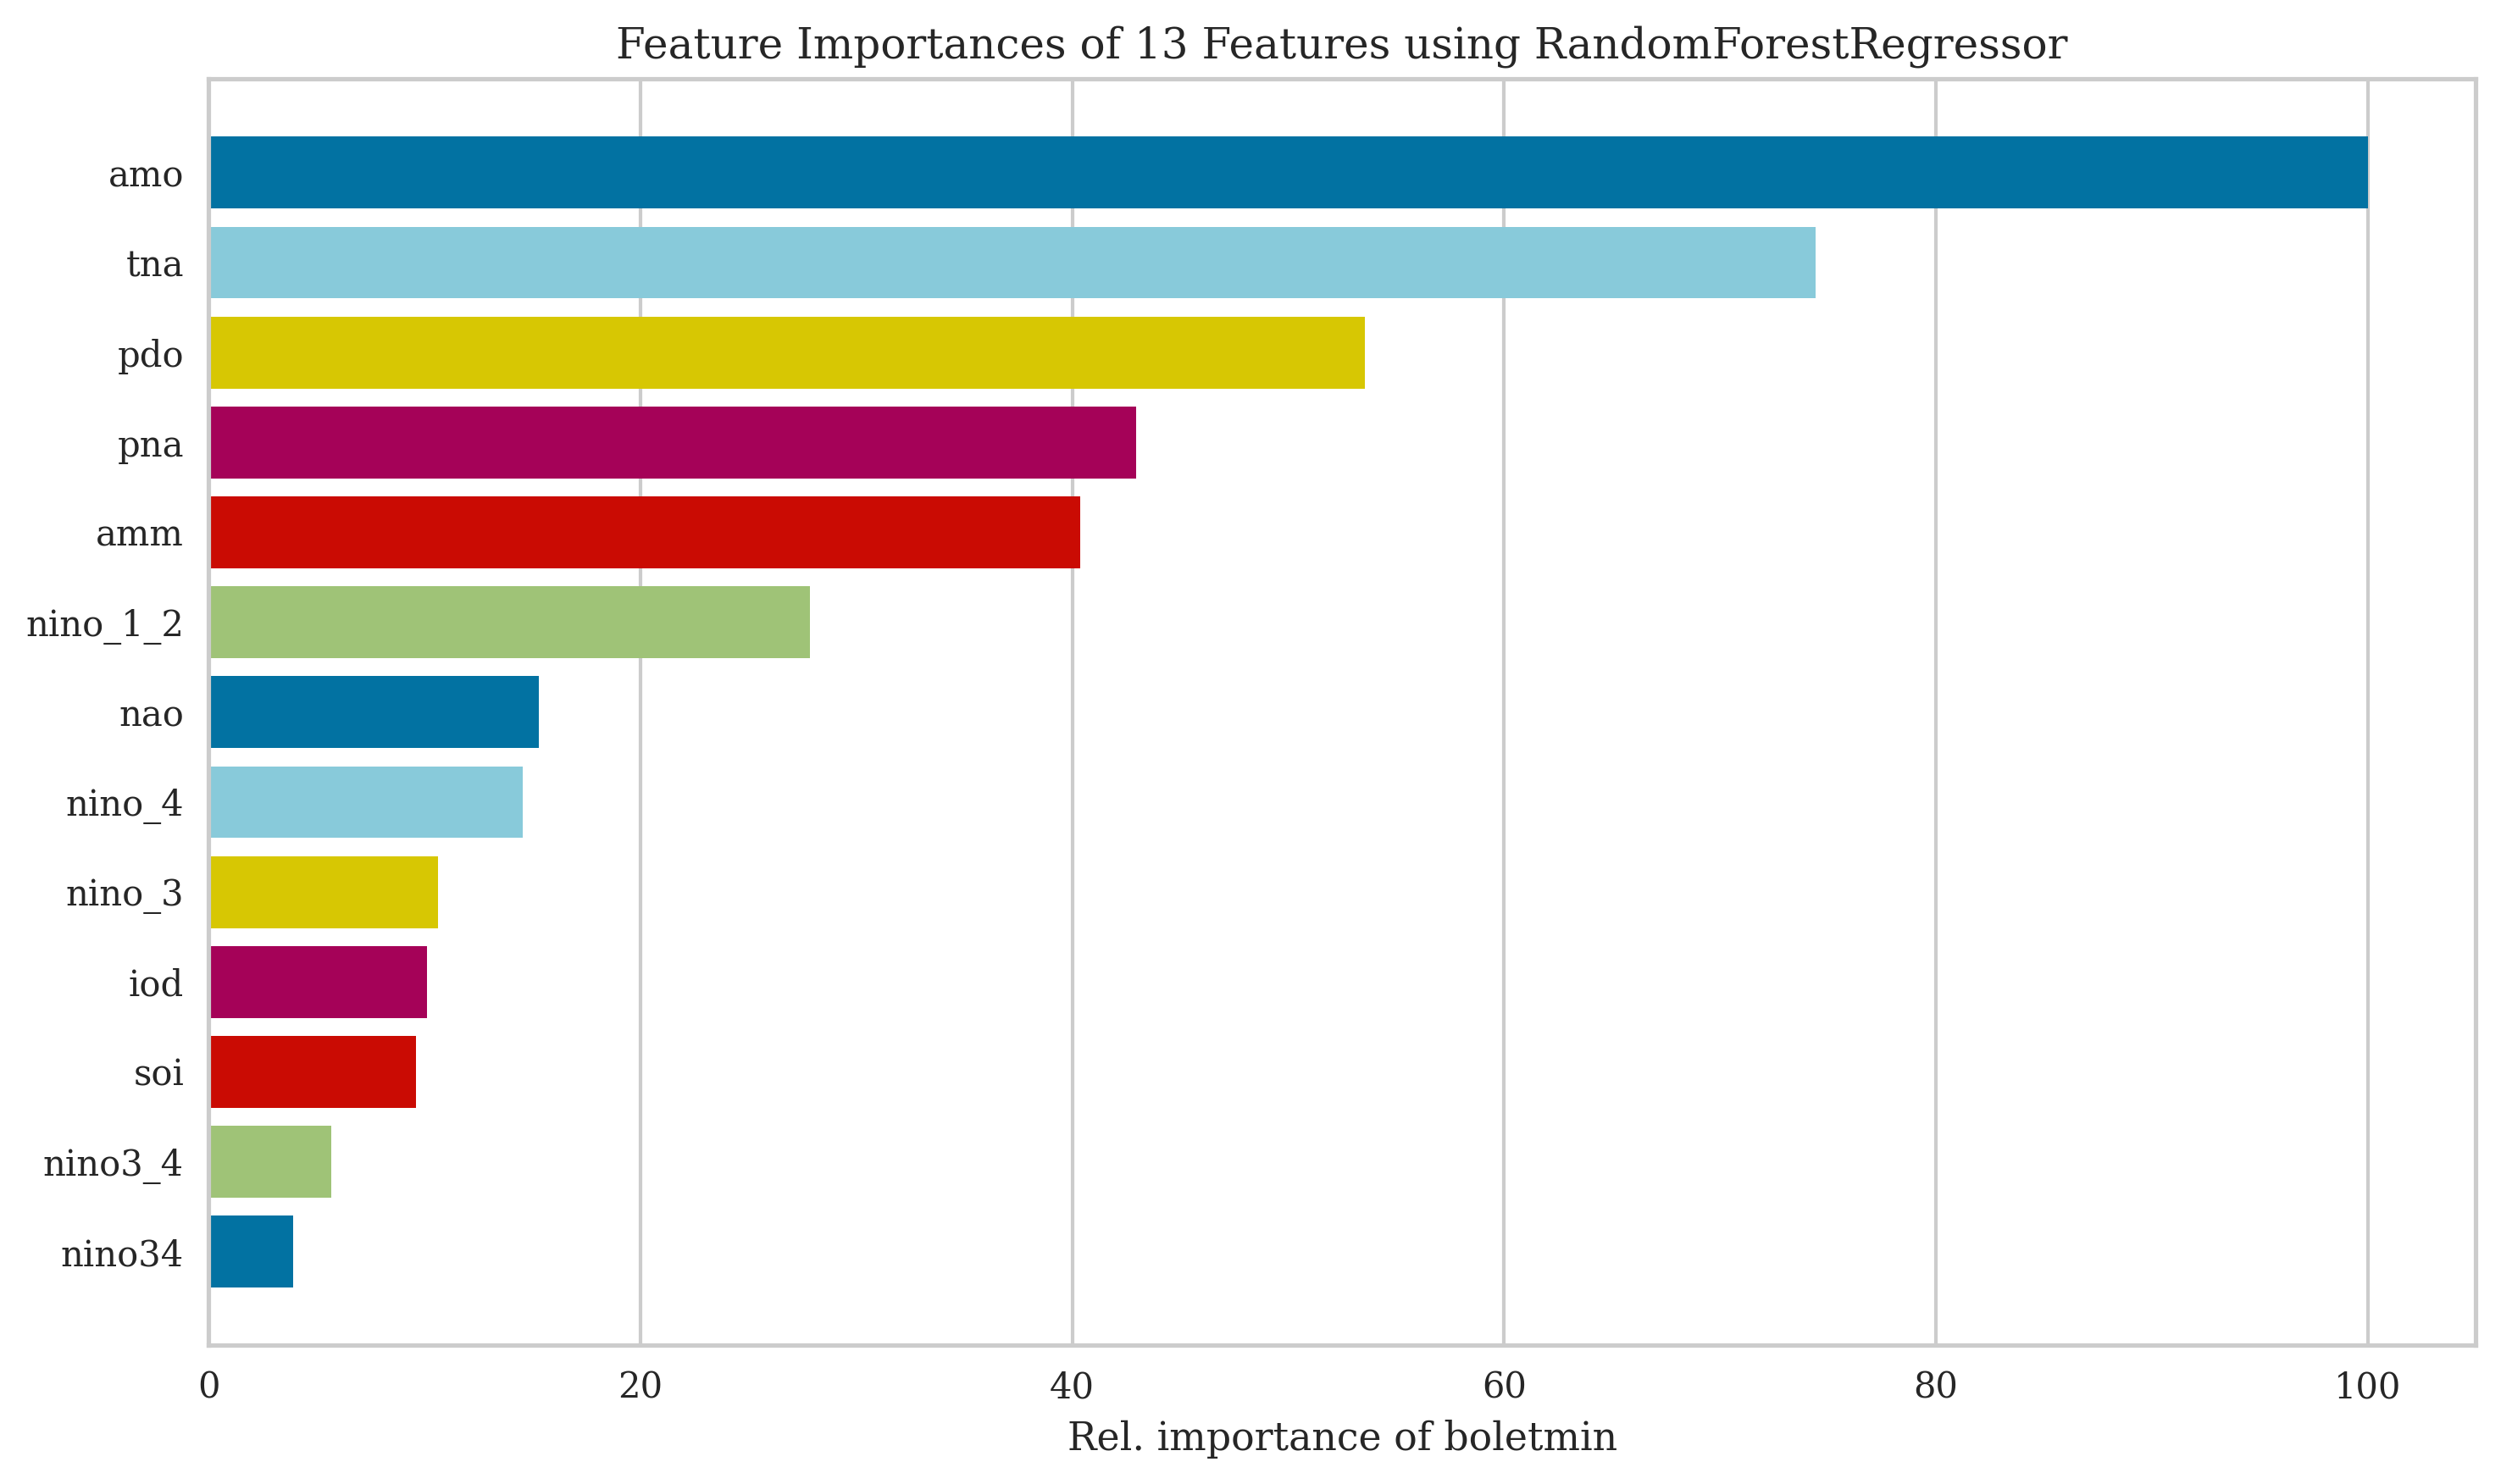

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


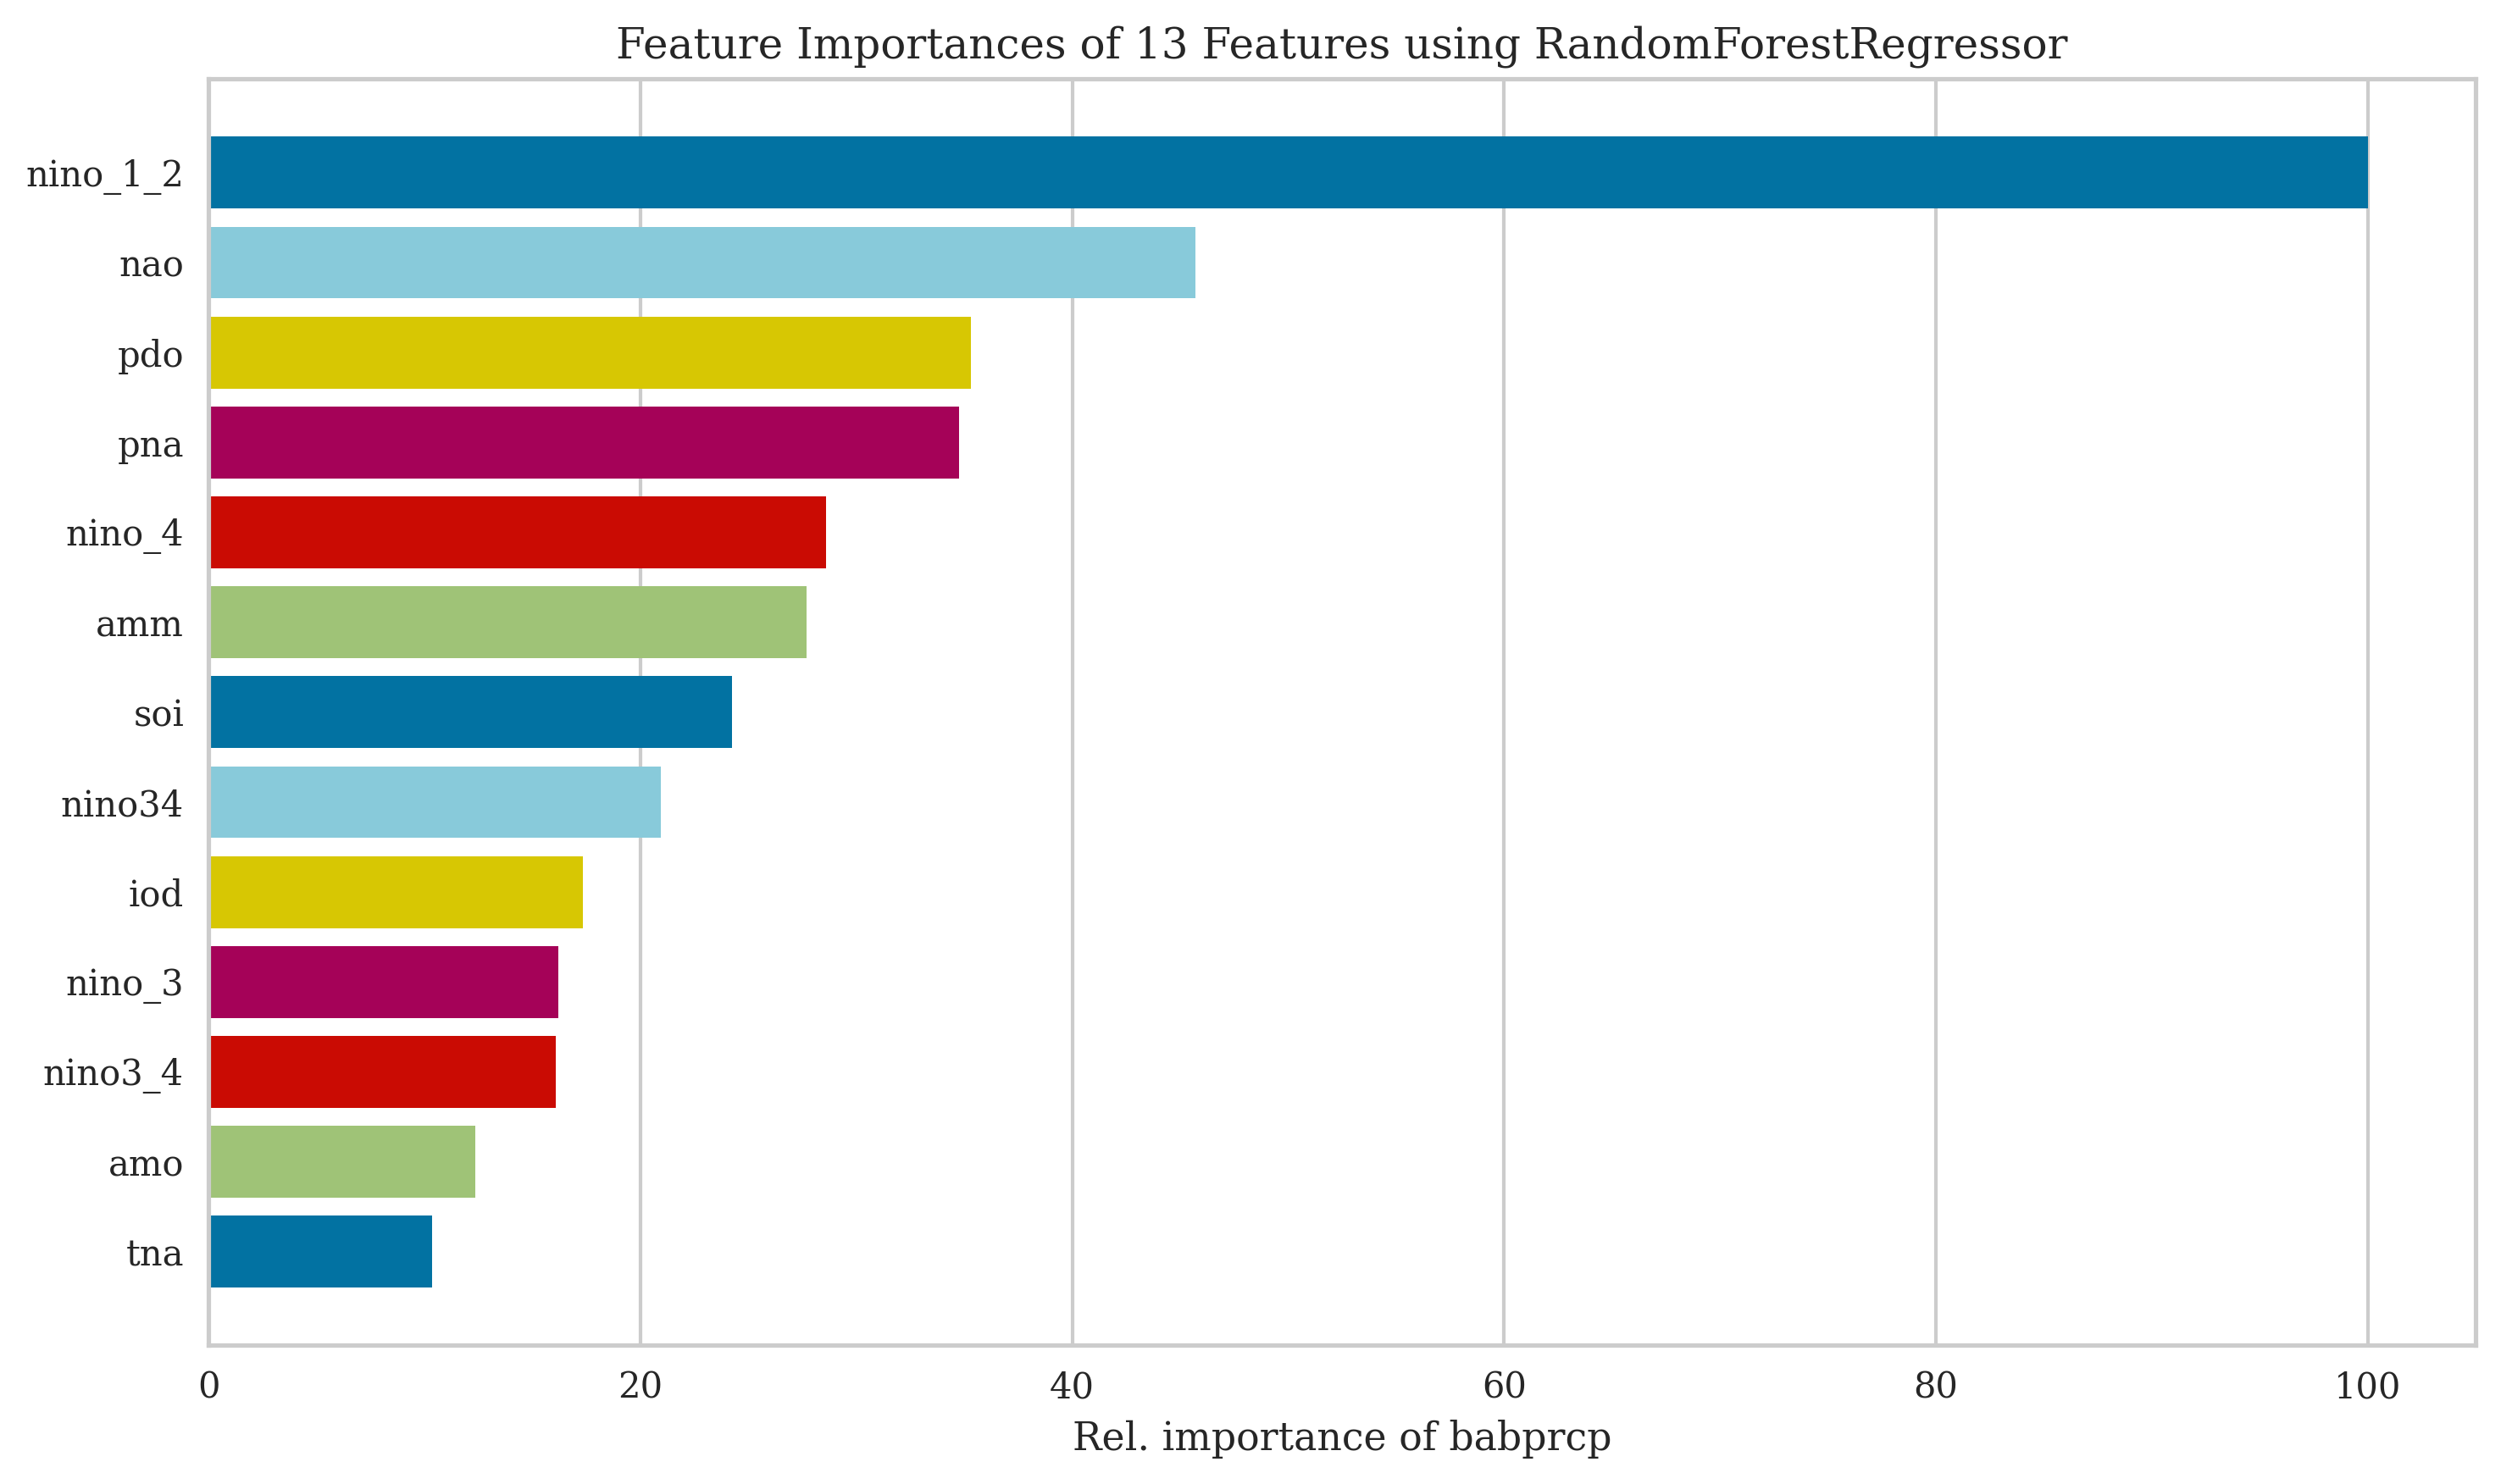

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


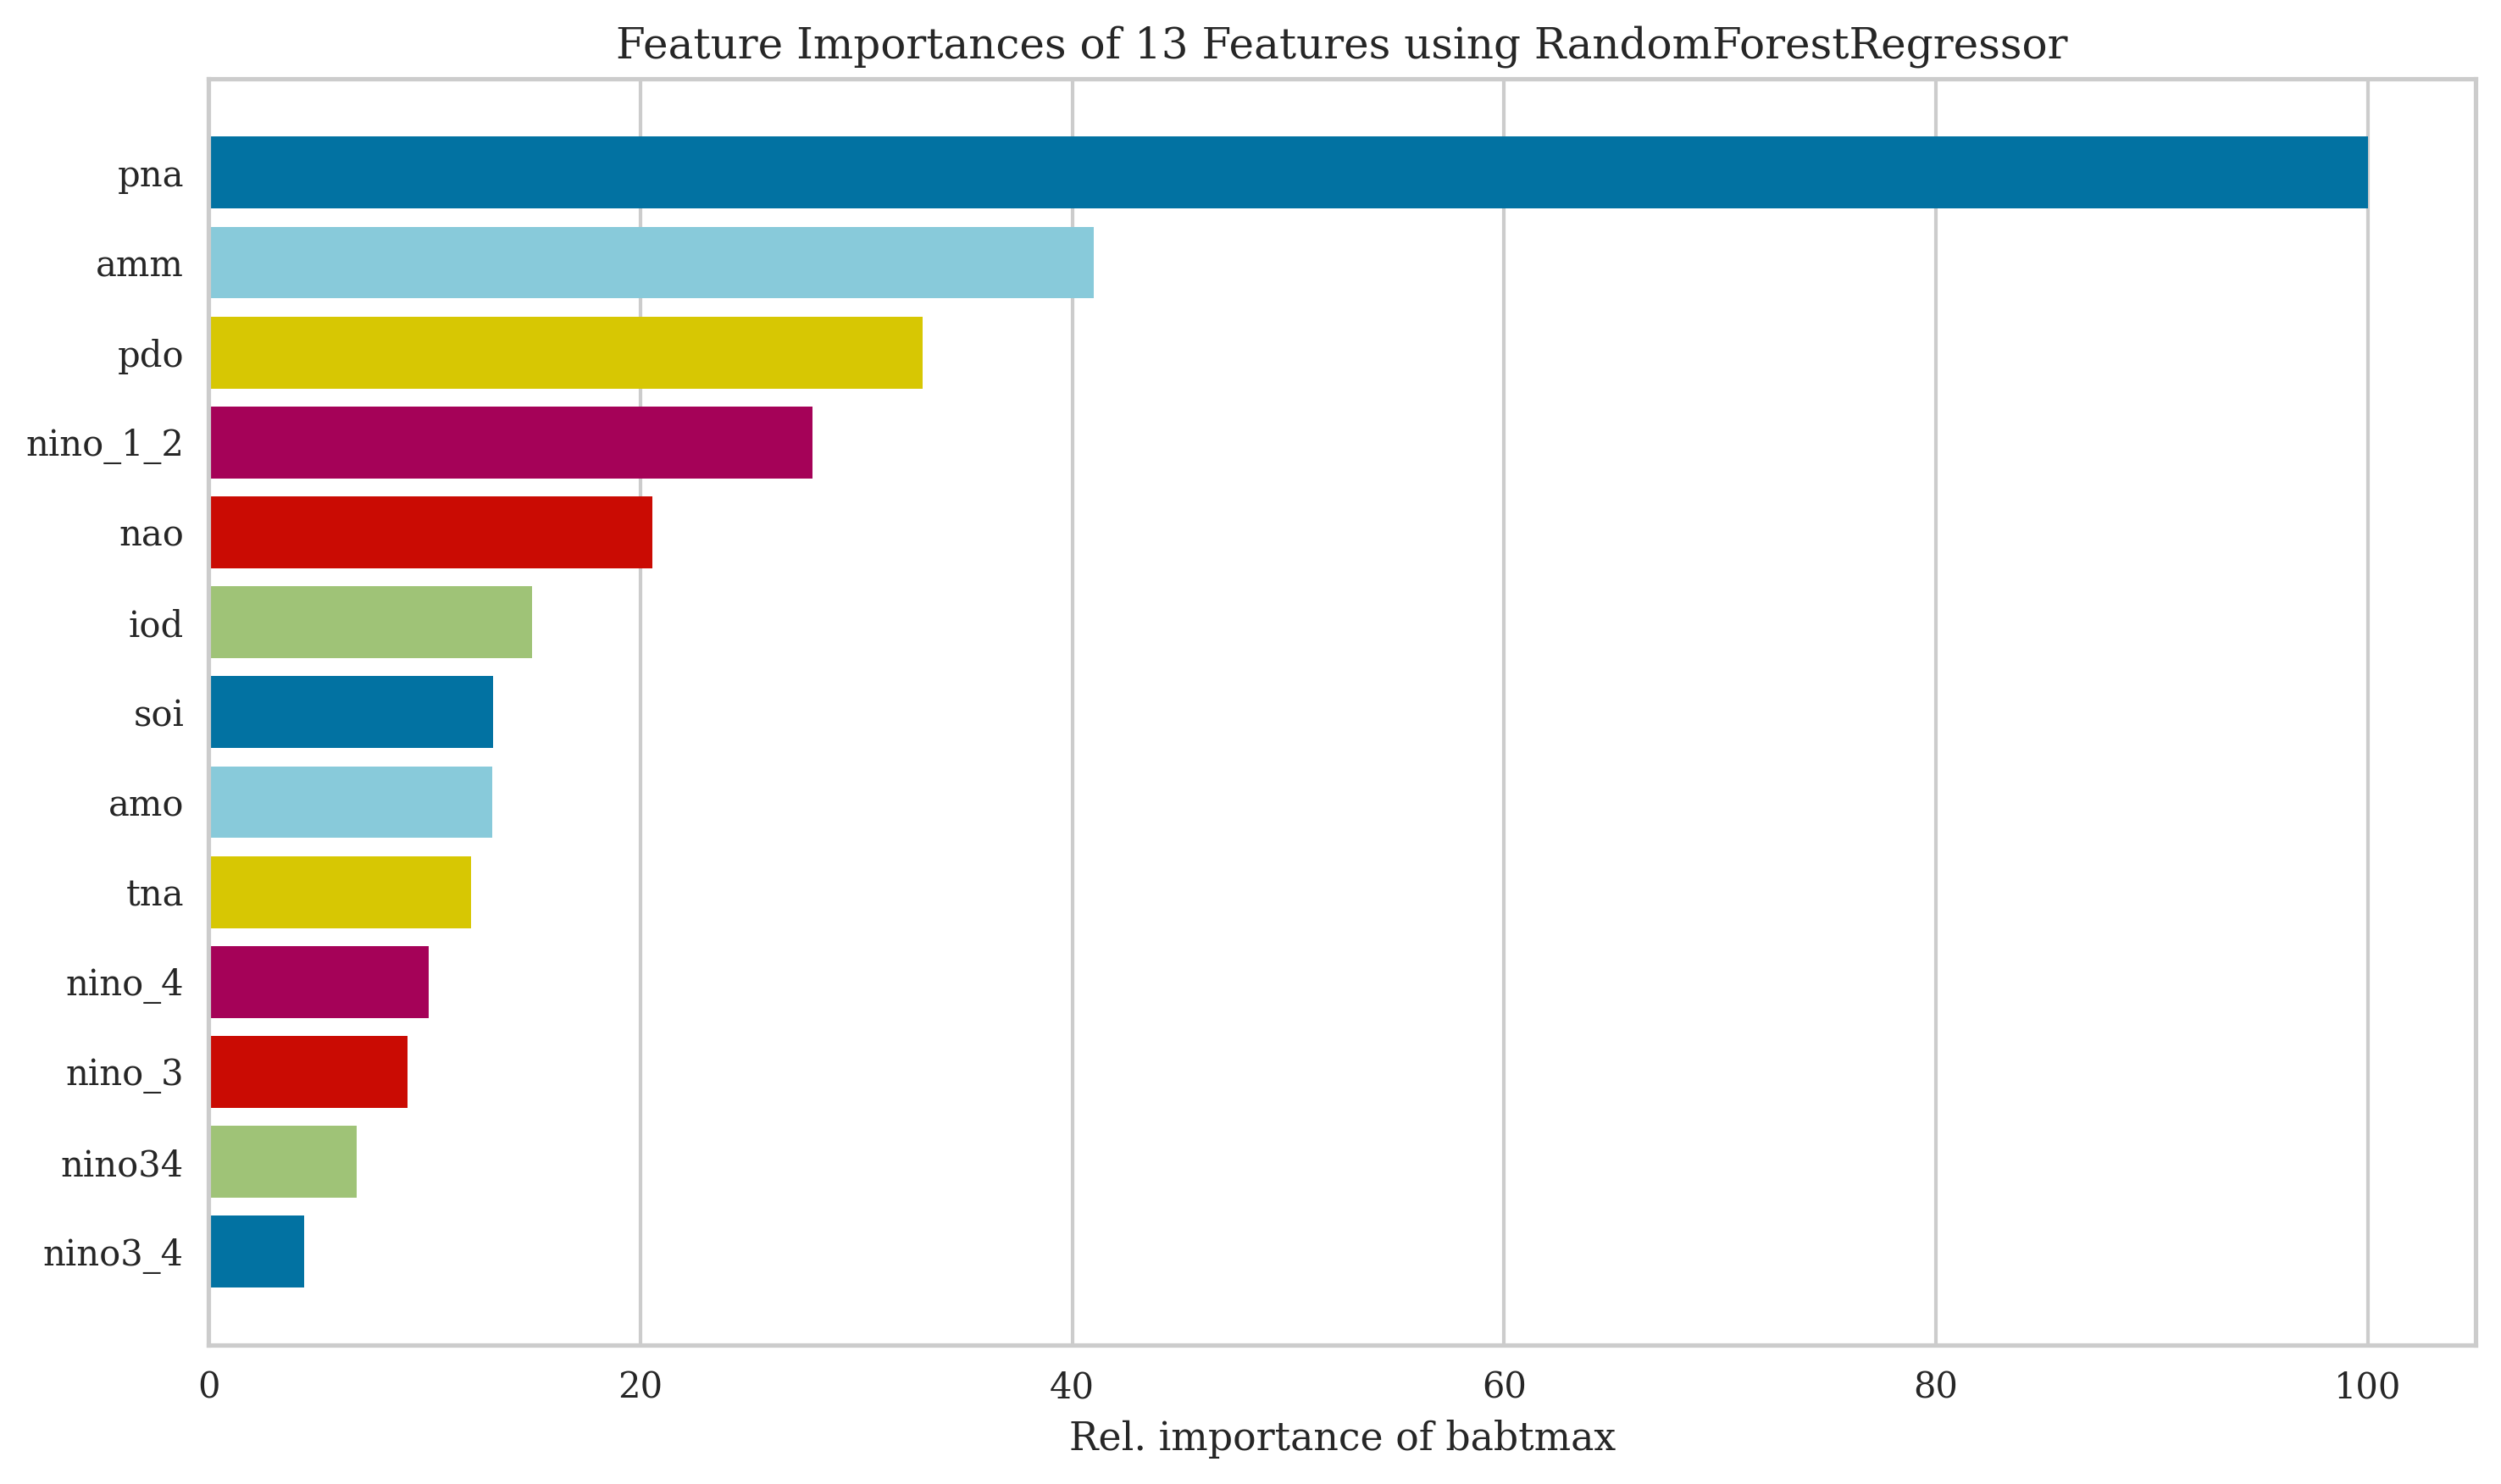

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


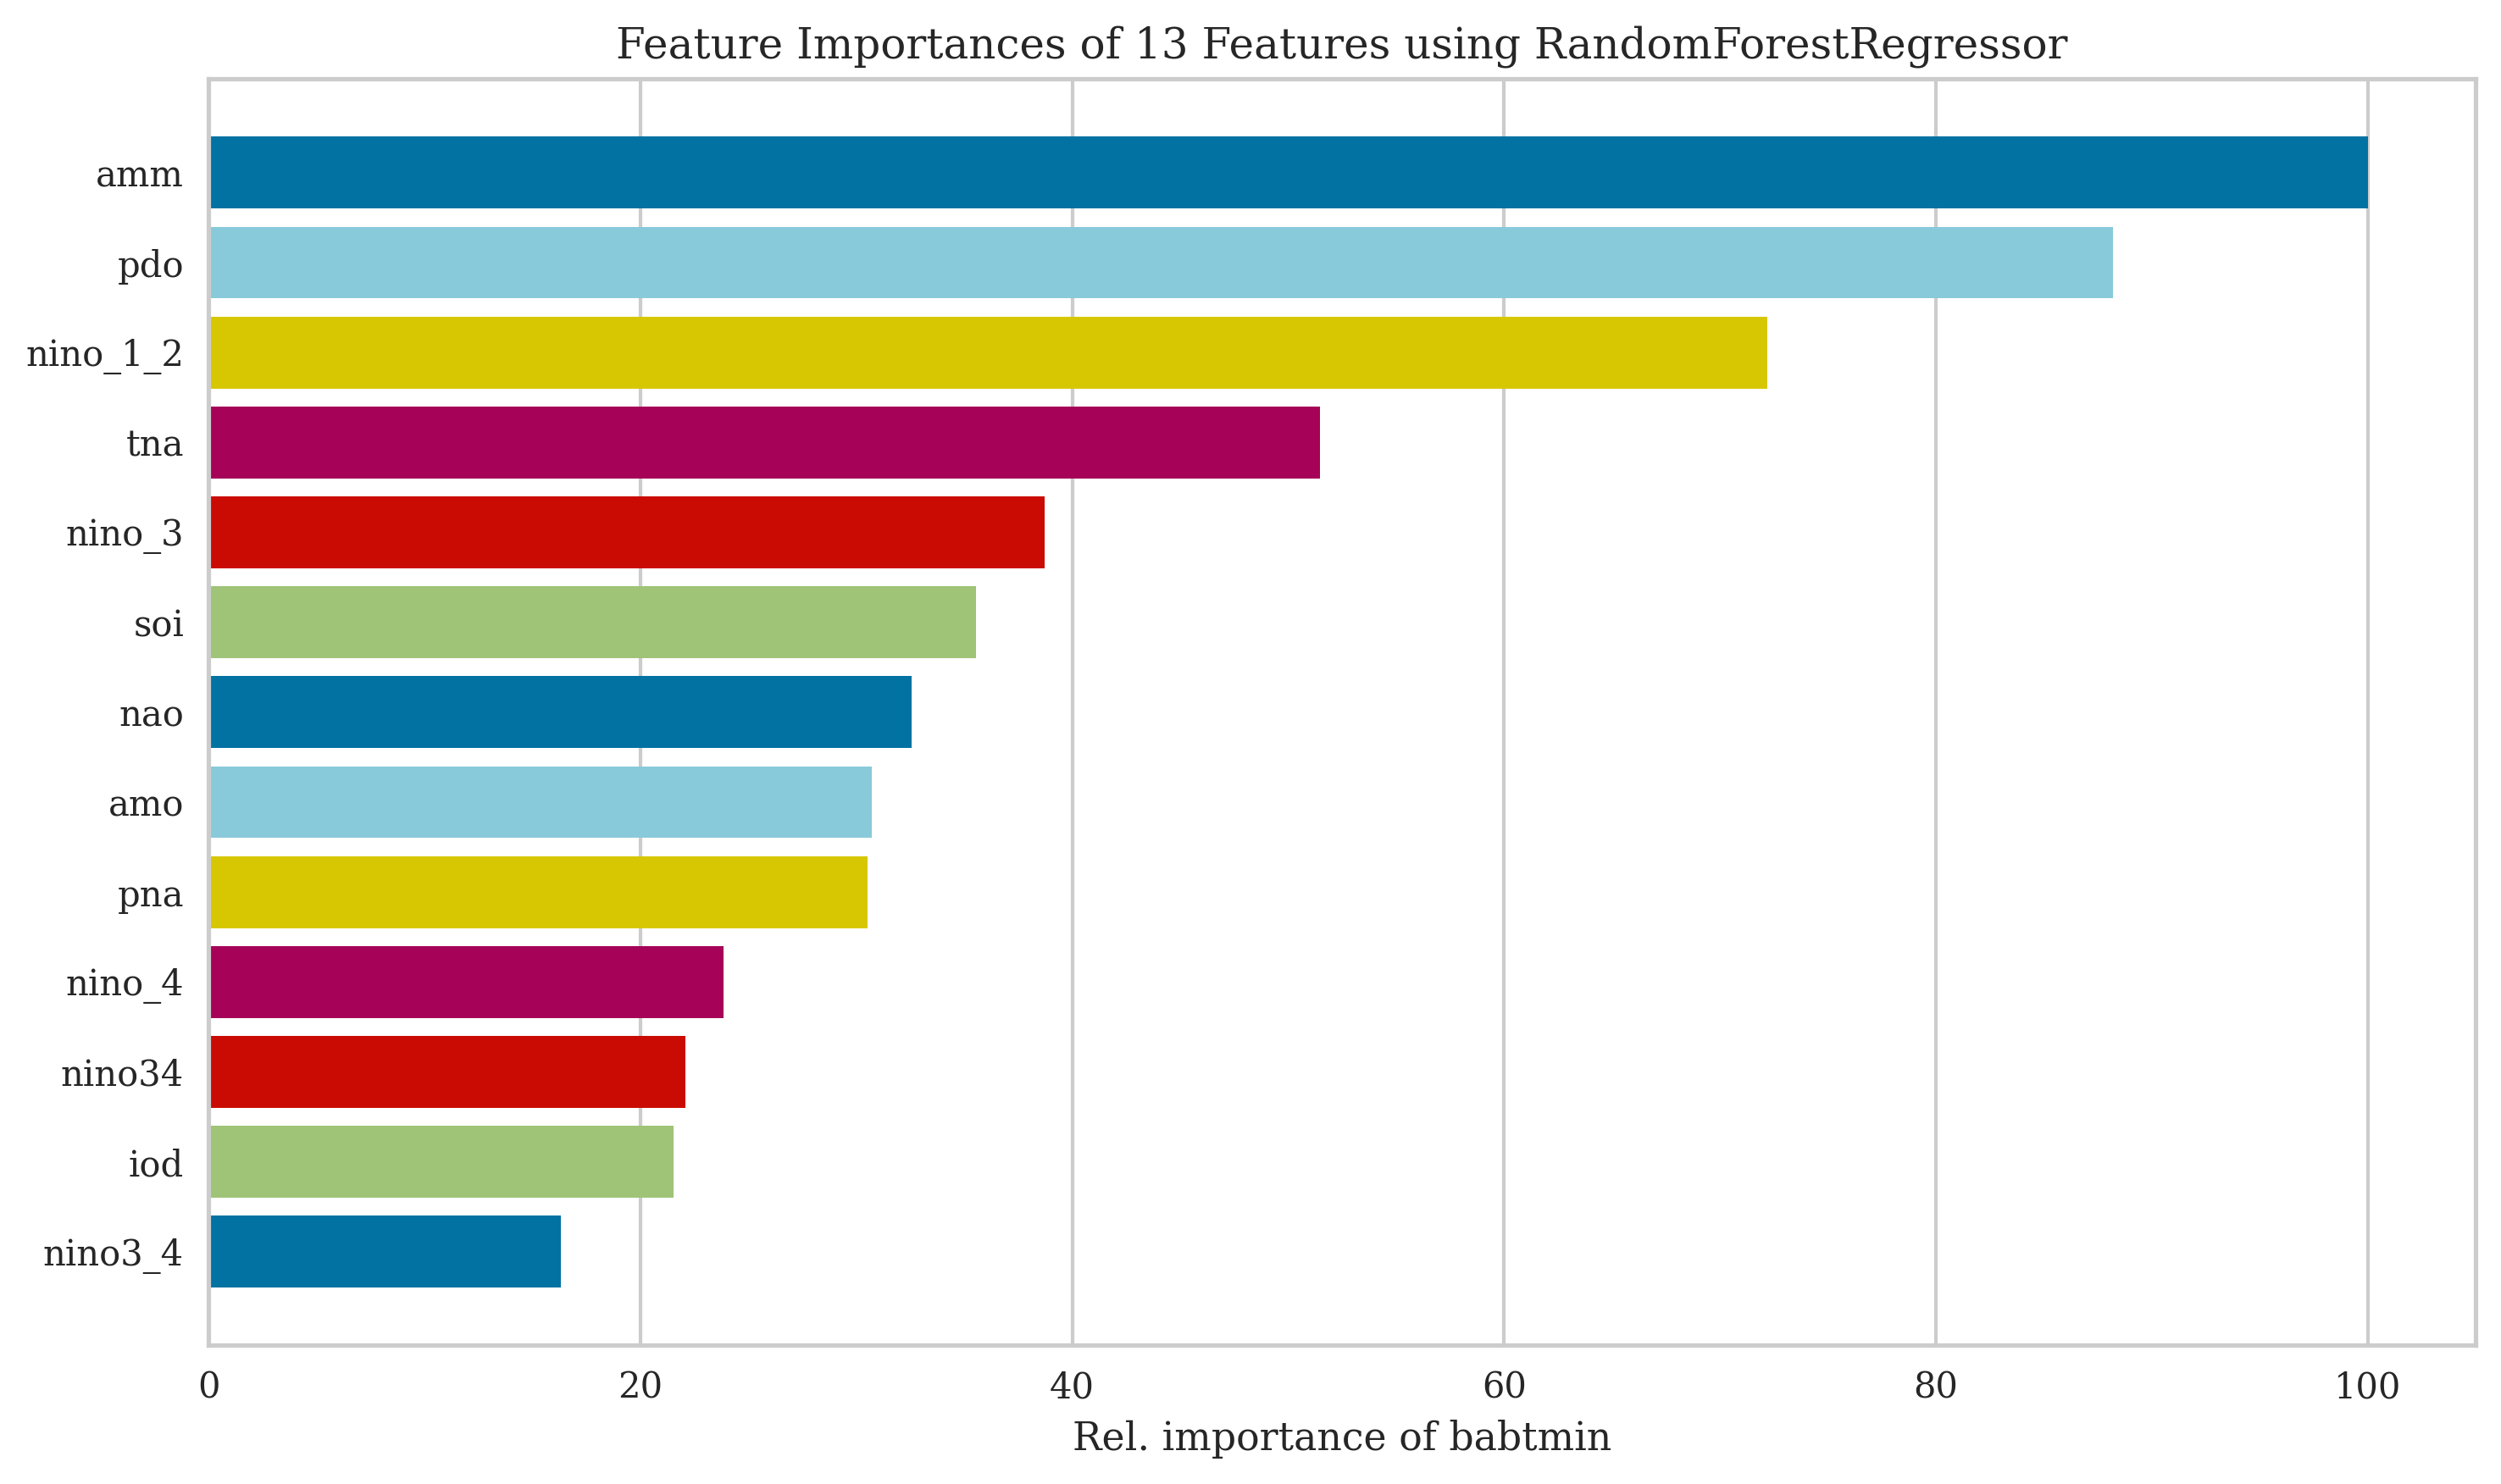

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


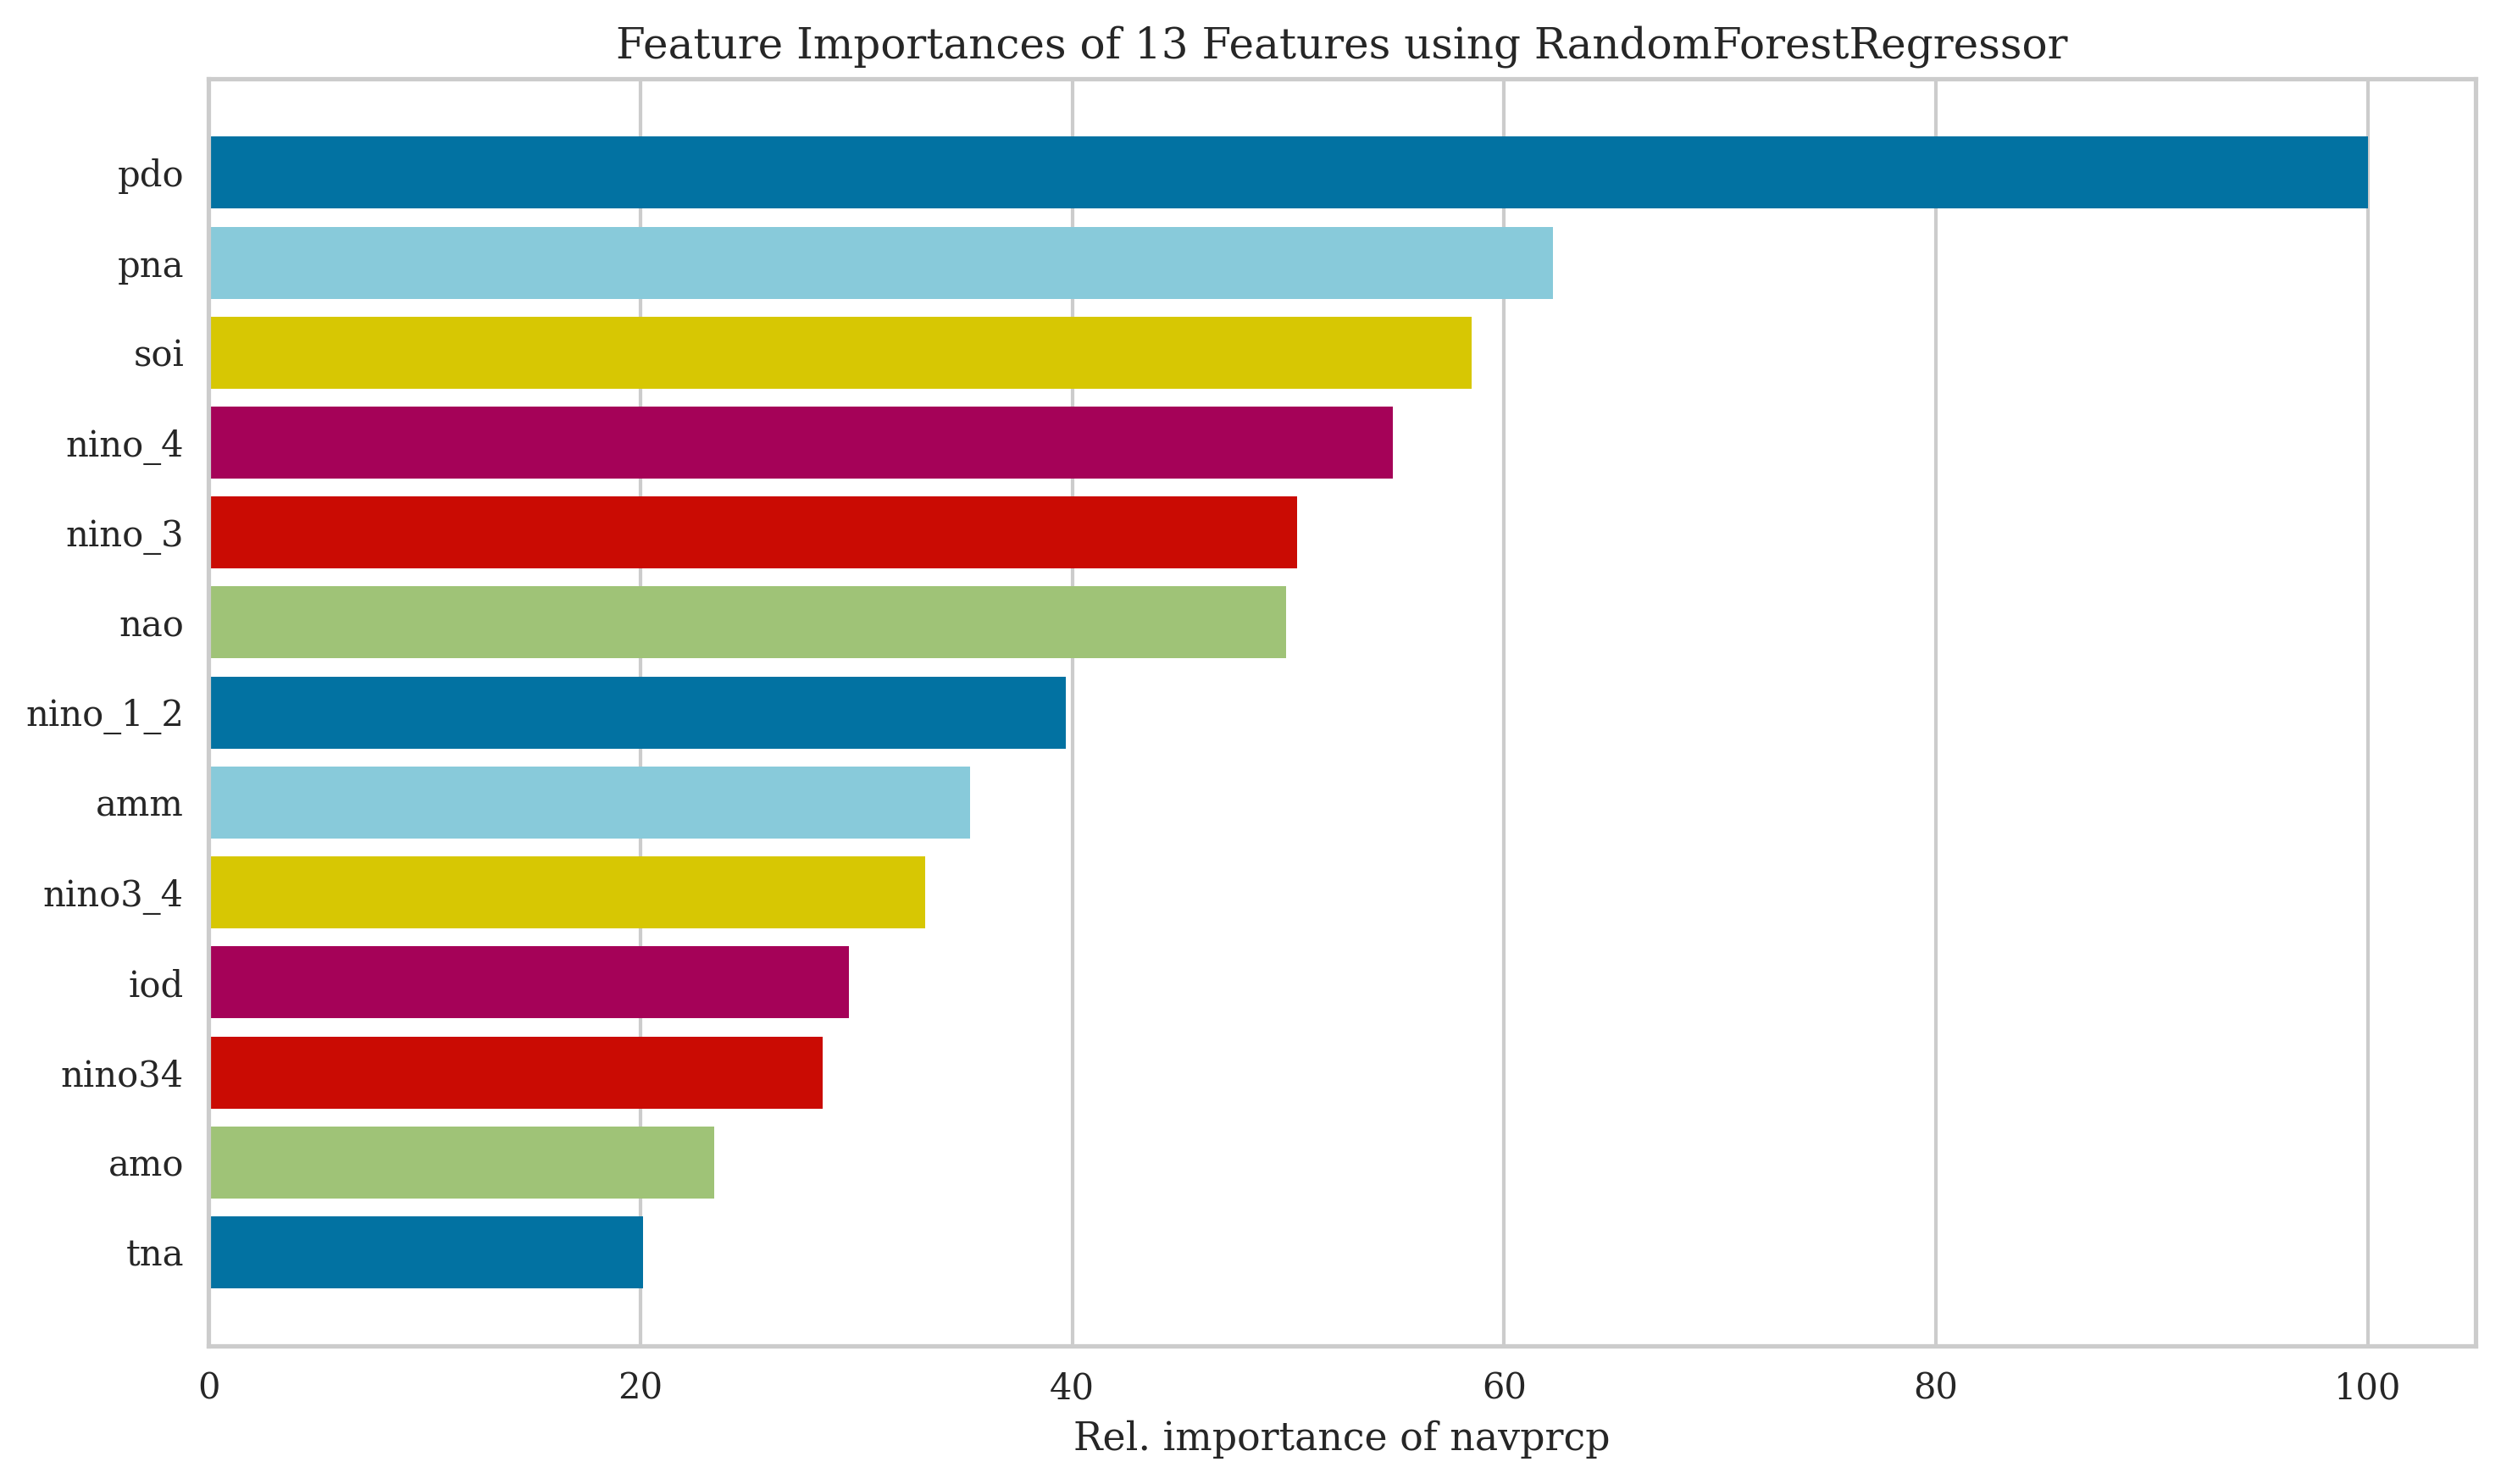

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


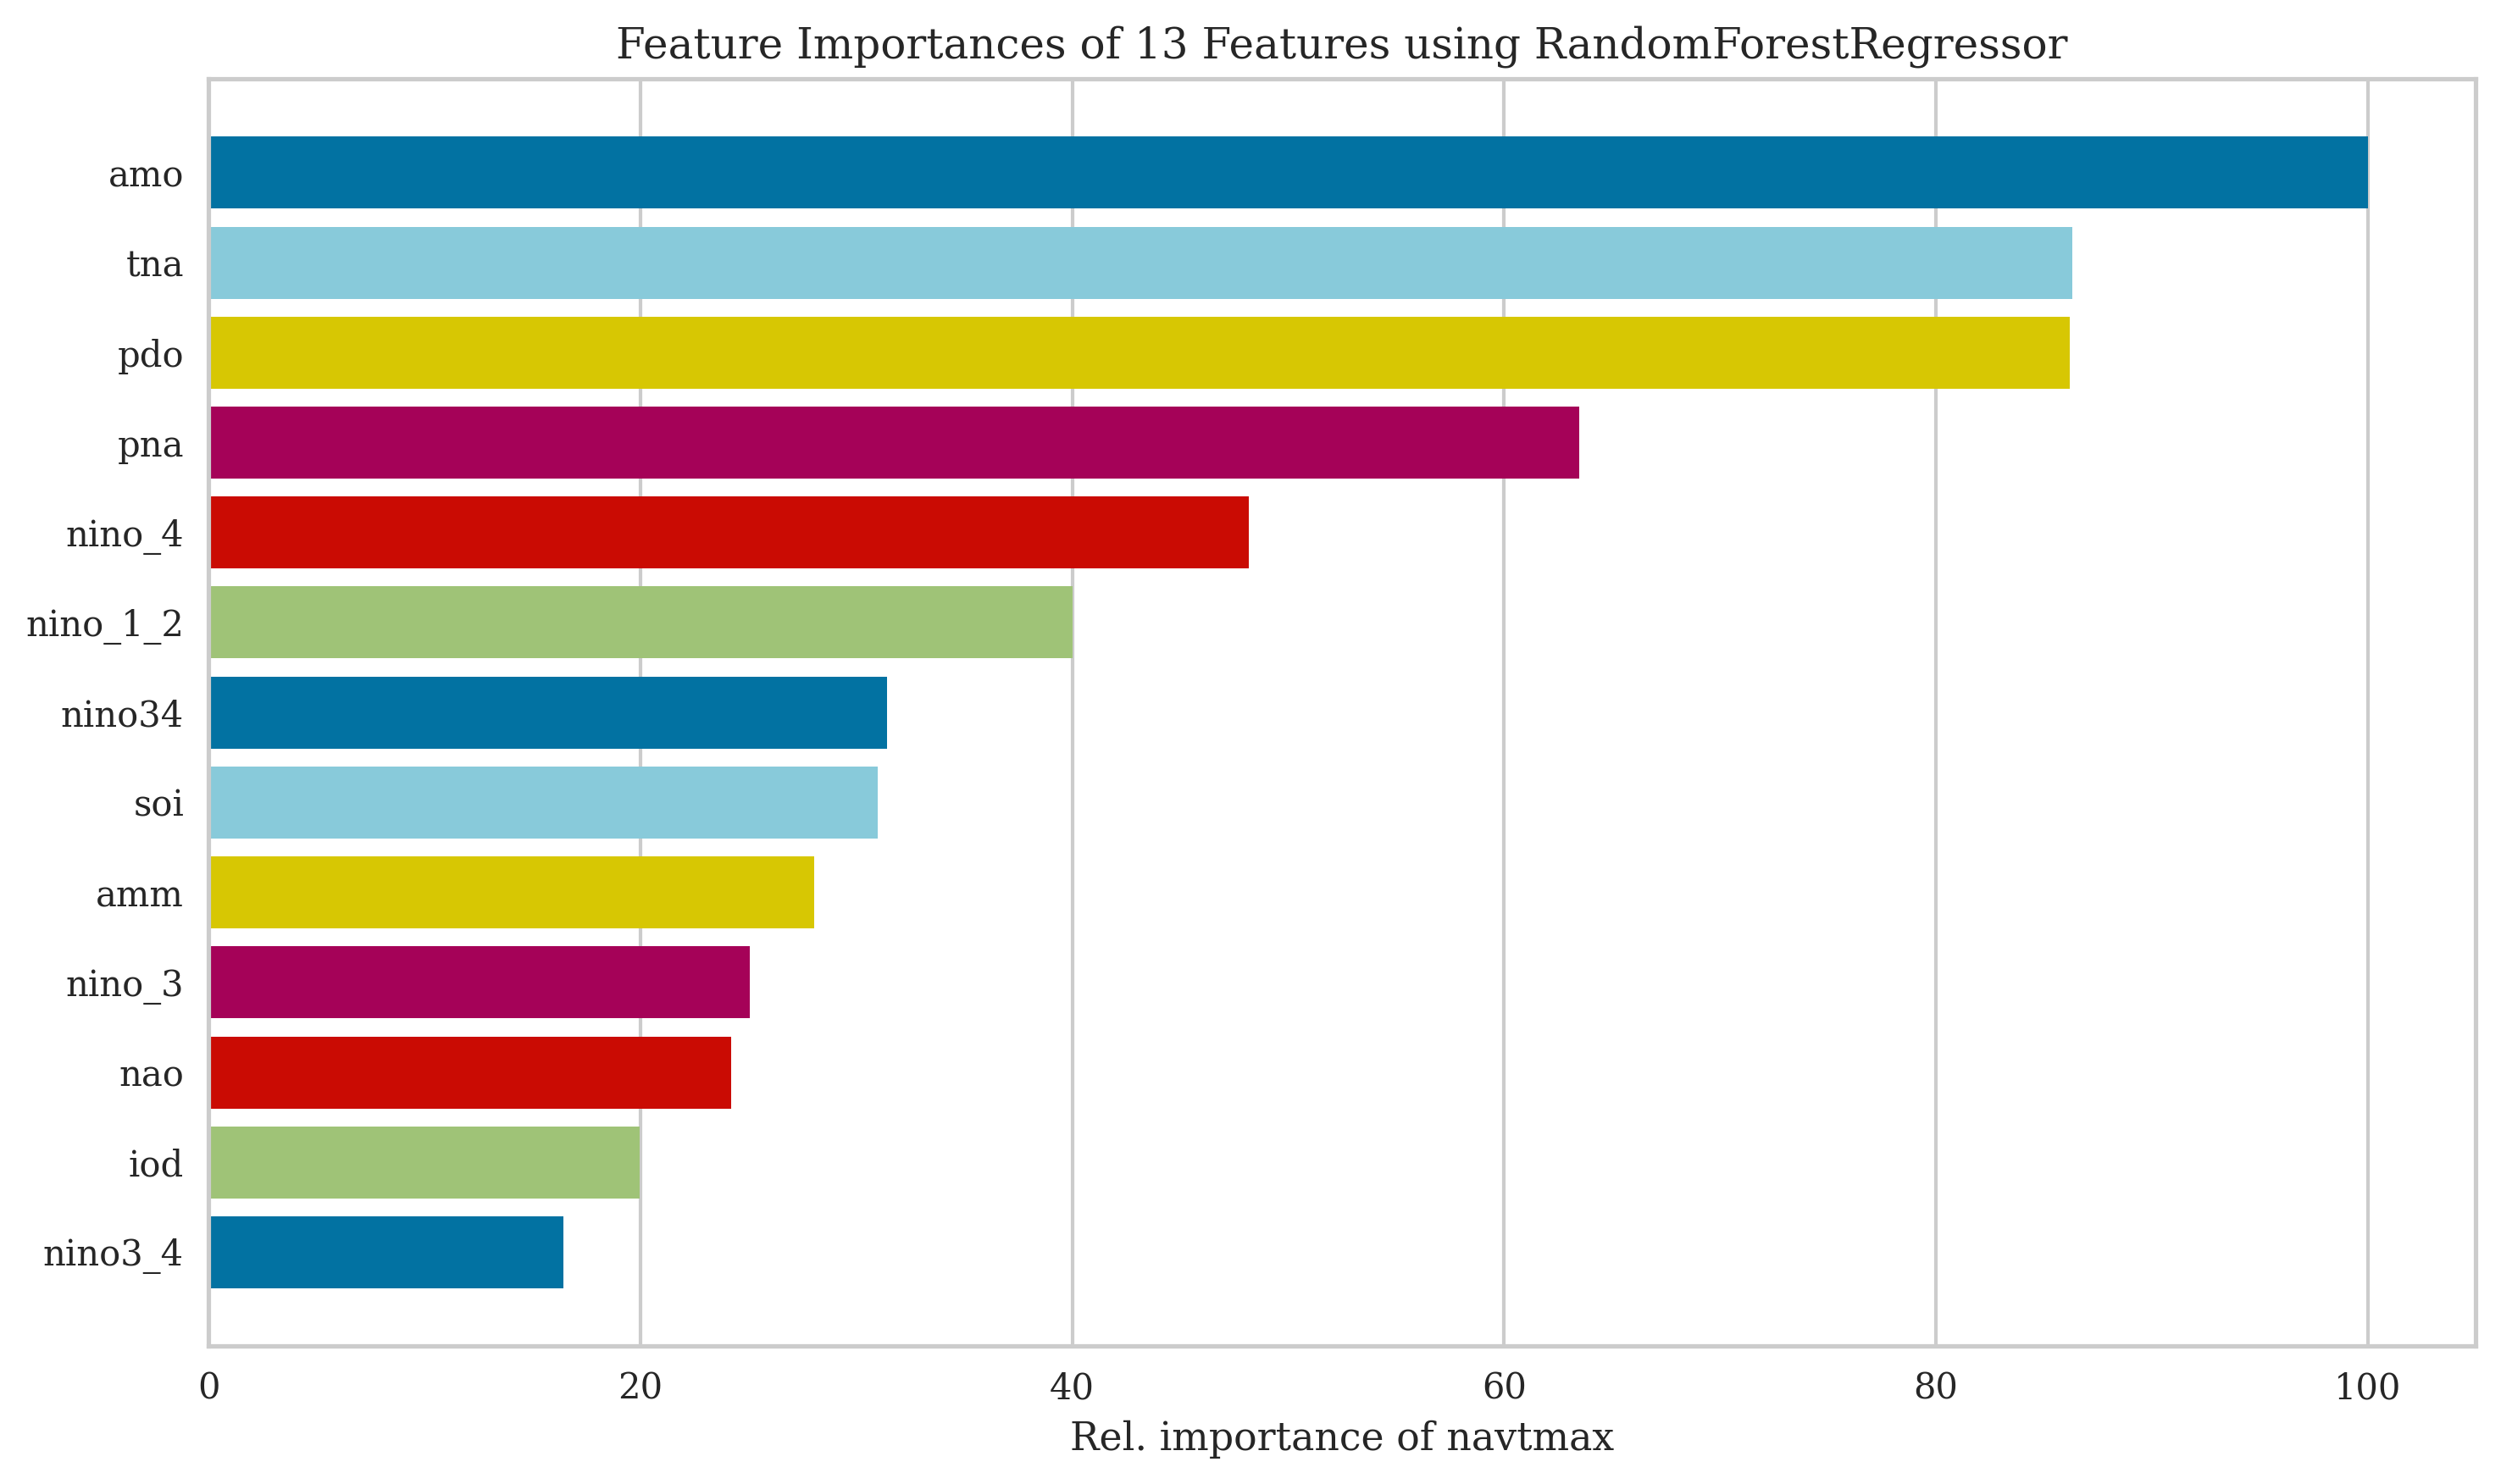

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


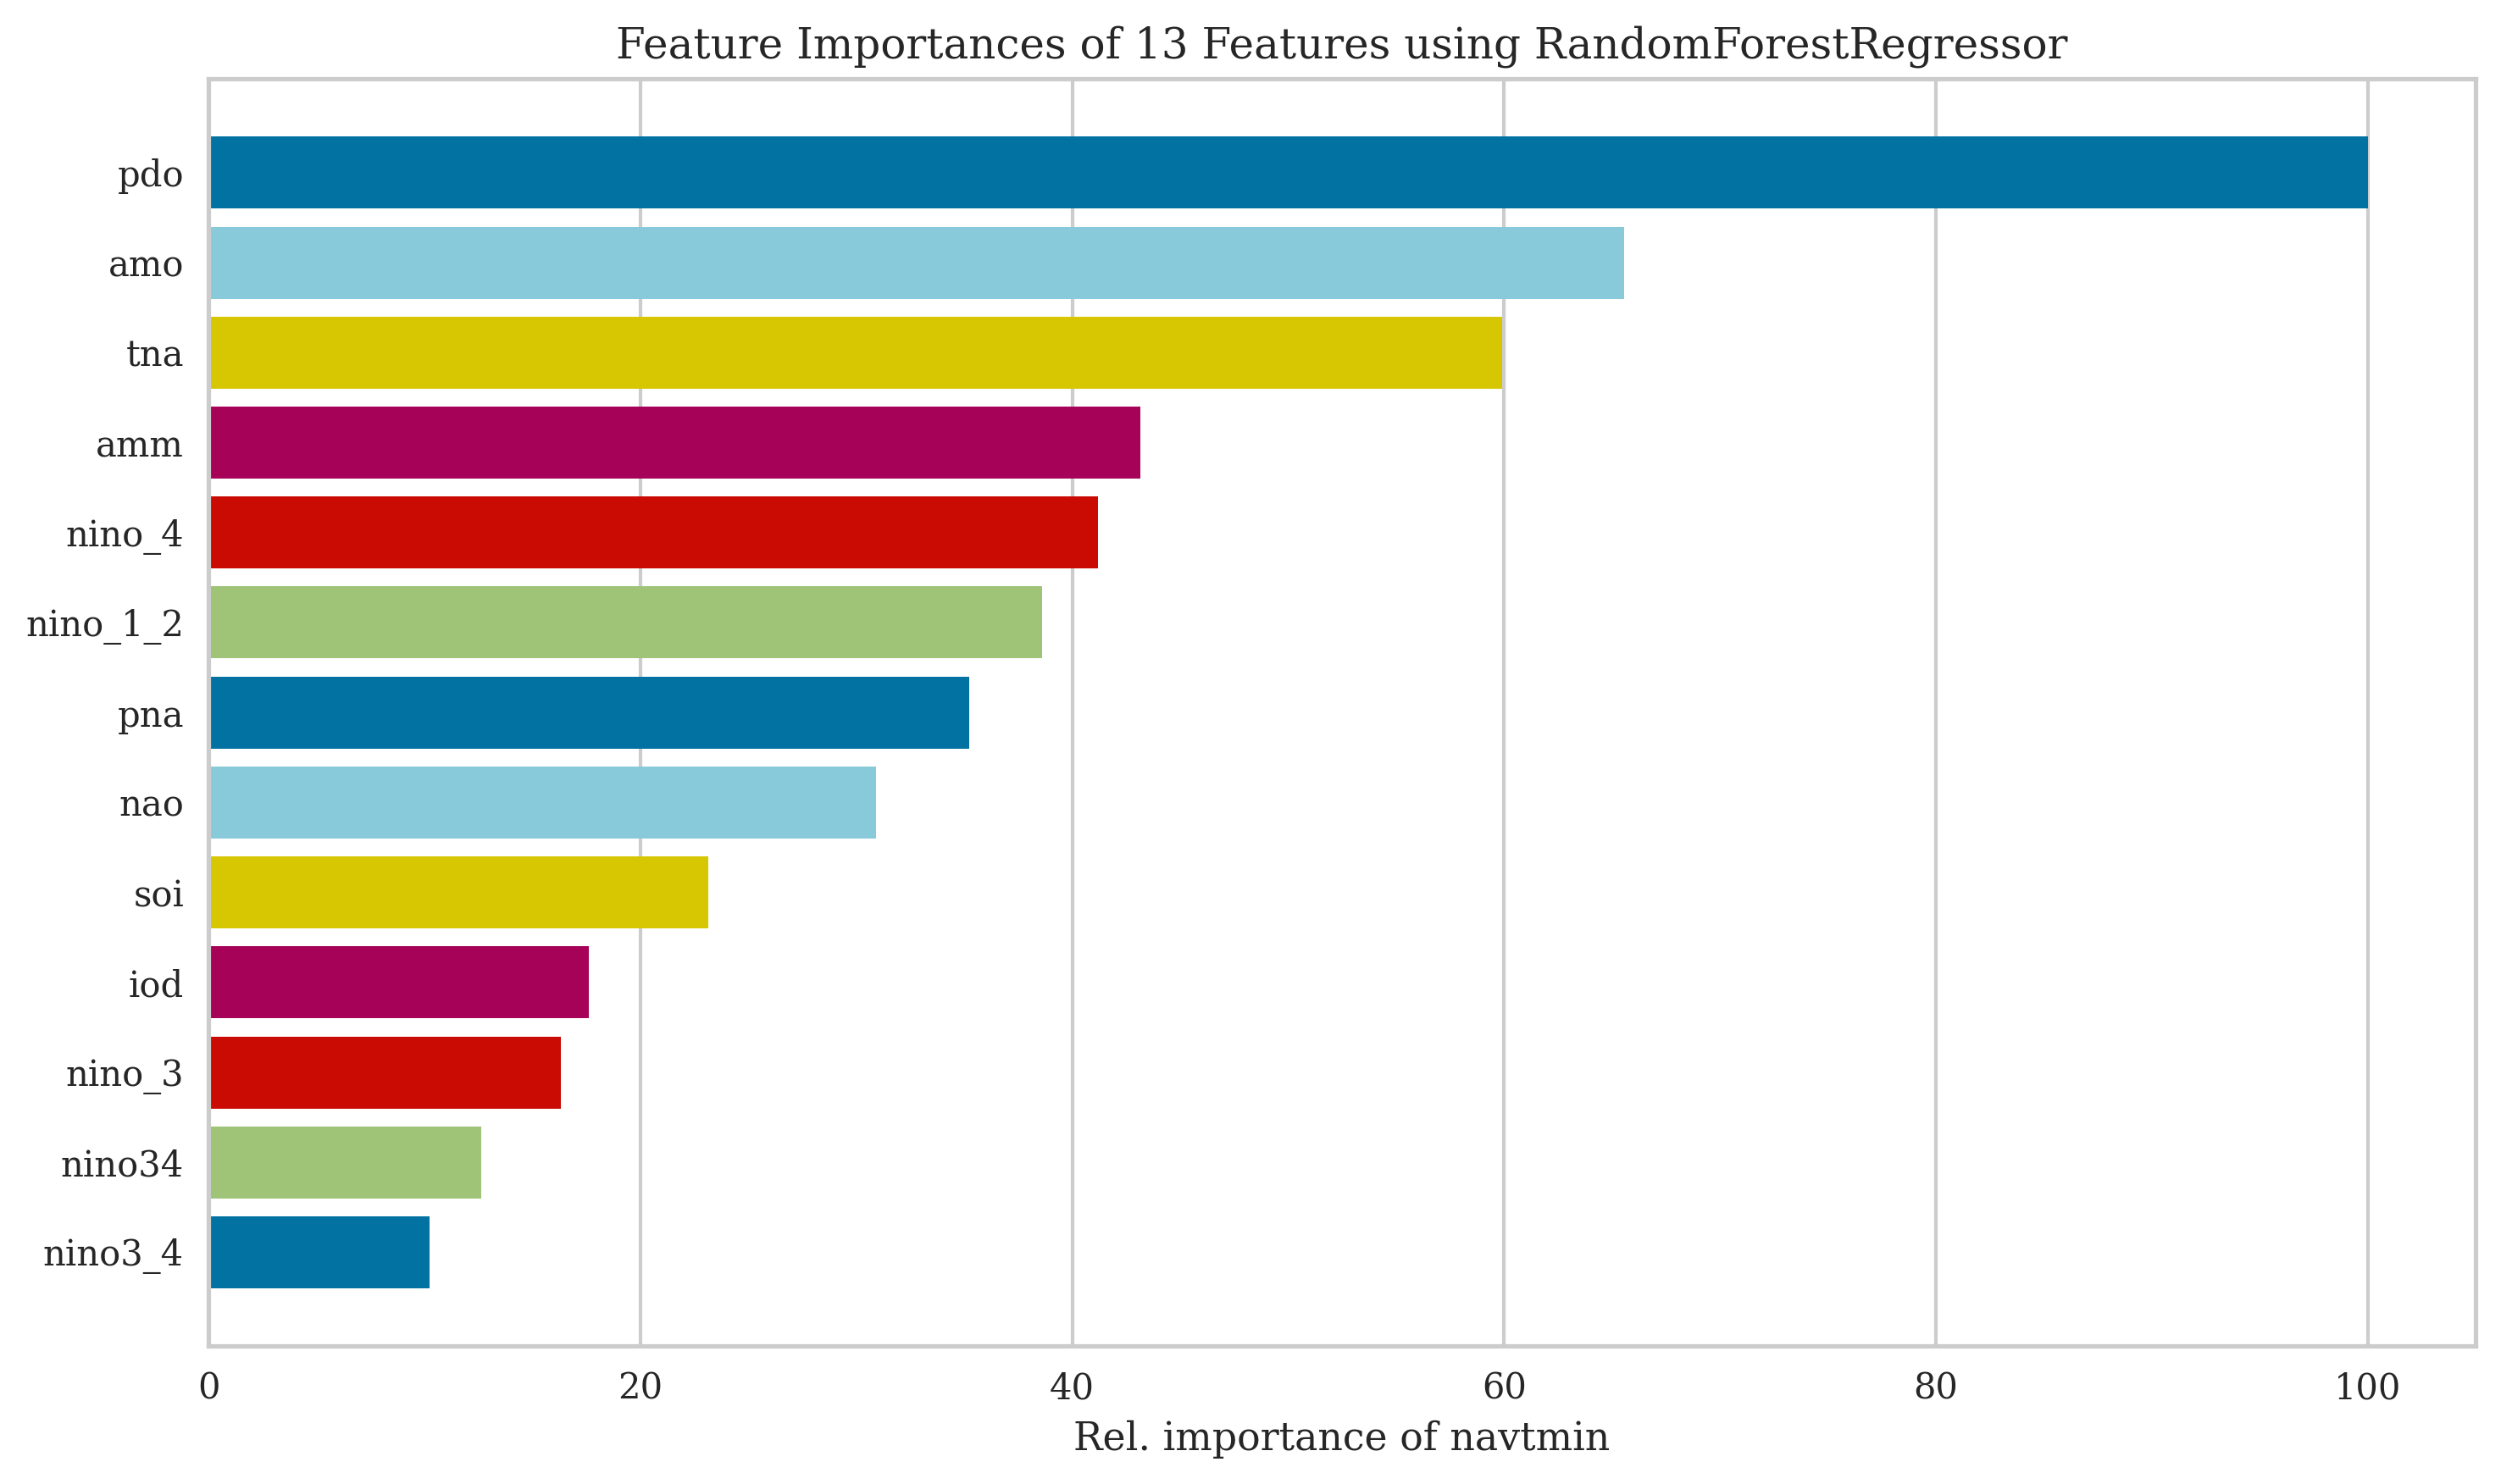

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


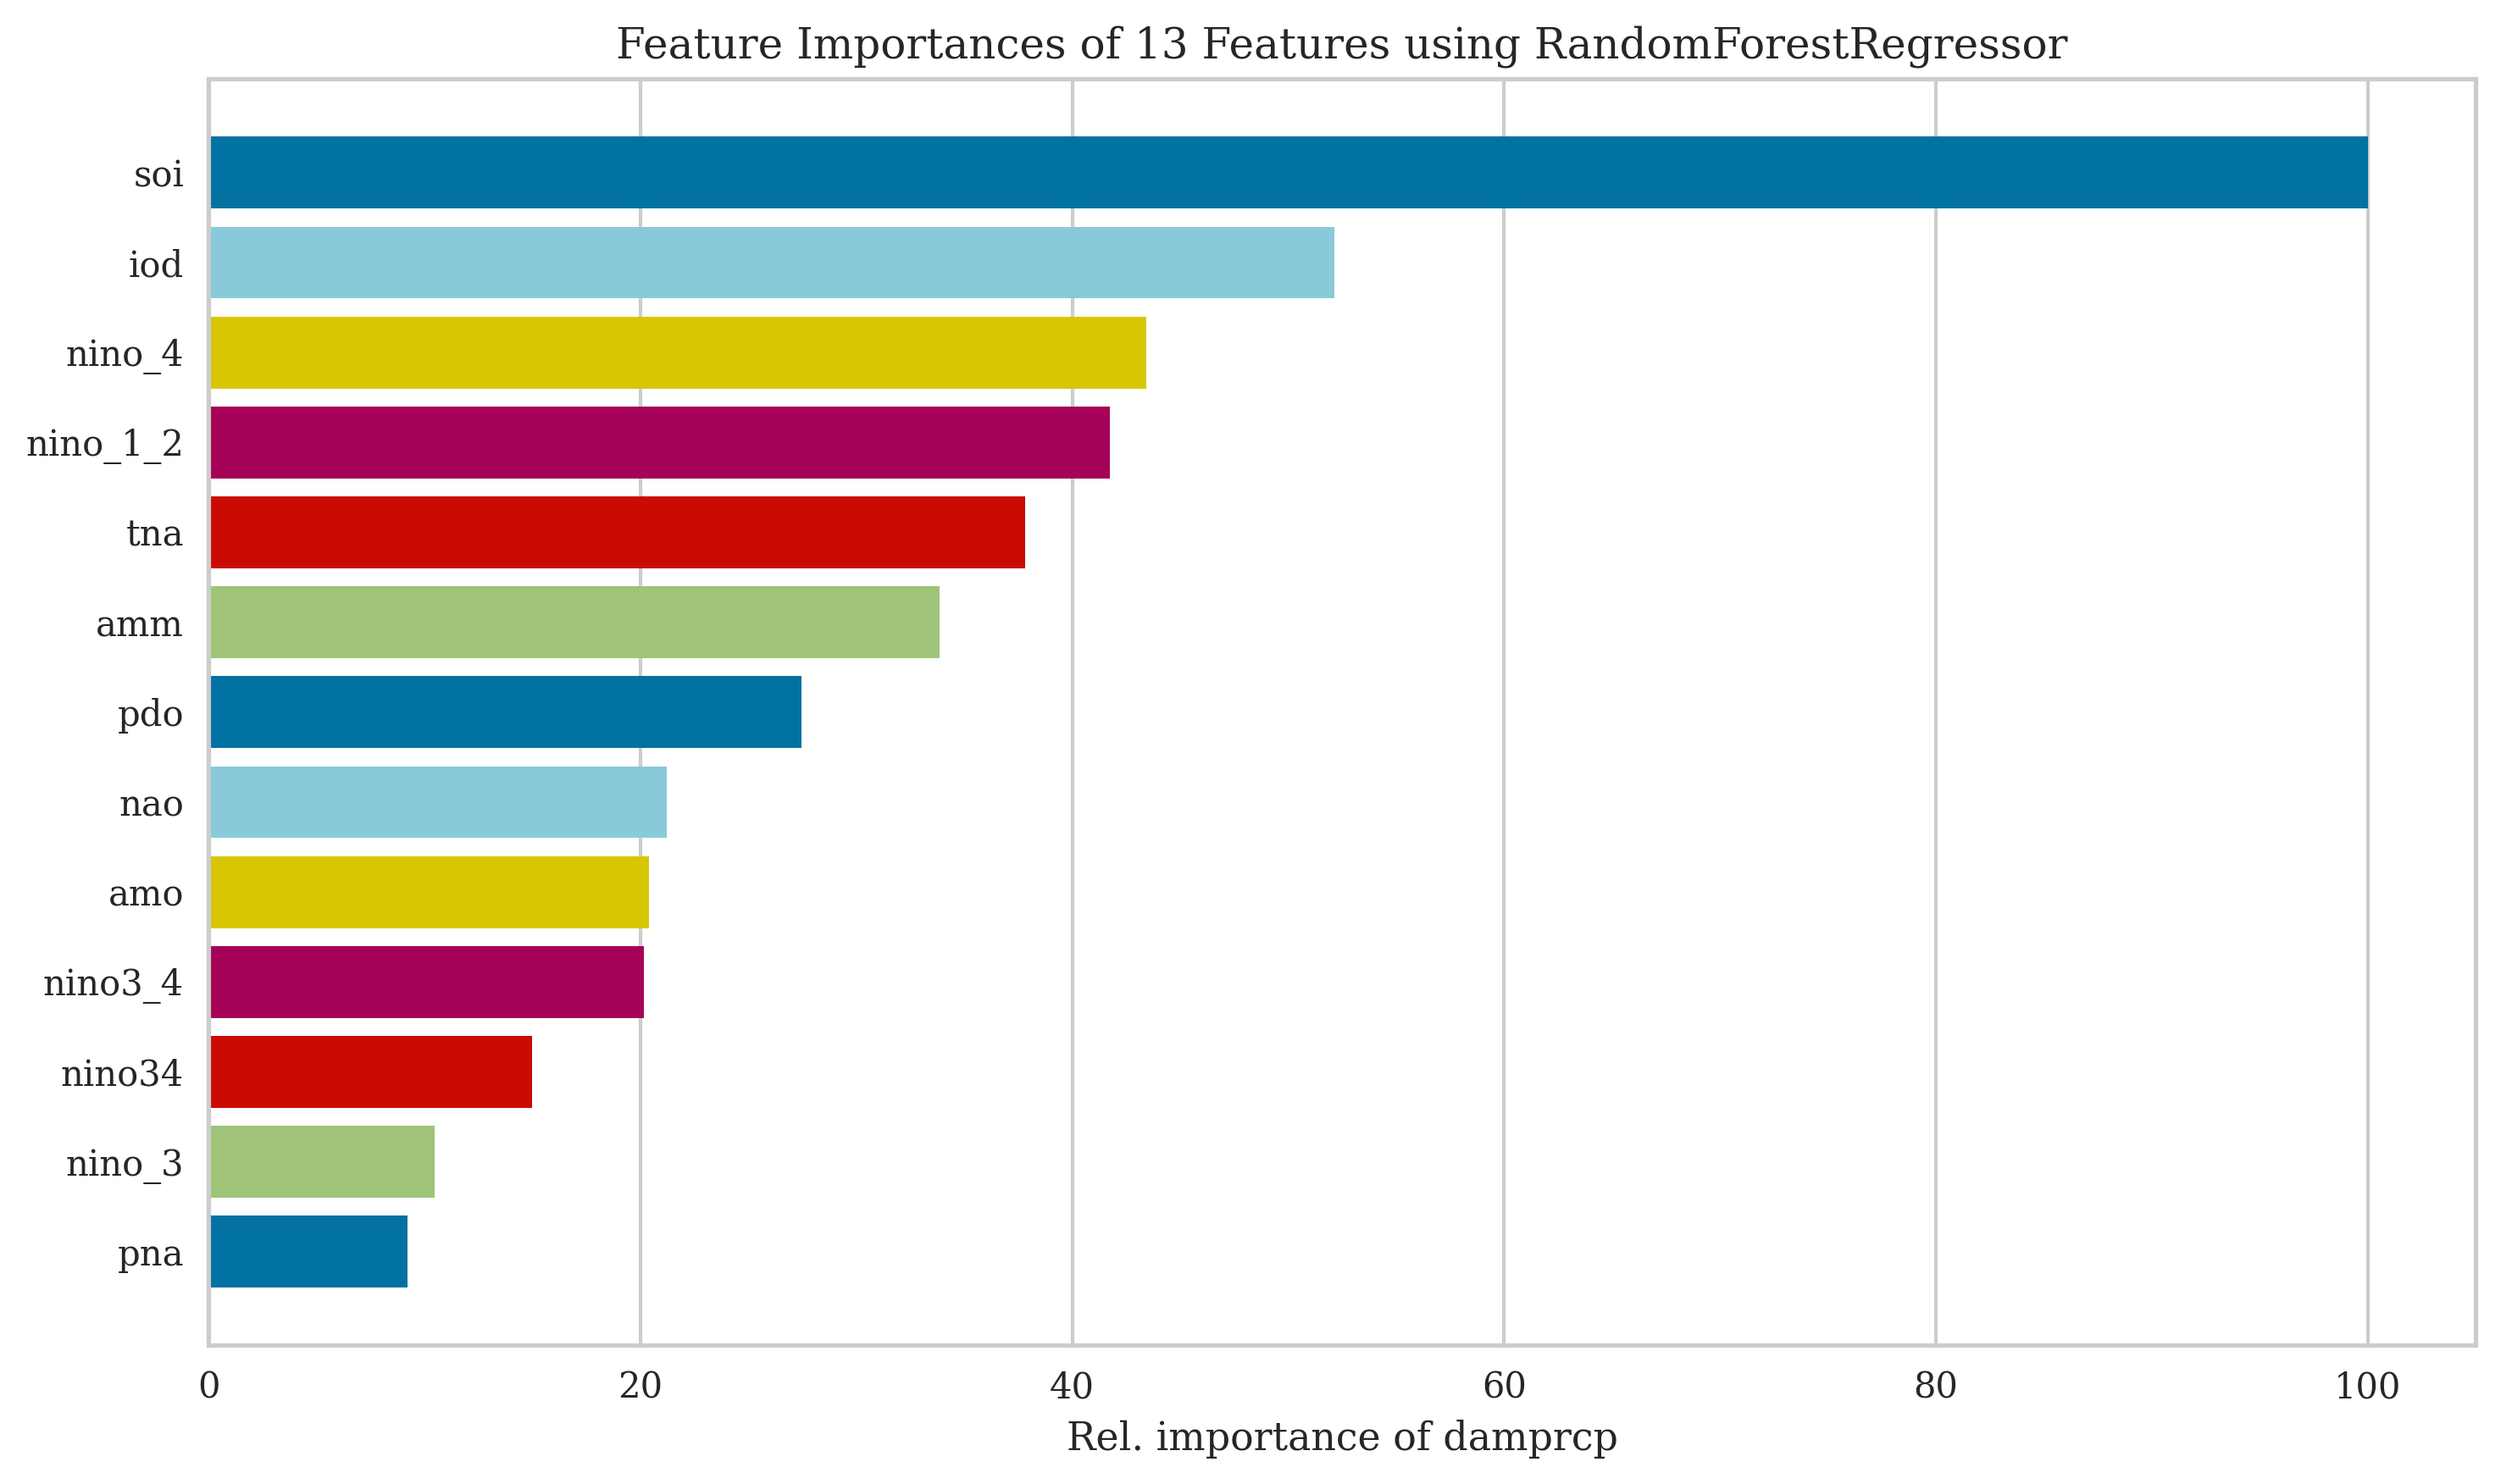

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


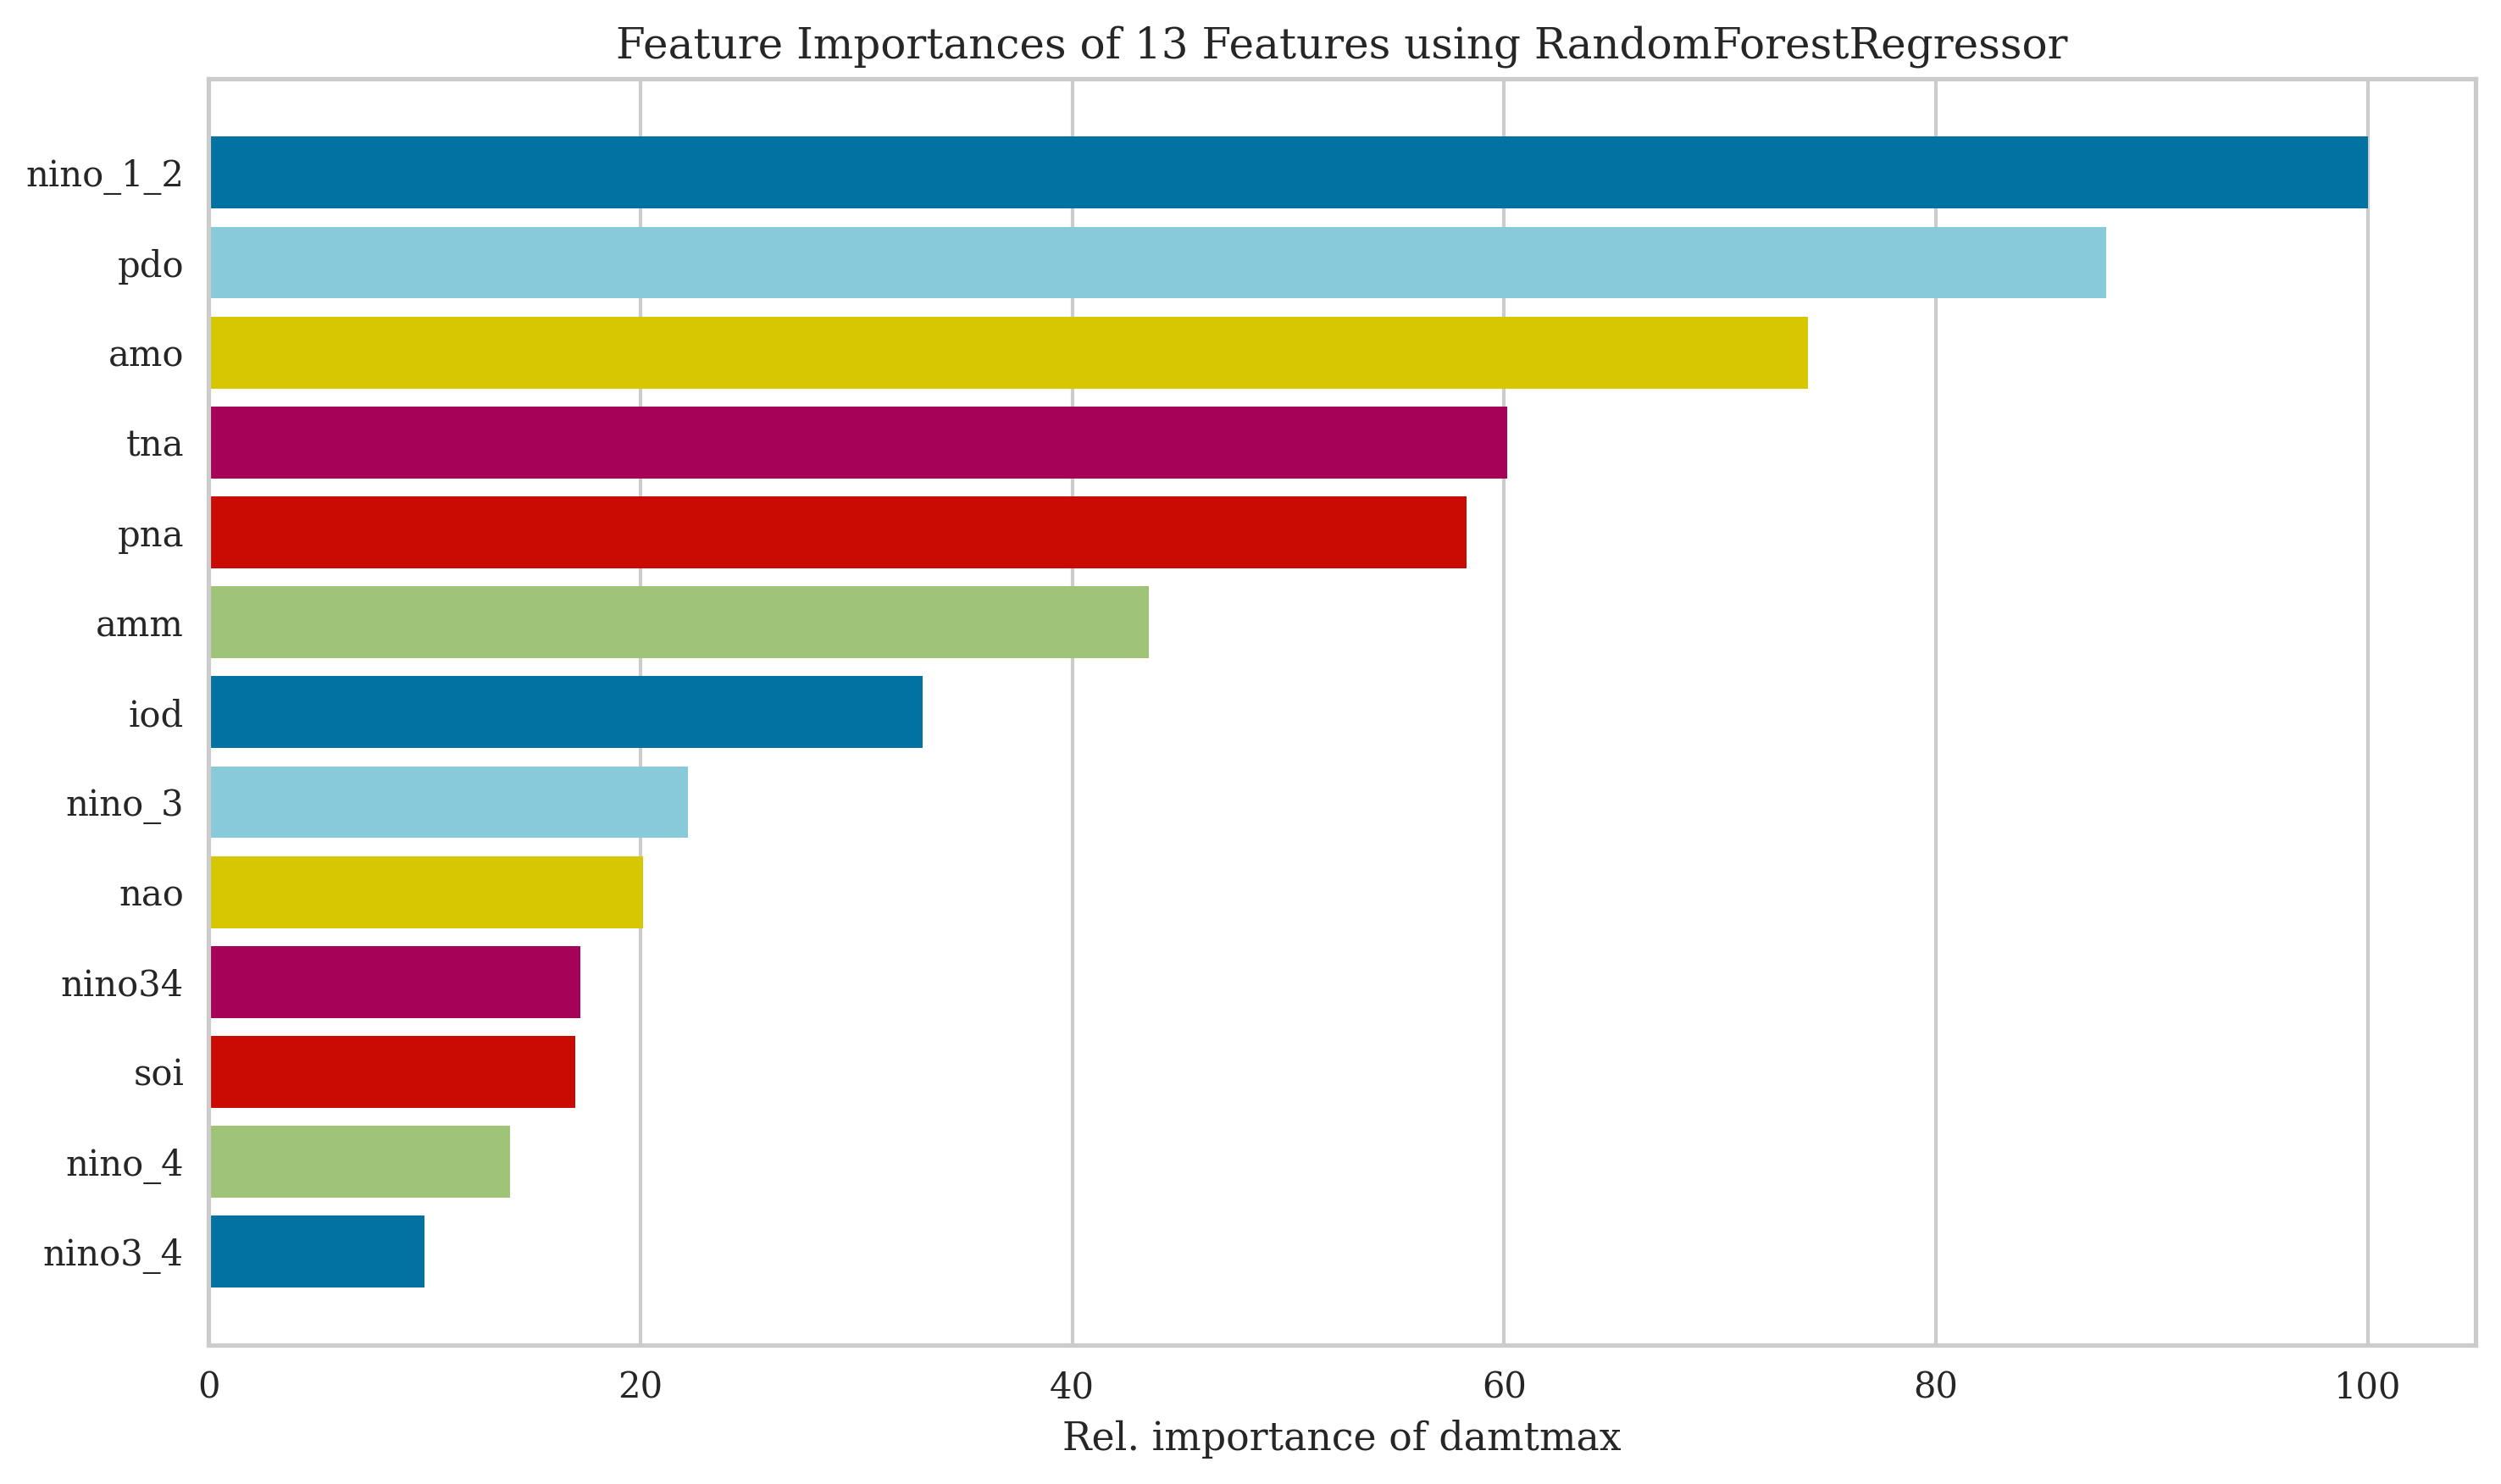

/Users/admin/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


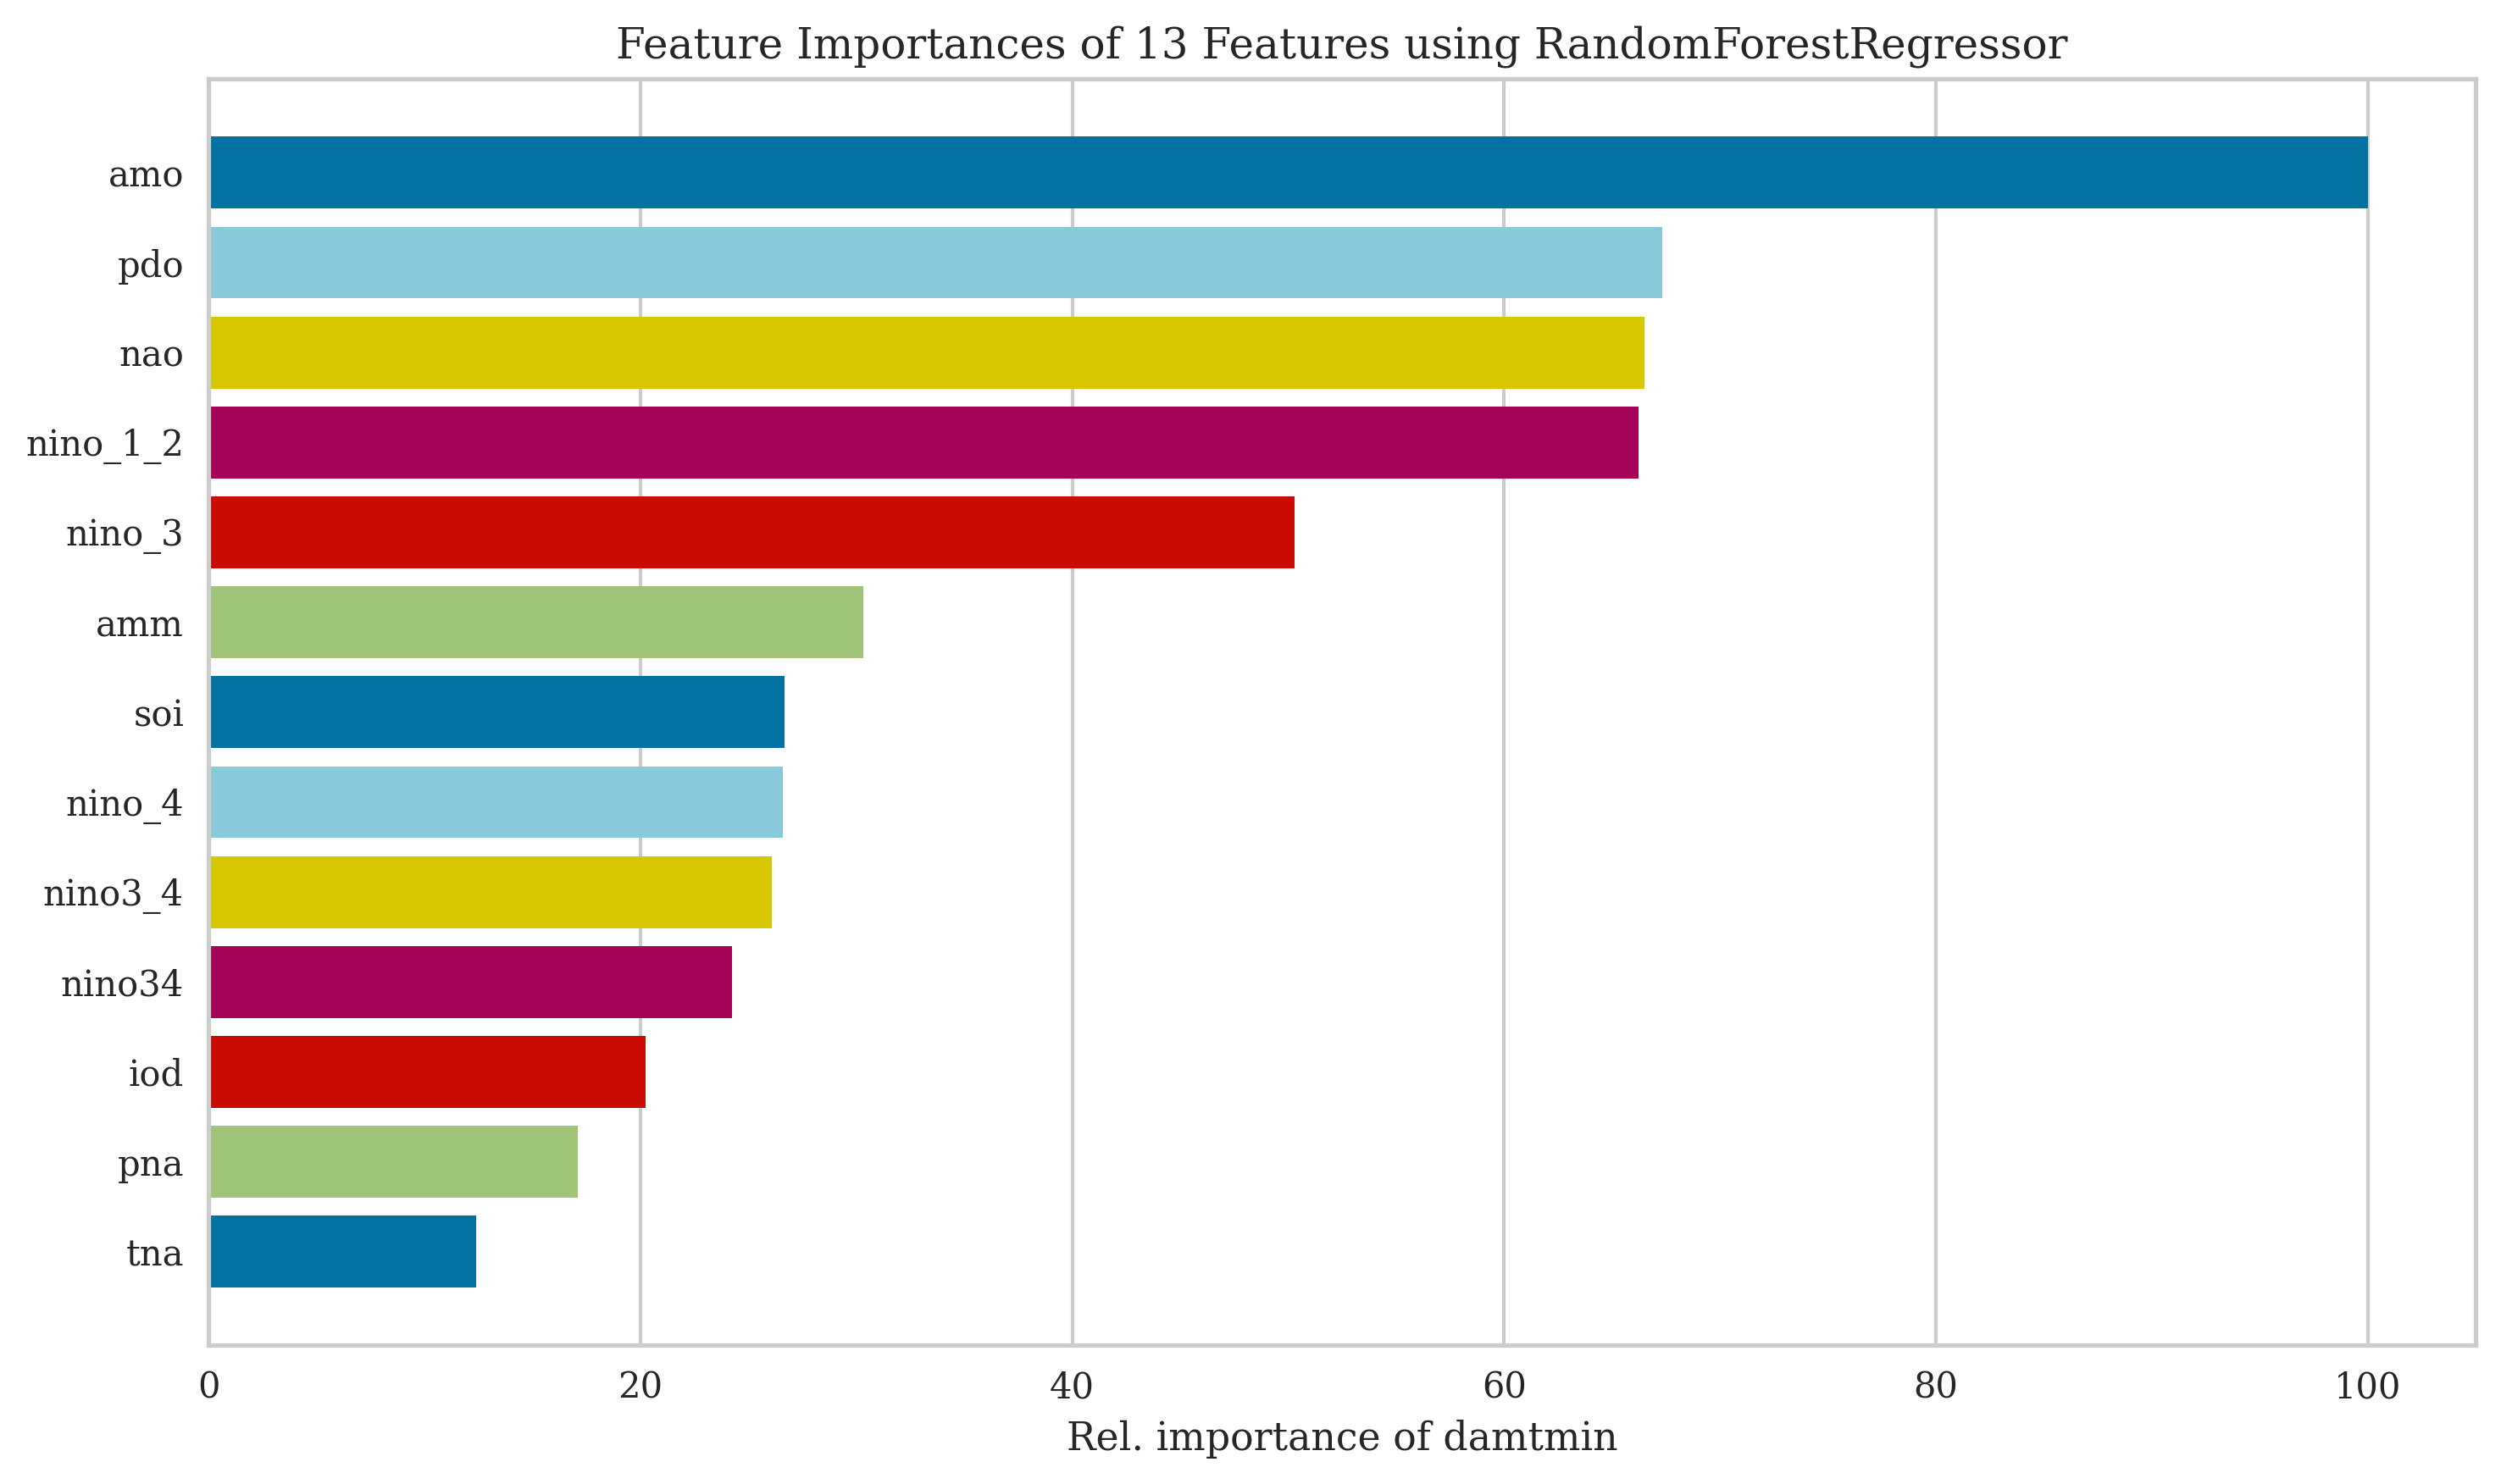

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as rfR
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['font.family'] = 'DejaVu Serif'

# Generate some example data (replace with your dataset)
np.random.seed(42)
X = gk

for c in ['veaprcp',
       'veatmax', 'veatmin', 'waprcp', 'watmax', 'watmin', 'yenprcp',
       'yentmax', 'yentmin', 'zuaprcp', 'zuatmax', 'zuatmin', 'tamprcp',
       'tamtmax', 'tamtmin', 'bolgaprcp', 'bolgatmax', 'bolgatmin', 'boleprcp',
       'boletmax', 'boletmin', 'babprcp', 'babtmax', 'babtmin', 'navprcp',
       'navtmax', 'navtmin', 'damprcp', 'damtmax', 'damtmin']:
    y = df[c]

    # Create a Random Forest model
    model = rfR(n_estimators=100, random_state=42)

    # Fit the model
    model.fit(X, y)

    # Visualize feature importances
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    viz = FeatureImportances(model, ax=ax, xlabel='Rel. importance of ' + c)
    viz.fit(X, y)
    viz.show()
    

    plt.show()


In [22]:
# !pip install scikit-learn==0.18.2

In [23]:
# from sklearn.ensemble import RandomForestRegressor

In [111]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [112]:
Xnew = gk
# ytransformed_column = df['damtmin']

In [114]:
# Standardize the features
scaler = StandardScaler()
# Xnew = X.drop(columns=['Distance nearest to human settlement', 'Width', 'Perimeter (m)', 'Depth (cm)', 'Length'])

X_standardized = scaler.fit_transform(Xnew)
# Convert standardized features to DataFrame with meaningful column names Standardized_
columns_standardized = [f'{col}' for col in Xnew.columns]
X_standardized_df = pd.DataFrame(X_standardized, columns=columns_standardized)

# Add a constant term to the standardized features matrix
X_standardized_df = sm.add_constant(X_standardized_df)

for c in ['veaprcp',
          'veatmax',
          'veatmin',
          'waprcp',
          'watmax',
          'watmin', 
          'yenprcp',
           'yentmax',
          'yentmin',
          'zuaprcp', 
          'zuatmax',
          'zuatmin',
          'tamprcp',
           'tamtmax',
          'tamtmin',
          'bolgaprcp',
          'bolgatmax',
          'bolgatmin',
          'boleprcp',
          'boletmax', 
          'boletmin',
          'babprcp',
          'babtmax',
          'babtmin', 
          'navprcp',
          'navtmax', 
          'navtmin',
          'damprcp', 
          'damtmax',
          'damtmin']:
    ytransformed_column = df[c]
    # Fit the OLS model with standardized features
    model_standardized = sm.OLS(ytransformed_column, X_standardized_df)
    results_standardized = model_standardized.fit()

    # Display the summary of the regression with standardized features
    print(results_standardized.summary(), '\n')
   

                            OLS Regression Results                            
Dep. Variable:                veaprcp   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1.444
Date:                Fri, 22 Mar 2024   Prob (F-statistic):              0.179
Time:                        16:44:07   Log-Likelihood:                -474.72
No. Observations:                  57   AIC:                             977.4
Df Residuals:                      43   BIC:                             1006.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1107.8298    152.757      7.252      0.0

                            OLS Regression Results                            
Dep. Variable:               boletmin   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     3.883
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           0.000375
Time:                        16:44:07   Log-Likelihood:                -51.420
No. Observations:                  57   AIC:                             130.8
Df Residuals:                      43   BIC:                             159.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9632      0.091    230.490      0.0

It table above summarizes the results of a linear regression analysis performed using Ordinary Least Squares (OLS) method. Let's break down the table row by row:

* **Dep. Variable:** This refers to the dependent variable, also known as the response variable, which is being predicted by the model. In this case, the dependent variable is `damtmin`.
* **Model:** This specifies the type of model used, which is OLS (Ordinary Least Squares) regression.
* **Method:** This indicates the method used for estimation, which is Least Squares. 

* **No. Observations:** This indicates the number of observations used in the analysis, which is 57.
* **Df Residuals:** This represents the degrees of freedom for the residuals, which is 43. The degrees of freedom is a statistical concept related to the number of independent pieces of information in your data. 
* **Df Model:** This represents the degrees of freedom for the model, which is 13. This reflects the number of explanatory variables (excluding the intercept) used in the model.
* **Covariance Type:** This specifies the type of covariance matrix used to estimate the variance of the coefficients. 

The bottom portion of the table shows the coefficients for each explanatory variable included in the model:

* **const:** This represents the intercept term, which is the estimated value of the dependent variable when all the explanatory variables are zero. The coefficient for the constant term is 21.0649.
* **amm:** This is an explanatory variable with a coefficient of -0.4508 and a p-value of 0.038. The p-value lower than 0.05 suggests the coefficient is statistically significant. A negative coefficient means there's a negative linear relationship between this variable and the dependent variable. 
* **nino34, nino3_4, amo, nao, nino_1_2, nino_3, nino_4, pna, soi, tna, iod, pdo:** These are other explanatory variables included in the model. Their coefficients and p-values are listed in the table. A positive coefficient indicates a positive linear relationship between the variable and the dependent variable, while a negative coefficient indicates a negative linear relationship. The p-value associated with each coefficient reflects its statistical significance.

* **R-squared:** This value, 0.447, represents the R-squared statistic, which is a measure of how well the variation in the dependent variable is explained by the independent variables in the model. An R-squared of 0.447 means that 44.7% of the variation in `damtmin` is explained by the explanatory variables included in the model.
* **Adj. R-squared:** This value, 0.279, represents the adjusted R-squared statistic, which is a modification of R-squared that takes into account the number of explanatory variables in the model. It tends to be a more reliable estimate of the model's explanatory power.
* **F-statistic:** This statistic, 2.668, along with its p-value (0.00784), is used to test the null hypothesis that all the regression coefficients are zero. A p-value lower than 0.05 suggests we can reject the null hypothesis, implying that at least one of the explanatory variables has a statistically significant relationship with the dependent variable.

Overall, the table summarizes the results of an OLS regression analysis where the model attempts to explain and predict variations in `damtmin` based on several explanatory variables. The R-squared value suggests that the model explains a moderate portion of the variance in the dependent variable.  

In [115]:
# !pip install --upgrade pip